In [9]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy.special as stat_special

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from patsy import dmatrices
from functools import *
from pandas.api.types import CategoricalDtype
from custom_mdls.functions_plots import plot_dendrogram, display_factorial_planes, display_parallel_coordinates, display_parallel_coordinates_centroids, display_scree_plot, display_circles, append_class
from adjustText import adjust_text
from sklearn.cluster import KMeans
import yellowbrick.cluster as yellowbrick

Settings for the Plots

In [10]:
height, aspect = (8, 2)
rc={'figure.figsize': (20, 18)}
sns.set_style("whitegrid",  {"xtick.major.size": 8, "ytick.major.size": 8, height: height, aspect: aspect})
sns.set(font_scale=2, rc=rc)



# Data Exploration phase EDA.
## getting to know and understand the data numerically and visually.

### Importing the needed Data set for the first Analysis

Here I upload the food security from the Fao data web platform for information about countries' nutrition and Crops live stocks. I also got information about life stock products produced by governments and others.


In [11]:
df_food_sicurity = pd.read_csv('./data/food_sicurity.csv')

In [12]:
df_food_balance = pd.read_csv('./data/food_balance.csv')

In [13]:
df_producer_prices = pd.read_csv('./data/producer_prices.csv')


In [14]:
df_macro_indicator = pd.read_csv('./data/macro_indicator.csv')

## Observing the datasets

### First and last five rows of Food Security shape and size of the data frame.

**In this dataFrame, there are 4866 rows organized by 15 columns**

4 Of them are identified metadata data.

In [15]:
df_food_sicurity.shape

(4866, 15)

In [16]:
#identifies
df_food_sicurity.columns[df_food_sicurity.columns.str.endswith('Code')]

Index(['Domain Code', 'Element Code', 'Item Code', 'Year Code'], dtype='object')

In [17]:
len(df_food_sicurity.columns[df_food_sicurity.columns.str.endswith('Code')])

4

**The columns and their observations**

The domain is what the data set values are describing, with the countries as areas.

The Element here is related to the actual observation Column called Value. 

Item is the type of observation but also contains unit or aggregation information. Example Value of food imports in total merchandise exports (percent) (3-year average) and Minimum dietary energy requirement (kcal/cap/day) one is an aggregation average by an amount of year, and the other is a minimum of a unit.

A three-year column aggregated from 2017-to 2019 and a not aggregate one from 2018.

Every single Value is based on his unit as it is visible in the Unit column, seven different ones

The flag columns and notes are also a kind of metadata that may not be very important for our Analysis?

In [18]:
df_food_sicurity.head()

Domain Code                             Domain  Area Code (FAO)  \
0          FS  Suite of Food Security Indicators                2   
1          FS  Suite of Food Security Indicators                2   
2          FS  Suite of Food Security Indicators                2   
3          FS  Suite of Food Security Indicators                2   
4          FS  Suite of Food Security Indicators                2   

          Area  Element Code Element  Item Code  \
0  Afghanistan          6121   Value      21010   
1  Afghanistan          6128   Value      22000   
2  Afghanistan          6126   Value      22013   
3  Afghanistan          6121   Value     210041   
4  Afghanistan          6132   Value     210011   

                                                Item  Year Code       Year  \
0  Average dietary energy supply adequacy (percen...   20172019  2017-2019   
1  Dietary energy supply used in the estimation o...   20172019  2017-2019   
2  Gross domestic product per capita, PPP, dissem...       2018       2018   
3  Prevalence of undernourishment (percent) (3-ye...   20172019  2017-2019   
4  Number of people undernourished (million) (3-y...   20172019  2017-2019   

              Unit   Value Flag                Flag Description  Note  
0                %     107    F                    FAO estimate   NaN  
1  kcal/capita/day    2281    F                    FAO estimate   NaN  
2               I$  2033.8    X  International reliable sources   NaN  
3                %    23.4    F                    FAO estimate   NaN  
4         millions     8.7    F                    FAO estimate   NaN

In [19]:
df_food_sicurity.tail()

Domain Code                             Domain  Area Code (FAO)  \
4861          FS  Suite of Food Security Indicators              181   
4862          FS  Suite of Food Security Indicators              181   
4863          FS  Suite of Food Security Indicators              181   
4864          FS  Suite of Food Security Indicators              181   
4865          FS  Suite of Food Security Indicators              181   

          Area  Element Code Element  Item Code  \
4861  Zimbabwe          6132   Value     210430   
4862  Zimbabwe          6128   Value      21056   
4863  Zimbabwe          6128   Value      21057   
4864  Zimbabwe          6173   Value      21058   
4865  Zimbabwe          6121   Value      21059   

                                                   Item  Year Code  Year  \
4861  Number of women of reproductive age (15-49 yea...       2018  2018   
4862  Minimum dietary energy requirement  (kcal/cap/...       2018  2018   
4863  Average dietary energy requirement (kcal/cap/day)       2018  2018   
4864  Coefficient of variation of habitual caloric c...       2018  2018   
4865  Incidence of caloric losses at retail distribu...       2018  2018   

                 Unit Value Flag                Flag Description  Note  
4861         millions   1.1    X  International reliable sources   NaN  
4862  kcal/capita/day  1740    F                    FAO estimate   NaN  
4863  kcal/capita/day  2224    F                    FAO estimate   NaN  
4864           Number  0.32    F                    FAO estimate   NaN  
4865                %  2.13    F                    FAO estimate   NaN

**Elements available**

In [20]:
len(df_food_sicurity.Element.unique())

1

In [21]:
df_food_sicurity.Element.unique()

array(['Value'], dtype=object)

**Items available**

In [22]:
len(df_food_sicurity.Item.unique())

30

In [23]:
df_food_sicurity.Item.unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
       'Number of severely food insecure people (million) (3-year average)',
       'Number of moderately or severely food insecure people (million) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food supply var

**Units available** 

In [24]:
df_food_sicurity.Unit.unique()

array(['%', 'kcal/capita/day', 'I$', 'millions', 'index', 'Number',
       'per 100 square km of land area'], dtype=object)

In [25]:
len(df_food_sicurity.Unit.unique())

7


**Summary**

It is one of the essential data frames here. 
This df_food_sicurity will give information about how many people have access to nutrients, health, Political state, and even how industrialized they could be with Rail lines density (total route in km per 100 square km of land area).

### First and last five rows of Food Balance shape and size of the data frame.

**In this dataFrame, there are 82781 rows organized by 14 columns**

4 Of them are identified metadata data.

In [26]:
df_food_balance.shape

(82781, 14)

In [27]:
#identifies
df_food_balance.columns[df_food_balance.columns.str.endswith('Code')]

Index(['Domain Code', 'Element Code', 'Item Code', 'Year Code'], dtype='object')

In [28]:
len(df_food_balance.columns[df_food_balance.columns.str.endswith('Code')])

4

**The columns and their observations**

The domain is what the data set values describe, with the countries as areas.
The Element here is related to the Items, for example, Element Total Population - Both sexes to Item. It explains how they are aggregated and what they contain, even for some units like Food supply (kcal/capita/day). 

Item is the type of observation such as Animal Products, Eggs, and Poultry Meat.

There are two years, 2018 and 2019.

Every single Value is based on his unit, as it is visible in the Unit column. Some of them are g/capita/day, kg.

The flag columns and notes are also metadata that may not be very important for our Analysis.

In [29]:
df_food_balance.head()

Domain Code                 Domain  Area Code (FAO)         Area  \
0         FBS  Food Balances (2010-)                2  Afghanistan   
1         FBS  Food Balances (2010-)                2  Afghanistan   
2         FBS  Food Balances (2010-)                2  Afghanistan   
3         FBS  Food Balances (2010-)                2  Afghanistan   
4         FBS  Food Balances (2010-)                2  Afghanistan   

   Element Code                        Element  Item Code             Item  \
0           511  Total Population - Both sexes       2501       Population   
1           511  Total Population - Both sexes       2501       Population   
2          5301       Domestic supply quantity       2501       Population   
3          5301       Domestic supply quantity       2501       Population   
4           664  Food supply (kcal/capita/day)       2941  Animal Products   

   Year Code  Year             Unit    Value Flag   Flag Description  
0       2018  2018     1000 persons  37172.0    *  Unofficial figure  
1       2019  2019     1000 persons  38042.0    *  Unofficial figure  
2       2018  2018      1000 tonnes      0.0    S  Standardized data  
3       2019  2019      1000 tonnes      0.0    S  Standardized data  
4       2018  2018  kcal/capita/day    189.0   Fc    Calculated data

In [30]:
df_food_balance.tail()

Domain Code                 Domain  Area Code (FAO)      Area  \
82776         FBS  Food Balances (2010-)              181  Zimbabwe   
82777         FBS  Food Balances (2010-)              181  Zimbabwe   
82778         FBS  Food Balances (2010-)              181  Zimbabwe   
82779         FBS  Food Balances (2010-)              181  Zimbabwe   
82780         FBS  Food Balances (2010-)              181  Zimbabwe   

       Element Code                                 Element  Item Code  \
82776           664           Food supply (kcal/capita/day)       2775   
82777           674  Protein supply quantity (g/capita/day)       2775   
82778           674  Protein supply quantity (g/capita/day)       2775   
82779           684      Fat supply quantity (g/capita/day)       2775   
82780           684      Fat supply quantity (g/capita/day)       2775   

                 Item  Year Code  Year             Unit  Value Flag  \
82776  Aquatic Plants       2019  2019  kcal/capita/day    0.0   Fc   
82777  Aquatic Plants       2018  2018     g/capita/day    0.0   Fc   
82778  Aquatic Plants       2019  2019     g/capita/day    0.0   Fc   
82779  Aquatic Plants       2018  2018     g/capita/day    0.0   Fc   
82780  Aquatic Plants       2019  2019     g/capita/day    0.0   Fc   

      Flag Description  
82776  Calculated data  
82777  Calculated data  
82778  Calculated data  
82779  Calculated data  
82780  Calculated data

**Elements available**

In [31]:
len(df_food_balance.Element.unique())

16

In [32]:
df_food_balance.Element.unique()

array(['Total Population - Both sexes', 'Domestic supply quantity',
       'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity', 'Food',
       'Food supply quantity (kg/capita/yr)', 'Losses', 'Feed',
       'Other uses (non-food)', 'Processing', 'Tourist consumption'],
      dtype=object)

**Items available**

In [33]:
len(df_food_balance.Item.unique())

25

In [34]:
df_food_balance.Item.unique()

array(['Population', 'Animal Products', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Offals, Edible', 'Butter, Ghee', 'Cream', 'Fats, Animals, Raw',
       'Eggs', 'Milk - Excluding Butter', 'Freshwater Fish',
       'Fish, Body Oil', 'Fish, Liver Oil', 'Demersal Fish',
       'Pelagic Fish', 'Marine Fish, Other', 'Crustaceans', 'Cephalopods',
       'Molluscs, Other', 'Aquatic Animals, Others', 'Aquatic Plants',
       'Meat, Aquatic Mammals'], dtype=object)

**Units available** 

In [35]:
df_food_balance.Unit.unique()

array(['1000 persons', '1000 tonnes', 'kcal/capita/day', 'g/capita/day',
       'kg'], dtype=object)

In [36]:
len(df_food_balance.Unit.unique())

5

**Summary**

This data frame df_food_balance Is crucial for the Analysis to come only Element Total Population. Both sexes would give vital information about countries that we will consider and nutrition Elements like Food supply (kcal/capita/day) and Protein supply quantity (g/capita/day) which will clarify how to feed a county's population it is a given year. 

### First and last five rows of Macro Indicator shape and size of the data frame.

**In this dataFrame, there are 25144 rows organized by 15 columns**

4 Of them are identified metadata data.

In [37]:
df_macro_indicator.shape

(25144, 15)

In [38]:
#identifies
df_macro_indicator.columns[df_macro_indicator.columns.str.endswith('Code')]

Index(['Domain Code', 'Element Code', 'Item Code', 'Year Code'], dtype='object')

In [39]:
len(df_macro_indicator.columns[df_macro_indicator.columns.str.endswith('Code')])

4

**The columns and their observations**

Item is the type of observation that indicates the Value or aggregation of some economic indicators like Gross Domestic Product "GDP." Agriculture, Manufacture, Forestry, and Fishing are some of the item types of products considered here. 

The domain is what the data set values describe, with the countries as areas.

The Element is also related to the Items. It explains their aggregation, for example, 2015, Rations, Anual, even for some units of Local currency and $ dollar.

A range from 2018-to 2019.

Every single Value is based on his unit as it is visible in the Unit column.

The flag columns and notes are also a kind of metadata that may not be very important for our Analysis.

In [40]:
df_macro_indicator.head()

Domain Code            Domain  Area Code (FAO)         Area  Element Code  \
0          MK  Macro Indicators                2  Afghanistan          6109   
1          MK  Macro Indicators                2  Afghanistan          6110   
2          MK  Macro Indicators                2  Afghanistan          6119   
3          MK  Macro Indicators                2  Afghanistan          6183   
4          MK  Macro Indicators                2  Afghanistan          6185   

                             Element  Item Code                    Item  \
0               Value Local Currency      22008  Gross Domestic Product   
1                          Value US$      22008  Gross Domestic Product   
2               Value US$ per capita      22008  Gross Domestic Product   
3  Value Local Currency, 2015 prices      22008  Gross Domestic Product   
4  Value US$ per capita, 2015 prices      22008  Gross Domestic Product   

   Year Code  Year      Unit         Value Flag  \
0       2018  2018  millions  1.296559e+06    X   
1       2018  2018  millions  1.798697e+04    X   
2       2018  2018       US$  4.838859e+02    X   
3       2018  2018  millions  1.212817e+06    X   
4       2018  2018       US$  5.336178e+02    X   

                 Flag Description  Note  
0  International reliable sources   NaN  
1  International reliable sources   NaN  
2  International reliable sources   NaN  
3  International reliable sources   NaN  
4  International reliable sources   NaN

In [41]:
df_macro_indicator.tail()

Domain Code            Domain  Area Code (FAO)      Area  Element Code  \
25139          MK  Macro Indicators              181  Zimbabwe          6110   
25140          MK  Macro Indicators              181  Zimbabwe          6119   
25141          MK  Macro Indicators              181  Zimbabwe          6155   
25142          MK  Macro Indicators              181  Zimbabwe          6129   
25143          MK  Macro Indicators              181  Zimbabwe         61290   

                            Element  Item Code                   Item  \
25139                     Value US$      22011  Gross National Income   
25140          Value US$ per capita      22011  Gross National Income   
25141  Annual growth Local Currency      22011  Gross National Income   
25142             Annual growth US$      22011  Gross National Income   
25143  Annual growth US$ per capita      22011  Gross National Income   

       Year Code  Year      Unit         Value Flag  \
25139       2019  2019  millions  19835.846559    X   
25140       2019  2019       US$   1354.401687   Fc   
25141       2019  2019         %    -12.643001   Fc   
25142       2019  2019         %    -12.643001   Fc   
25143       2019  2019         %    -13.875718   Fc   

                     Flag Description  Note  
25139  International reliable sources   NaN  
25140                 Calculated data   NaN  
25141                 Calculated data   NaN  
25142                 Calculated data   NaN  
25143                 Calculated data   NaN

**Elements available**

In [42]:
len(df_macro_indicator.Element.unique())

20

In [43]:
df_macro_indicator.Element.unique()

array(['Value Local Currency', 'Value US$', 'Value US$ per capita',
       'Value Local Currency, 2015 prices',
       'Value US$ per capita, 2015 prices', 'Value US$, 2015 prices',
       'Annual growth Local Currency',
       'Annual growth Local Currency, 2015 prices', 'Annual growth US$',
       'Annual growth US$ per capita', 'Annual growth US$, 2015 prices',
       'Annual growth US$ per capita, 2015 prices', 'Share of GDP US$',
       'Share of GDP US$, 2015 prices', 'Share of GDP Local Currency',
       'Share of GDP Local Currency, 2015 prices',
       'Ratio of Value Added (Agriculture, Forestry and Fishing) Local Currency',
       'Ratio of Value Added (Agriculture, Forestry and Fishing) US$',
       'Share of Value Added (Total Manufacturing) Local Currency',
       'Share of Value Added (Total Manufacturing) US$'], dtype=object)

**Items available**

In [44]:
len(df_macro_indicator.Item.unique())

11

In [45]:
df_macro_indicator.Item.unique()

array(['Gross Domestic Product', 'Gross Fixed Capital Formation',
       'Value Added (Agriculture, Forestry and Fishing)',
       'Value Added (Total Manufacturing)', 'Gross National Income',
       'Value Added (Manufacture of food, beverages and tobacco products)',
       'Value Added (Manufacture of food and beverages)',
       'Gross Output (Agriculture, Forestry and Fishing)',
       'Value Added (Manufacture of tobacco products)',
       'Value Added (Agriculture)', 'Gross Output (Agriculture)'],
      dtype=object)

**Units available**

Some values like nan might not be relevant and can be removed. 

In [46]:
df_macro_indicator.Unit.unique()

array(['millions', 'US$', '%', nan], dtype=object)

In [47]:
len(df_macro_indicator.Unit.unique())

4

**Summary**

df_macro_indicator data frame has a significant Item here as one of the major economic indicators, "GDP" for a country that will be very useful for future Analysis.

Value Added (Total Manufacturing), Value Added (Agriculture), Gross Output (Agriculture), Gross Output (Agriculture, Forestry, and Fishing)
It can also help to understand how industrial and economic a country is compared to others. This can affect where the company product has more competition and more financial stability.

### First and last five rows of Food Prices shape and size of the data frame.

**In this dataFrame, there are 4866 rows organized by 15 columns**

4 Of them are identified metadata data.

In [48]:
df_producer_prices.shape

(7769, 16)

In [49]:
#identifies
df_producer_prices.columns[df_producer_prices.columns.str.endswith('Code')]

Index(['Domain Code', 'Element Code', 'Item Code', 'Year Code', 'Months Code'], dtype='object')

In [50]:
len(df_producer_prices.columns[df_producer_prices.columns.str.endswith('Code')])

5

**The columns and their observations**

The domain is what the data set values describe, with the countries as areas.
The Element here is related to the Items. It explains how they are aggregated like the Producer Price Index (2014-2016 = 100), even for some units USD/tonne.

Item is the type of observation. Most of them are poultry products, meat, or eggs, and some are the weight of livening animals.
A three-year column aggregated from 2017-to 2019 and a not aggregate one from 2018.

Every single Value is based on his unit, as it is visible in the Unit column.

The flag columns and notes are also a kind of metadata that may not be very important for our Analysis.

In [51]:
df_producer_prices.head()

Domain Code           Domain  Area Code (FAO)         Area  Element Code  \
0          PP  Producer Prices                2  Afghanistan          5539   
1          PP  Producer Prices                2  Afghanistan          5539   
2          PP  Producer Prices                2  Afghanistan          5539   
3          PP  Producer Prices                2  Afghanistan          5539   
4          PP  Producer Prices                2  Afghanistan          5539   

                                  Element  Item Code  \
0  Producer Price Index (2014-2016 = 100)       1062   
1  Producer Price Index (2014-2016 = 100)       1095   
2  Producer Price Index (2014-2016 = 100)       1058   
3  Producer Price Index (2014-2016 = 100)       1783   
4  Producer Price Index (2014-2016 = 100)       1062   

                        Item  Year Code  Year  Months Code        Months Unit  \
0        Eggs, hen, in shell       2018  2018         7021  Annual value  NaN   
1  Meat live weight, chicken       2018  2018         7021  Annual value  NaN   
2              Meat, chicken       2018  2018         7021  Annual value  NaN   
3               Eggs Primary       2018  2018         7021  Annual value  NaN   
4        Eggs, hen, in shell       2019  2019         7021  Annual value  NaN   

   Value Flag                          Flag Description  
0     85   Im  FAO data based on imputation methodology  
1     85   Im  FAO data based on imputation methodology  
2     85   Im  FAO data based on imputation methodology  
3     85   Im  FAO data based on imputation methodology  
4     87   Im  FAO data based on imputation methodology

In [52]:
df_producer_prices.tail()

Domain Code           Domain  Area Code (FAO)      Area  Element Code  \
7764          PP  Producer Prices              181  Zimbabwe          5530   
7765          PP  Producer Prices              181  Zimbabwe          5531   
7766          PP  Producer Prices              181  Zimbabwe          5532   
7767          PP  Producer Prices              181  Zimbabwe          5539   
7768          PP  Producer Prices              181  Zimbabwe          5539   

                                     Element  Item Code  \
7764              Producer Price (LCU/tonne)       1095   
7765              Producer Price (SLC/tonne)       1095   
7766              Producer Price (USD/tonne)       1095   
7767  Producer Price Index (2014-2016 = 100)       1095   
7768  Producer Price Index (2014-2016 = 100)       1095   

                           Item  Year Code  Year  Months Code        Months  \
7764  Meat live weight, chicken       2018  2018         7001       January   
7765  Meat live weight, chicken       2018  2018         7021  Annual value   
7766  Meat live weight, chicken       2018  2018         7021  Annual value   
7767  Meat live weight, chicken       2018  2018         7021  Annual value   
7768  Meat live weight, chicken       2019  2019         7021  Annual value   

     Unit  Value Flag                          Flag Description  
7764  LCU   4667  NaN                             Official data  
7765  SLC   4667  NaN                             Official data  
7766  USD   4667  NaN                             Official data  
7767  NaN    114   Im  FAO data based on imputation methodology  
7768  NaN     82   Im  FAO data based on imputation methodology

**Elements available**

In [53]:
len(df_producer_prices.Element.unique())

4

In [54]:
df_producer_prices.Element.unique()

array(['Producer Price Index (2014-2016 = 100)',
       'Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)'], dtype=object)

**Items available**

Some values like "Eggplants (aubergines)" and "other" might not be relevant here.

In [55]:
len(df_producer_prices.Item.unique())

13

In [56]:
df_producer_prices.Item.unique()

array(['Eggs, hen, in shell', 'Meat live weight, chicken',
       'Meat, chicken', 'Eggs Primary', 'Eggplants (aubergines)',
       'Meat live weight, turkey', 'Meat live weight, duck',
       'Meat, turkey', 'Chick peas', 'Meat, duck',
       'Eggs, other bird, in shell', 'Meat, bird nes',
       'Meat live weight, poultry, other'], dtype=object)

**Units available**

Some values like nan might not be relevant and can be removed.

In [57]:
len(df_producer_prices.Unit.unique())

4

In [58]:
df_producer_prices.Unit.unique()

array([nan, 'LCU', 'SLC', 'USD'], dtype=object)

**Summary**

The df_producer_prices data frame contains many relevant pieces of information that will help further analyze a product's production in a different country and liven animals and their weights, significantly eggs as products.

## Missing values.

**Let us closely look at our data frames here.** 

Identify which columns contain missing values, and try to understand if these can be recovered with any methodology, like mean imputation, or removed entirely, but only after understanding its consequences.

### Food Security data set information.

**Data Information**

As the first check, I use the information method to understand what kind of observation data structure is present in each column.

We can see here RangeIndex: 4866, the number of rows, the total 15 columns and their names, the interesting column Non-Null Count, which is the amount not counted as null; and finally, Dtype, the type of data structure.

There is no null value from the column index 0 to 10 because they all have the same total amount of row 4866.

The most prevalent type of data structure here is the object that can be string values or worlds fallow by int64, which indicates a discrete numerical value. The last Dtype is a float64 that can describe continuous numerical values.

In [59]:
df_food_sicurity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866 entries, 0 to 4865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4866 non-null   object 
 1   Domain            4866 non-null   object 
 2   Area Code (FAO)   4866 non-null   int64  
 3   Area              4866 non-null   object 
 4   Element Code      4866 non-null   int64  
 5   Element           4866 non-null   object 
 6   Item Code         4866 non-null   int64  
 7   Item              4866 non-null   object 
 8   Year Code         4866 non-null   int64  
 9   Year              4866 non-null   object 
 10  Unit              4866 non-null   object 
 11  Value             4352 non-null   object 
 12  Flag              4866 non-null   object 
 13  Flag Description  4866 non-null   object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(4), object(10)
memory usage: 570.4+ KB


**Identifying and resolving null values**

For clarity, let's compute the total of every column's null values.
There are only 2 Columns that have null values here Value and Note. Note most probably because, as already mentioned in the Observation section, metadata is not relevant to our Analysis.

In [60]:
df_food_sicurity.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code              0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                514
Flag                   0
Flag Description       0
Note                4866
dtype: int64

In [61]:
df_food_sicurity[df_food_sicurity.Value.isnull()]

Domain Code                             Domain  Area Code (FAO)  \
59            FS  Suite of Food Security Indicators                4   
81            FS  Suite of Food Security Indicators                5   
82            FS  Suite of Food Security Indicators                5   
83            FS  Suite of Food Security Indicators                5   
84            FS  Suite of Food Security Indicators                5   
...          ...                                ...              ...   
4795          FS  Suite of Food Security Indicators              249   
4816          FS  Suite of Food Security Indicators              251   
4817          FS  Suite of Food Security Indicators              251   
4843          FS  Suite of Food Security Indicators              181   
4844          FS  Suite of Food Security Indicators              181   

                Area  Element Code Element  Item Code  \
59           Algeria          6132   Value     210011   
81    American Samoa          6121   Value     210041   
82    American Samoa          6132   Value     210011   
83    American Samoa          6121   Value     210401   
84    American Samoa          6121   Value     210091   
...              ...           ...     ...        ...   
4795           Yemen          6132   Value     210081   
4816          Zambia          6121   Value     210041   
4817          Zambia          6132   Value     210011   
4843        Zimbabwe          6121   Value     210041   
4844        Zimbabwe          6132   Value     210011   

                                                   Item  Year Code       Year  \
59    Number of people undernourished (million) (3-y...   20172019  2017-2019   
81    Prevalence of undernourishment (percent) (3-ye...   20172019  2017-2019   
82    Number of people undernourished (million) (3-y...   20172019  2017-2019   
83    Prevalence of severe food insecurity in the to...   20172019  2017-2019   
84    Prevalence of moderate or severe food insecuri...   20172019  2017-2019   
...                                                 ...        ...        ...   
4795  Number of moderately or severely food insecure...   20172019  2017-2019   
4816  Prevalence of undernourishment (percent) (3-ye...   20172019  2017-2019   
4817  Number of people undernourished (million) (3-y...   20172019  2017-2019   
4843  Prevalence of undernourishment (percent) (3-ye...   20172019  2017-2019   
4844  Number of people undernourished (million) (3-y...   20172019  2017-2019   

          Unit Value Flag    Flag Description  Note  
59    millions   NaN   NR        Not reported   NaN  
81           %   NaN   NV  Data not available   NaN  
82    millions   NaN   NV  Data not available   NaN  
83           %   NaN   NV  Data not available   NaN  
84           %   NaN   NV  Data not available   NaN  
...        ...   ...  ...                 ...   ...  
4795  millions   NaN   NV  Data not available   NaN  
4816         %   NaN   NV  Data not available   NaN  
4817  millions   NaN   NV  Data not available   NaN  
4843         %   NaN   NV  Data not available   NaN  
4844  millions   NaN   NV  Data not available   NaN  

[514 rows x 15 columns]

**Justifying removal of missing values**

Thankfully, the flag and flag description hint at why these observations are not present, describing them as Not reported or data unavailable.

And Only now can I conclude that I can remove these rows and that the metadata information in Flag, Flag description, and Note are not needed anymore!

In [62]:
df_food_sicurity[(df_food_sicurity.Flag == 'NR') & (df_food_sicurity.Flag == 'NR')]


Domain Code                             Domain  Area Code (FAO)  \
59            FS  Suite of Food Security Indicators                4   
197           FS  Suite of Food Security Indicators               10   
223           FS  Suite of Food Security Indicators               11   
246           FS  Suite of Food Security Indicators               52   
290           FS  Suite of Food Security Indicators               13   
...          ...                                ...              ...   
4695          FS  Suite of Food Security Indicators              235   
4743          FS  Suite of Food Security Indicators              236   
4744          FS  Suite of Food Security Indicators              236   
4745          FS  Suite of Food Security Indicators              236   
4746          FS  Suite of Food Security Indicators              236   

                                    Area  Element Code Element  Item Code  \
59                               Algeria          6132   Value     210011   
197                            Australia          6132   Value     210011   
223                              Austria          6132   Value     210011   
246                           Azerbaijan          6132   Value     210011   
290                              Bahrain          6121   Value     210401   
...                                  ...           ...     ...        ...   
4695                          Uzbekistan          6132   Value     210011   
4743  Venezuela (Bolivarian Republic of)          6121   Value     210401   
4744  Venezuela (Bolivarian Republic of)          6121   Value     210091   
4745  Venezuela (Bolivarian Republic of)          6132   Value     210071   
4746  Venezuela (Bolivarian Republic of)          6132   Value     210081   

                                                   Item  Year Code       Year  \
59    Number of people undernourished (million) (3-y...   20172019  2017-2019   
197   Number of people undernourished (million) (3-y...   20172019  2017-2019   
223   Number of people undernourished (million) (3-y...   20172019  2017-2019   
246   Number of people undernourished (million) (3-y...   20172019  2017-2019   
290   Prevalence of severe food insecurity in the to...   20172019  2017-2019   
...                                                 ...        ...        ...   
4695  Number of people undernourished (million) (3-y...   20172019  2017-2019   
4743  Prevalence of severe food insecurity in the to...   20172019  2017-2019   
4744  Prevalence of moderate or severe food insecuri...   20172019  2017-2019   
4745  Number of severely food insecure people (milli...   20172019  2017-2019   
4746  Number of moderately or severely food insecure...   20172019  2017-2019   

          Unit Value Flag Flag Description  Note  
59    millions   NaN   NR     Not reported   NaN  
197   millions   NaN   NR     Not reported   NaN  
223   millions   NaN   NR     Not reported   NaN  
246   millions   NaN   NR     Not reported   NaN  
290          %   NaN   NR     Not reported   NaN  
...        ...   ...  ...              ...   ...  
4695  millions   NaN   NR     Not reported   NaN  
4743         %   NaN   NR     Not reported   NaN  
4744         %   NaN   NR     Not reported   NaN  
4745  millions   NaN   NR     Not reported   NaN  
4746  millions   NaN   NR     Not reported   NaN  

[192 rows x 15 columns]

In [63]:
df_food_sicurity.dropna(subset=['Value'], inplace=True)
df_food_sicurity.drop(columns=['Flag', 'Flag Description', 'Note'], inplace=True)

Note => Add percentage of deleted values.

In [64]:
df_food_sicurity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4352 entries, 0 to 4865
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain Code      4352 non-null   object
 1   Domain           4352 non-null   object
 2   Area Code (FAO)  4352 non-null   int64 
 3   Area             4352 non-null   object
 4   Element Code     4352 non-null   int64 
 5   Element          4352 non-null   object
 6   Item Code        4352 non-null   int64 
 7   Item             4352 non-null   object
 8   Year Code        4352 non-null   int64 
 9   Year             4352 non-null   object
 10  Unit             4352 non-null   object
 11  Value            4352 non-null   object
dtypes: int64(4), object(8)
memory usage: 442.0+ KB


**Summary**

They were a total of 514 null values confirmed by the flag metadata; at this point, these metadata are no longer necessary and are removed from the data frame!

### Food Balance data set information.

**Data Information**

As a first check, I used the information method to understand the kind of observation data structure in each column.

We can see here RangeIndex: 82781, the number of rows, a total of 15 columns and their names, the interesting column Non-Null Count, which is the amount not counted as null, and finally, Dtype, the type of data structure.

From the column index 0 to 10, there is no null value because they all have the same total amount of row 82781.

The most prevalent type of data structure here is an object that can be string values or words fallow by int64, indicating a discrete numerical value. The last Dtype is a float64 that can describe continuous values.

In [65]:
df_food_sicurity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4352 entries, 0 to 4865
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain Code      4352 non-null   object
 1   Domain           4352 non-null   object
 2   Area Code (FAO)  4352 non-null   int64 
 3   Area             4352 non-null   object
 4   Element Code     4352 non-null   int64 
 5   Element          4352 non-null   object
 6   Item Code        4352 non-null   int64 
 7   Item             4352 non-null   object
 8   Year Code        4352 non-null   int64 
 9   Year             4352 non-null   object
 10  Unit             4352 non-null   object
 11  Value            4352 non-null   object
dtypes: int64(4), object(8)
memory usage: 442.0+ KB


**Identifying and resolving null values**

For clarity, let's compute the total of every column's null values.
There is only 1 Column that has null values here, and this is Value. I will find out why metadata like Flag and Flag Description is irrelevant for our Analysis on subsequent checks, as already mentioned in the Observation section.

In [66]:
df_food_balance.isnull().sum()

Domain Code         0
Domain              0
Area Code (FAO)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               4
Flag                0
Flag Description    0
dtype: int64

In [67]:
df_food_balance[df_food_balance.Value.isnull()]


Domain Code                 Domain  Area Code (FAO)   Area  \
13946         FBS  Food Balances (2010-)              351  China   
13975         FBS  Food Balances (2010-)              351  China   
14041         FBS  Food Balances (2010-)              351  China   
14078         FBS  Food Balances (2010-)              351  China   

       Element Code     Element  Item Code                Item  Year Code  \
13946          5131  Processing       2734        Poultry Meat       2018   
13975          5131  Processing       2735         Meat, Other       2018   
14041          5511  Production       2743               Cream       2018   
14078          5131  Processing       2737  Fats, Animals, Raw       2018   

       Year         Unit  Value Flag  \
13946  2018  1000 tonnes    NaN    A   
13975  2018  1000 tonnes    NaN    A   
14041  2018  1000 tonnes    NaN    A   
14078  2018  1000 tonnes    NaN    A   

                                        Flag Description  
13946  Aggregate, may include official, semi-official...  
13975  Aggregate, may include official, semi-official...  
14041  Aggregate, may include official, semi-official...  
14078  Aggregate, may include official, semi-official...

**Justifying removal of missing values**

This time the flag and flag description doesn't hint as to why these observations are absent; describing them as aggregated may include official or semi-official.

And Only now can I conclude that this row above from the Area China can be removed and that the metadata information in Flag, Flag description, and Note are not needed anymore!

In [68]:
df_food_balance[(df_food_balance.Flag == 'A') & (df_food_balance.Area == 'China')]


Domain Code                 Domain  Area Code (FAO)   Area  \
13842         FBS  Food Balances (2010-)              351  China   
13843         FBS  Food Balances (2010-)              351  China   
13844         FBS  Food Balances (2010-)              351  China   
13845         FBS  Food Balances (2010-)              351  China   
13852         FBS  Food Balances (2010-)              351  China   
...           ...                    ...              ...    ...   
14386         FBS  Food Balances (2010-)              351  China   
14387         FBS  Food Balances (2010-)              351  China   
14388         FBS  Food Balances (2010-)              351  China   
14389         FBS  Food Balances (2010-)              351  China   
14390         FBS  Food Balances (2010-)              351  China   

       Element Code                        Element  Item Code            Item  \
13842           511  Total Population - Both sexes       2501      Population   
13843           511  Total Population - Both sexes       2501      Population   
13844          5301       Domestic supply quantity       2501      Population   
13845          5301       Domestic supply quantity       2501      Population   
13852          5511                     Production       2731     Bovine Meat   
...             ...                            ...        ...             ...   
14386          5301       Domestic supply quantity       2775  Aquatic Plants   
14387          5154          Other uses (non-food)       2775  Aquatic Plants   
14388          5154          Other uses (non-food)       2775  Aquatic Plants   
14389          5142                           Food       2775  Aquatic Plants   
14390          5142                           Food       2775  Aquatic Plants   

       Year Code  Year          Unit       Value Flag  \
13842       2018  2018  1000 persons  1459378.00    A   
13843       2019  2019  1000 persons  1465634.00    A   
13844       2018  2018   1000 tonnes        0.00    A   
13845       2019  2019   1000 tonnes        0.00    A   
13852       2018  2018   1000 tonnes     6455.00    A   
...          ...   ...           ...         ...  ...   
14386       2019  2019   1000 tonnes    17988.33    A   
14387       2018  2018   1000 tonnes       16.43    A   
14388       2019  2019   1000 tonnes       16.43    A   
14389       2018  2018   1000 tonnes    17971.90    A   
14390       2019  2019   1000 tonnes    17971.90    A   

                                        Flag Description  
13842  Aggregate, may include official, semi-official...  
13843  Aggregate, may include official, semi-official...  
13844  Aggregate, may include official, semi-official...  
13845  Aggregate, may include official, semi-official...  
13852  Aggregate, may include official, semi-official...  
...                                                  ...  
14386  Aggregate, may include official, semi-official...  
14387  Aggregate, may include official, semi-official...  
14388  Aggregate, may include official, semi-official...  
14389  Aggregate, may include official, semi-official...  
14390  Aggregate, may include official, semi-official...  

[375 rows x 14 columns]

In [69]:
# removing china from each data frames
#df_food_balance = df_food_balance[df_food_balance['Area Code (FAO)'] != 351]
#df_food_sicurity = df_food_sicurity[df_food_sicurity['Area Code (FAO)'] != 351]
#df_macro_indicator = df_macro_indicator[df_macro_indicator['Area Code (FAO)'] != 351]
#df_producer_prices = df_producer_prices[df_producer_prices['Area Code (FAO)'] != 351]

In [70]:
df_food_balance.dropna(subset=['Value'], inplace=True)
df_food_balance.drop(columns=['Flag', 'Flag Description'], inplace=True)

In [71]:
df_food_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82777 entries, 0 to 82780
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain Code      82777 non-null  object 
 1   Domain           82777 non-null  object 
 2   Area Code (FAO)  82777 non-null  int64  
 3   Area             82777 non-null  object 
 4   Element Code     82777 non-null  int64  
 5   Element          82777 non-null  object 
 6   Item Code        82777 non-null  int64  
 7   Item             82777 non-null  object 
 8   Year Code        82777 non-null  int64  
 9   Year             82777 non-null  int64  
 10  Unit             82777 non-null  object 
 11  Value            82777 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.2+ MB


**Conclution**

The flag metadata confirmed the total of 514 null values; at this point, these metadata are no longer necessary and are removed from the data frame!

### Macro data set information.

**Data Information**

As a first check, I use the information method to understand the kind of observations and data structure in each column.

We can see here RangeIndex: 82781, the number of rows, a total of 15 columns and their names, the interesting column Non-Null Count, which is the amount not counted as null, and finally, Dtype, the type of data structure.

From the column index 0 to 10, there is no null value because they all have the same total amount of row 82781.

The most prevalent type of data structure here is an object that can be string values or words fallow by int64, indicated to be a discrete numerical value. The last Dtype is a float64 that can describe continuous values.


In [72]:
df_macro_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25144 entries, 0 to 25143
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       25144 non-null  object 
 1   Domain            25144 non-null  object 
 2   Area Code (FAO)   25144 non-null  int64  
 3   Area              25144 non-null  object 
 4   Element Code      25144 non-null  int64  
 5   Element           25144 non-null  object 
 6   Item Code         25144 non-null  int64  
 7   Item              25144 non-null  object 
 8   Year Code         25144 non-null  int64  
 9   Year              25144 non-null  int64  
 10  Unit              24158 non-null  object 
 11  Value             25144 non-null  float64
 12  Flag              25144 non-null  object 
 13  Flag Description  25144 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 2.9+ MB


**Identifying and resolving null values**

For clarity, let's compute the total of every column's null values.
There is only 1 Column that has null values; here, this is Unit. I will find out why, on the subsequent checks, as already mentioned in the Observation section, metadata like Flag and Flag Description need to be more relevant for our Analysis.

In [73]:
df_macro_indicator.isnull().sum()

Domain Code             0
Domain                  0
Area Code (FAO)         0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                  986
Value                   0
Flag                    0
Flag Description        0
Note                25144
dtype: int64

In [74]:
df_macro_indicator[df_macro_indicator.Unit.isnull()]

Domain Code            Domain  Area Code (FAO)         Area  \
84             MK  Macro Indicators                2  Afghanistan   
85             MK  Macro Indicators                2  Afghanistan   
98             MK  Macro Indicators                2  Afghanistan   
99             MK  Macro Indicators                2  Afghanistan   
196            MK  Macro Indicators                3      Albania   
...           ...               ...              ...          ...   
25005          MK  Macro Indicators              251       Zambia   
25116          MK  Macro Indicators              181     Zimbabwe   
25117          MK  Macro Indicators              181     Zimbabwe   
25130          MK  Macro Indicators              181     Zimbabwe   
25131          MK  Macro Indicators              181     Zimbabwe   

       Element Code                                            Element  \
84             6189  Ratio of Value Added (Agriculture, Forestry an...   
85             6163  Ratio of Value Added (Agriculture, Forestry an...   
98             6189  Ratio of Value Added (Agriculture, Forestry an...   
99             6163  Ratio of Value Added (Agriculture, Forestry an...   
196            6189  Ratio of Value Added (Agriculture, Forestry an...   
...             ...                                                ...   
25005          6163  Ratio of Value Added (Agriculture, Forestry an...   
25116          6189  Ratio of Value Added (Agriculture, Forestry an...   
25117          6163  Ratio of Value Added (Agriculture, Forestry an...   
25130          6189  Ratio of Value Added (Agriculture, Forestry an...   
25131          6163  Ratio of Value Added (Agriculture, Forestry an...   

       Item Code                               Item  Year Code  Year Unit  \
84         22075  Value Added (Total Manufacturing)       2018  2018  NaN   
85         22075  Value Added (Total Manufacturing)       2018  2018  NaN   
98         22075  Value Added (Total Manufacturing)       2019  2019  NaN   
99         22075  Value Added (Total Manufacturing)       2019  2019  NaN   
196        22075  Value Added (Total Manufacturing)       2018  2018  NaN   
...          ...                                ...        ...   ...  ...   
25005      22075  Value Added (Total Manufacturing)       2019  2019  NaN   
25116      22075  Value Added (Total Manufacturing)       2018  2018  NaN   
25117      22075  Value Added (Total Manufacturing)       2018  2018  NaN   
25130      22075  Value Added (Total Manufacturing)       2019  2019  NaN   
25131      22075  Value Added (Total Manufacturing)       2019  2019  NaN   

          Value Flag Flag Description  Note  
84     0.230867   Fc  Calculated data   NaN  
85     0.230867   Fc  Calculated data   NaN  
98     0.186667   Fc  Calculated data   NaN  
99     0.186667   Fc  Calculated data   NaN  
196    0.333382   Fc  Calculated data   NaN  
...         ...  ...              ...   ...  
25005  2.378053   Fc  Calculated data   NaN  
25116  1.275384   Fc  Calculated data   NaN  
25117  1.275384   Fc  Calculated data   NaN  
25130  1.354208   Fc  Calculated data   NaN  
25131  1.354208   Fc  Calculated data   NaN  

[986 rows x 15 columns]

**Justifying removal of missing values**

This time the flag and flag description doesn't give us a hint as to why these observations are absent, describing them as Calculated data.

But only now can I conclude that no row can be removed and that the metadata information in Flag, Flag description, and Note are not needed anymore!

In [75]:
df_macro_indicator[(df_macro_indicator.Flag == 'Fc')]


Domain Code            Domain  Area Code (FAO)         Area  \
6              MK  Macro Indicators                2  Afghanistan   
7              MK  Macro Indicators                2  Afghanistan   
8              MK  Macro Indicators                2  Afghanistan   
9              MK  Macro Indicators                2  Afghanistan   
10             MK  Macro Indicators                2  Afghanistan   
...           ...               ...              ...          ...   
25137          MK  Macro Indicators              181     Zimbabwe   
25140          MK  Macro Indicators              181     Zimbabwe   
25141          MK  Macro Indicators              181     Zimbabwe   
25142          MK  Macro Indicators              181     Zimbabwe   
25143          MK  Macro Indicators              181     Zimbabwe   

       Element Code                                    Element  Item Code  \
6              6155               Annual growth Local Currency      22008   
7              6181  Annual growth Local Currency, 2015 prices      22008   
8              6129                          Annual growth US$      22008   
9             61290               Annual growth US$ per capita      22008   
10             6182             Annual growth US$, 2015 prices      22008   
...             ...                                        ...        ...   
25137         61290               Annual growth US$ per capita      22011   
25140          6119                       Value US$ per capita      22011   
25141          6155               Annual growth Local Currency      22011   
25142          6129                          Annual growth US$      22011   
25143         61290               Annual growth US$ per capita      22011   

                         Item  Year Code  Year Unit        Value Flag  \
6      Gross Domestic Product       2018  2018    %     2.343749   Fc   
7      Gross Domestic Product       2018  2018    %     1.580732   Fc   
8      Gross Domestic Product       2018  2018    %    -3.415445   Fc   
9      Gross Domestic Product       2018  2018    %    -5.691074   Fc   
10     Gross Domestic Product       2018  2018    %     1.580732   Fc   
...                       ...        ...   ...  ...          ...  ...   
25137   Gross National Income       2018  2018    %    11.499525   Fc   
25140   Gross National Income       2019  2019  US$  1354.401687   Fc   
25141   Gross National Income       2019  2019    %   -12.643001   Fc   
25142   Gross National Income       2019  2019    %   -12.643001   Fc   
25143   Gross National Income       2019  2019    %   -13.875718   Fc   

      Flag Description  Note  
6      Calculated data   NaN  
7      Calculated data   NaN  
8      Calculated data   NaN  
9      Calculated data   NaN  
10     Calculated data   NaN  
...                ...   ...  
25137  Calculated data   NaN  
25140  Calculated data   NaN  
25141  Calculated data   NaN  
25142  Calculated data   NaN  
25143  Calculated data   NaN  

[16750 rows x 15 columns]

In [76]:
df_macro_indicator.dropna(subset=['Value'], inplace=True)
df_macro_indicator.drop(columns=['Flag', 'Flag Description', 'Note'], inplace=True)

In [77]:
df_macro_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25144 entries, 0 to 25143
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain Code      25144 non-null  object 
 1   Domain           25144 non-null  object 
 2   Area Code (FAO)  25144 non-null  int64  
 3   Area             25144 non-null  object 
 4   Element Code     25144 non-null  int64  
 5   Element          25144 non-null  object 
 6   Item Code        25144 non-null  int64  
 7   Item             25144 non-null  object 
 8   Year Code        25144 non-null  int64  
 9   Year             25144 non-null  int64  
 10  Unit             24158 non-null  object 
 11  Value            25144 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 2.5+ MB


**Conclution**

The were a total of 0 null values; instead, there is Unit, and the flag metadata does not confirm them; at this point, these metadata are no longer necessary and are removed from the data frame!

### Producer Prices data set information.

**Data Information**

As a first check, I used the information method to understand the kind of observation data structure in each column.

We can see here RangeIndex: 7769, the number of rows, a total of 16 columns and their names, the interesting column Non-Null Count, which is the amount not counted as null, and finally, Dtype, the type of data structure.

From the column index 0 to 11, there is no null value because they all have the same total amount of row 7769; this time, the noted columns are Unit and Flag.

The most prevalent type of data structure here is an object that can be string values or words fallow by int64, which indicates a discrete numerical value. The last Dtype is a float64 that can describe continuous values.

In [78]:
df_producer_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       7769 non-null   object
 1   Domain            7769 non-null   object
 2   Area Code (FAO)   7769 non-null   int64 
 3   Area              7769 non-null   object
 4   Element Code      7769 non-null   int64 
 5   Element           7769 non-null   object
 6   Item Code         7769 non-null   int64 
 7   Item              7769 non-null   object
 8   Year Code         7769 non-null   int64 
 9   Year              7769 non-null   int64 
 10  Months Code       7769 non-null   int64 
 11  Months            7769 non-null   object
 12  Unit              5720 non-null   object
 13  Value             7769 non-null   int64 
 14  Flag              2049 non-null   object
 15  Flag Description  7769 non-null   object
dtypes: int64(7), object(9)
memory usage: 971.2+ KB


**Identifying and resolving null values**

For clarity, let's compute the total of every column's null values.
2 Columns have null values here at the Unit and Flag. I will find out why metadata like Flag and Flag Description are irrelevant for our Analysis on the subsequent checks, as already mentioned in the Observation section.

In [79]:
df_producer_prices.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code              0
Item                   0
Year Code              0
Year                   0
Months Code            0
Months                 0
Unit                2049
Value                  0
Flag                5720
Flag Description       0
dtype: int64

In [80]:
df_producer_prices[df_producer_prices.Unit.isnull()]

Domain Code           Domain  Area Code (FAO)         Area  Element Code  \
0             PP  Producer Prices                2  Afghanistan          5539   
1             PP  Producer Prices                2  Afghanistan          5539   
2             PP  Producer Prices                2  Afghanistan          5539   
3             PP  Producer Prices                2  Afghanistan          5539   
4             PP  Producer Prices                2  Afghanistan          5539   
...          ...              ...              ...          ...           ...   
7760          PP  Producer Prices              251       Zambia          5539   
7761          PP  Producer Prices              251       Zambia          5539   
7762          PP  Producer Prices              251       Zambia          5539   
7767          PP  Producer Prices              181     Zimbabwe          5539   
7768          PP  Producer Prices              181     Zimbabwe          5539   

                                     Element  Item Code  \
0     Producer Price Index (2014-2016 = 100)       1062   
1     Producer Price Index (2014-2016 = 100)       1095   
2     Producer Price Index (2014-2016 = 100)       1058   
3     Producer Price Index (2014-2016 = 100)       1783   
4     Producer Price Index (2014-2016 = 100)       1062   
...                                      ...        ...   
7760  Producer Price Index (2014-2016 = 100)       1062   
7761  Producer Price Index (2014-2016 = 100)       1058   
7762  Producer Price Index (2014-2016 = 100)       1783   
7767  Producer Price Index (2014-2016 = 100)       1095   
7768  Producer Price Index (2014-2016 = 100)       1095   

                           Item  Year Code  Year  Months Code        Months  \
0           Eggs, hen, in shell       2018  2018         7021  Annual value   
1     Meat live weight, chicken       2018  2018         7021  Annual value   
2                 Meat, chicken       2018  2018         7021  Annual value   
3                  Eggs Primary       2018  2018         7021  Annual value   
4           Eggs, hen, in shell       2019  2019         7021  Annual value   
...                         ...        ...   ...          ...           ...   
7760        Eggs, hen, in shell       2019  2019         7021  Annual value   
7761              Meat, chicken       2019  2019         7021  Annual value   
7762               Eggs Primary       2019  2019         7021  Annual value   
7767  Meat live weight, chicken       2018  2018         7021  Annual value   
7768  Meat live weight, chicken       2019  2019         7021  Annual value   

     Unit  Value Flag                          Flag Description  
0     NaN     85   Im  FAO data based on imputation methodology  
1     NaN     85   Im  FAO data based on imputation methodology  
2     NaN     85   Im  FAO data based on imputation methodology  
3     NaN     85   Im  FAO data based on imputation methodology  
4     NaN     87   Im  FAO data based on imputation methodology  
...   ...    ...  ...                                       ...  
7760  NaN    109   Im  FAO data based on imputation methodology  
7761  NaN    151   Im  FAO data based on imputation methodology  
7762  NaN    109   Im  FAO data based on imputation methodology  
7767  NaN    114   Im  FAO data based on imputation methodology  
7768  NaN     82   Im  FAO data based on imputation methodology  

[2049 rows x 16 columns]

In [81]:
df_producer_prices[df_producer_prices.Flag.isnull()]

Domain Code           Domain  Area Code (FAO)      Area  Element Code  \
8             PP  Producer Prices                3   Albania          5530   
9             PP  Producer Prices                3   Albania          5530   
10            PP  Producer Prices                3   Albania          5530   
11            PP  Producer Prices                3   Albania          5530   
12            PP  Producer Prices                3   Albania          5530   
...          ...              ...              ...       ...           ...   
7756          PP  Producer Prices              251    Zambia          5532   
7763          PP  Producer Prices              181  Zimbabwe          5530   
7764          PP  Producer Prices              181  Zimbabwe          5530   
7765          PP  Producer Prices              181  Zimbabwe          5531   
7766          PP  Producer Prices              181  Zimbabwe          5532   

                         Element  Item Code                       Item  \
8     Producer Price (LCU/tonne)        399     Eggplants (aubergines)   
9     Producer Price (LCU/tonne)        399     Eggplants (aubergines)   
10    Producer Price (LCU/tonne)        399     Eggplants (aubergines)   
11    Producer Price (LCU/tonne)        399     Eggplants (aubergines)   
12    Producer Price (LCU/tonne)        399     Eggplants (aubergines)   
...                          ...        ...                        ...   
7756  Producer Price (USD/tonne)       1058              Meat, chicken   
7763  Producer Price (LCU/tonne)       1095  Meat live weight, chicken   
7764  Producer Price (LCU/tonne)       1095  Meat live weight, chicken   
7765  Producer Price (SLC/tonne)       1095  Meat live weight, chicken   
7766  Producer Price (USD/tonne)       1095  Meat live weight, chicken   

      Year Code  Year  Months Code        Months Unit   Value Flag  \
8          2018  2018         7021  Annual value  LCU   81025  NaN   
9          2018  2018         7001       January  LCU  153057  NaN   
10         2018  2018         7002      February  LCU  178430  NaN   
11         2018  2018         7003         March  LCU  161690  NaN   
12         2018  2018         7004         April  LCU  116974  NaN   
...         ...   ...          ...           ...  ...     ...  ...   
7756       2019  2019         7021  Annual value  USD    2286  NaN   
7763       2018  2018         7021  Annual value  LCU    4667  NaN   
7764       2018  2018         7001       January  LCU    4667  NaN   
7765       2018  2018         7021  Annual value  SLC    4667  NaN   
7766       2018  2018         7021  Annual value  USD    4667  NaN   

     Flag Description  
8       Official data  
9       Official data  
10      Official data  
11      Official data  
12      Official data  
...               ...  
7756    Official data  
7763    Official data  
7764    Official data  
7765    Official data  
7766    Official data  

[5720 rows x 16 columns]

**Justifying removal of missing values**

This time the flag and flag description doesn't hint as to why these observations are not present, describing them as Calculated data.

But only now can I conclude that no row can be removed and that the metadata information in the Flag description is not needed anymore!

In [82]:
df_producer_prices.dropna(subset=['Value'], inplace=True)
df_producer_prices.drop(columns=['Flag', 'Flag Description'], inplace=True)

In [83]:
df_producer_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7769 entries, 0 to 7768
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain Code      7769 non-null   object
 1   Domain           7769 non-null   object
 2   Area Code (FAO)  7769 non-null   int64 
 3   Area             7769 non-null   object
 4   Element Code     7769 non-null   int64 
 5   Element          7769 non-null   object
 6   Item Code        7769 non-null   int64 
 7   Item             7769 non-null   object
 8   Year Code        7769 non-null   int64 
 9   Year             7769 non-null   int64 
 10  Months Code      7769 non-null   int64 
 11  Months           7769 non-null   object
 12  Unit             5720 non-null   object
 13  Value            7769 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 910.4+ KB


**Conclution**

The were a total of 0 null values; instead, there is Unit, Flag, and Description and they are not confirmed by the flag metadata or Note also not present in the data set; at this point, these metadata are no longer necessary and are removed from the data frame!

## Categorize your values

### Identified and organized types on our data frames

**From the last section, we got information about the data types present in our data frames; the most prevalent was an object.**

From a Computer Science perspective, they are primarily strings, suggesting that this could be a definite type from a statistical viewpoint. Thankfully Pandas help us to create this kind of type.

Because of this hint mentioned, I went ahead in creating a categorical converter function that I use to convert all objects types in the dataframes by before identifying the columns that are objects, then converting to a category, then check the unit column, and trying to convert it to an ordinal category type.

In [84]:
def convertToCategorical(df):
    objects = list(map(lambda x: x == 'object', df.dtypes))
    categoricals = df[df.columns[objects]].astype('category')
    order = CategoricalDtype(categoricals.Unit.unique().dropna(), ordered=True)
    categoricals.Unit.astype(order)
    return categoricals

**Defining the dataType predictor function**

I use this function to create a more detailed data type table separating integer to float numbers as descript, and continuing this will be handy in future Analysis.

In [85]:
def dataType(df):
    type = pd.DataFrame(df.dtypes, columns=['data_structure'])
    conditions = [((df.dtypes == 'category') | (df.dtypes == 'object')), (df.dtypes == 'int64'), (df.dtypes == 'float64')]
    type['type'] = np.select(conditions,  ['categorical', 'num discrete', 'num continue'])
    return type

**Converting Food balance**

In [86]:
dataType(df_food_balance)

data_structure          type
Domain Code             object   categorical
Domain                  object   categorical
Area Code (FAO)          int64  num discrete
Area                    object   categorical
Element Code             int64  num discrete
Element                 object   categorical
Item Code                int64  num discrete
Item                    object   categorical
Year Code                int64  num discrete
Year                     int64  num discrete
Unit                    object   categorical
Value                  float64  num continue

**Conveting Food sicurity**

In [87]:
#df_food_sicurity[convertToCategorical(df_food_sicurity).columns] = convertToCategorical(df_food_sicurity)
dataType(df_food_sicurity)

data_structure          type
Domain Code             object   categorical
Domain                  object   categorical
Area Code (FAO)          int64  num discrete
Area                    object   categorical
Element Code             int64  num discrete
Element                 object   categorical
Item Code                int64  num discrete
Item                    object   categorical
Year Code                int64  num discrete
Year                    object   categorical
Unit                    object   categorical
Value                   object   categorical

**Converting Macro indicators**

In [88]:
dataType(df_macro_indicator)

data_structure          type
Domain Code             object   categorical
Domain                  object   categorical
Area Code (FAO)          int64  num discrete
Area                    object   categorical
Element Code             int64  num discrete
Element                 object   categorical
Item Code                int64  num discrete
Item                    object   categorical
Year Code                int64  num discrete
Year                     int64  num discrete
Unit                    object   categorical
Value                  float64  num continue

**Converting Poducer prices**

In [89]:
#df_producer_prices[convertToCategorical(df_producer_prices).columns] = convertToCategorical(df_producer_prices)
dataType(df_producer_prices)

data_structure          type
Domain Code             object   categorical
Domain                  object   categorical
Area Code (FAO)          int64  num discrete
Area                    object   categorical
Element Code             int64  num discrete
Element                 object   categorical
Item Code                int64  num discrete
Item                    object   categorical
Year Code                int64  num discrete
Year                     int64  num discrete
Months Code              int64  num discrete
Months                  object   categorical
Unit                    object   categorical
Value                    int64  num discrete

### Summary

This section gave me more information about the columns' data types in all data frames. I used a function to convert the objects to a category for better-identifying strings as categorical data. It will be handy to determine how to visualize them, for example, a contingent table and then using a Categ plot with seaborn. I also got more info about the numerical values as discrete or continue and the Unit column that can be an ordered category.

One significant finding in this section is the unseal value of food_sicurity as categorical when all the other data frames are numerical.
This information will be used to convert these categorical values to numerical then I will continue to the next section before merging all data frames.

## Data Merging

### Changing the data sets with the needed columns and proper name

I am creating a list of not need columns and a dictionary for renaming columns.


In [90]:
rename_columns = {'Area Code (FAO)': 'country_code', 'Area': 'country', 'Element Code': 'element_code', 'Element': 'element', 'Item Code': 'item_code',
       'Item': 'item', 'Item Code (FAO)': 'item_code', 'Year': 'year', 'Unit': 'unit', 'Value': 'value'}

rename_food_balance_columns = {'Area Code': 'country_code', 'Area': 'country', 'Element Code': 'element_code', 'Element': 'element', 'Item Code': 'item_code',
       'Item': 'item', 'Unit': 'unit', 'Year': 'year', 'Value': 'value'}

*Renaming Columns.*

In [91]:
df_food_balance.rename(columns = rename_columns, inplace=True)
df_food_sicurity.rename(columns = rename_columns, inplace=True)
df_producer_prices.rename(columns = rename_columns, inplace=True)
df_macro_indicator.rename(columns = rename_columns, inplace=True)


*Removing China mainland.*

In [92]:
df_food_balance = df_food_balance[df_food_balance.country != 'China, mainland']


**Make sure that the values on security are float values**

As already found from the categorized section, the food security value doesn't have a correct type, so here I am converting it to a numerical continue value that makes it easy for the following Analysis.

In [93]:
df_food_sicurity.value = df_food_sicurity.value.str.extract('(\d+)', expand=False).astype(float)

**Mergin small data frames with large ones so i can use 2 data frames insteady of 4**

## Find the shape of the dataset

### In this section, I will focus on finding the shape of the essential Items and Elements that could answer the company's business questions.

## Identify relationships in the dataset

## Locate any outliers in the dataset


## Main question

### 1) Difference in population between a previous year (elective) and the current year, expressed as a percentage.

In [94]:
criteria = df_food_balance[(df_food_balance.element == 'Total Population - Both sexes')]
top_countries = criteria.sort_values(by='value', ascending=False)[:20].country.unique()


In [95]:
agg_functions = {
    'value':
    ['sum', 'max', 'min']
}
var_name=['values', 'aggregations', 'years', 'elements', 'items']
table_top_10 = df_food_balance[df_food_balance.country.isin(top_countries)].pivot_table(index= ['country'], columns=['year', 'element', 'item'],  aggfunc=agg_functions, fill_value=0)

In [96]:
pop_2018 = df_food_balance[(df_food_balance.element == 'Total Population - Both sexes') & (df_food_balance.year == 2018)].value
pop_2019 = df_food_balance[(df_food_balance.element == 'Total Population - Both sexes') & (df_food_balance.year == 2019)].value


In [97]:
pop_2018 = pd.DataFrame(data=pop_2018.values, columns=[ '2018'])
pop_2019 = pd.DataFrame(data=pop_2019.values, columns=[ '2019'])

pop_2018['country'] = df_food_balance.country.unique()
pop_2019['country'] = df_food_balance.country.unique()


In [98]:
df_country = pd.merge(pop_2018, pop_2019, on='country')

In [99]:
df_country['pop_trend_%'] = ((df_country['2019'] - df_country['2018']) / df_country['2018']) * 100

In [100]:
df_country['pop_total'] =  df_country['2019'] + df_country['2018'] * 1000

**Too many countries**

There are 180 countries, which is hard to visualize.

In [101]:
df_country.country

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                  Angola
4                     Antigua and Barbuda
                      ...                
174    Venezuela (Bolivarian Republic of)
175                              Viet Nam
176                                 Yemen
177                                Zambia
178                              Zimbabwe
Name: country, Length: 179, dtype: object

**This is only one quote from the 180 countries!**

If we try to plot 45 countries, we can understand their distribution based on population trends, but it needs to be clarified.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Albania'),
  Text(2, 0, 'Algeria'),
  Text(3, 0, 'Angola'),
  Text(4, 0, 'Antigua and Barbuda'),
  Text(5, 0, 'Argentina'),
  Text(6, 0, 'Armenia'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Austria'),
  Text(9, 0, 'Azerbaijan'),
  Text(10, 0, 'Bahamas'),
  Text(11, 0, 'Bangladesh'),
  Text(12, 0, 'Barbados'),
  Text(13, 0, 'Belarus'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Belize'),
  Text(16, 0, 'Benin'),
  Text(17, 0, 'Bolivia (Plurinational State of)'),
  Text(18, 0, 'Bosnia and Herzegovina'),
  Text(19, 0, 'Botswana'),
  Text(20, 0, 'Brazil'),
  Text(21, 0, 'Bulgaria'),
  Text(22, 0, 'Burkina Faso'),
  Text(23, 0, 'Burundi'),
  Text(24, 0, 'Cabo Verde'),
  Text(25, 0, 'Cambodia'),


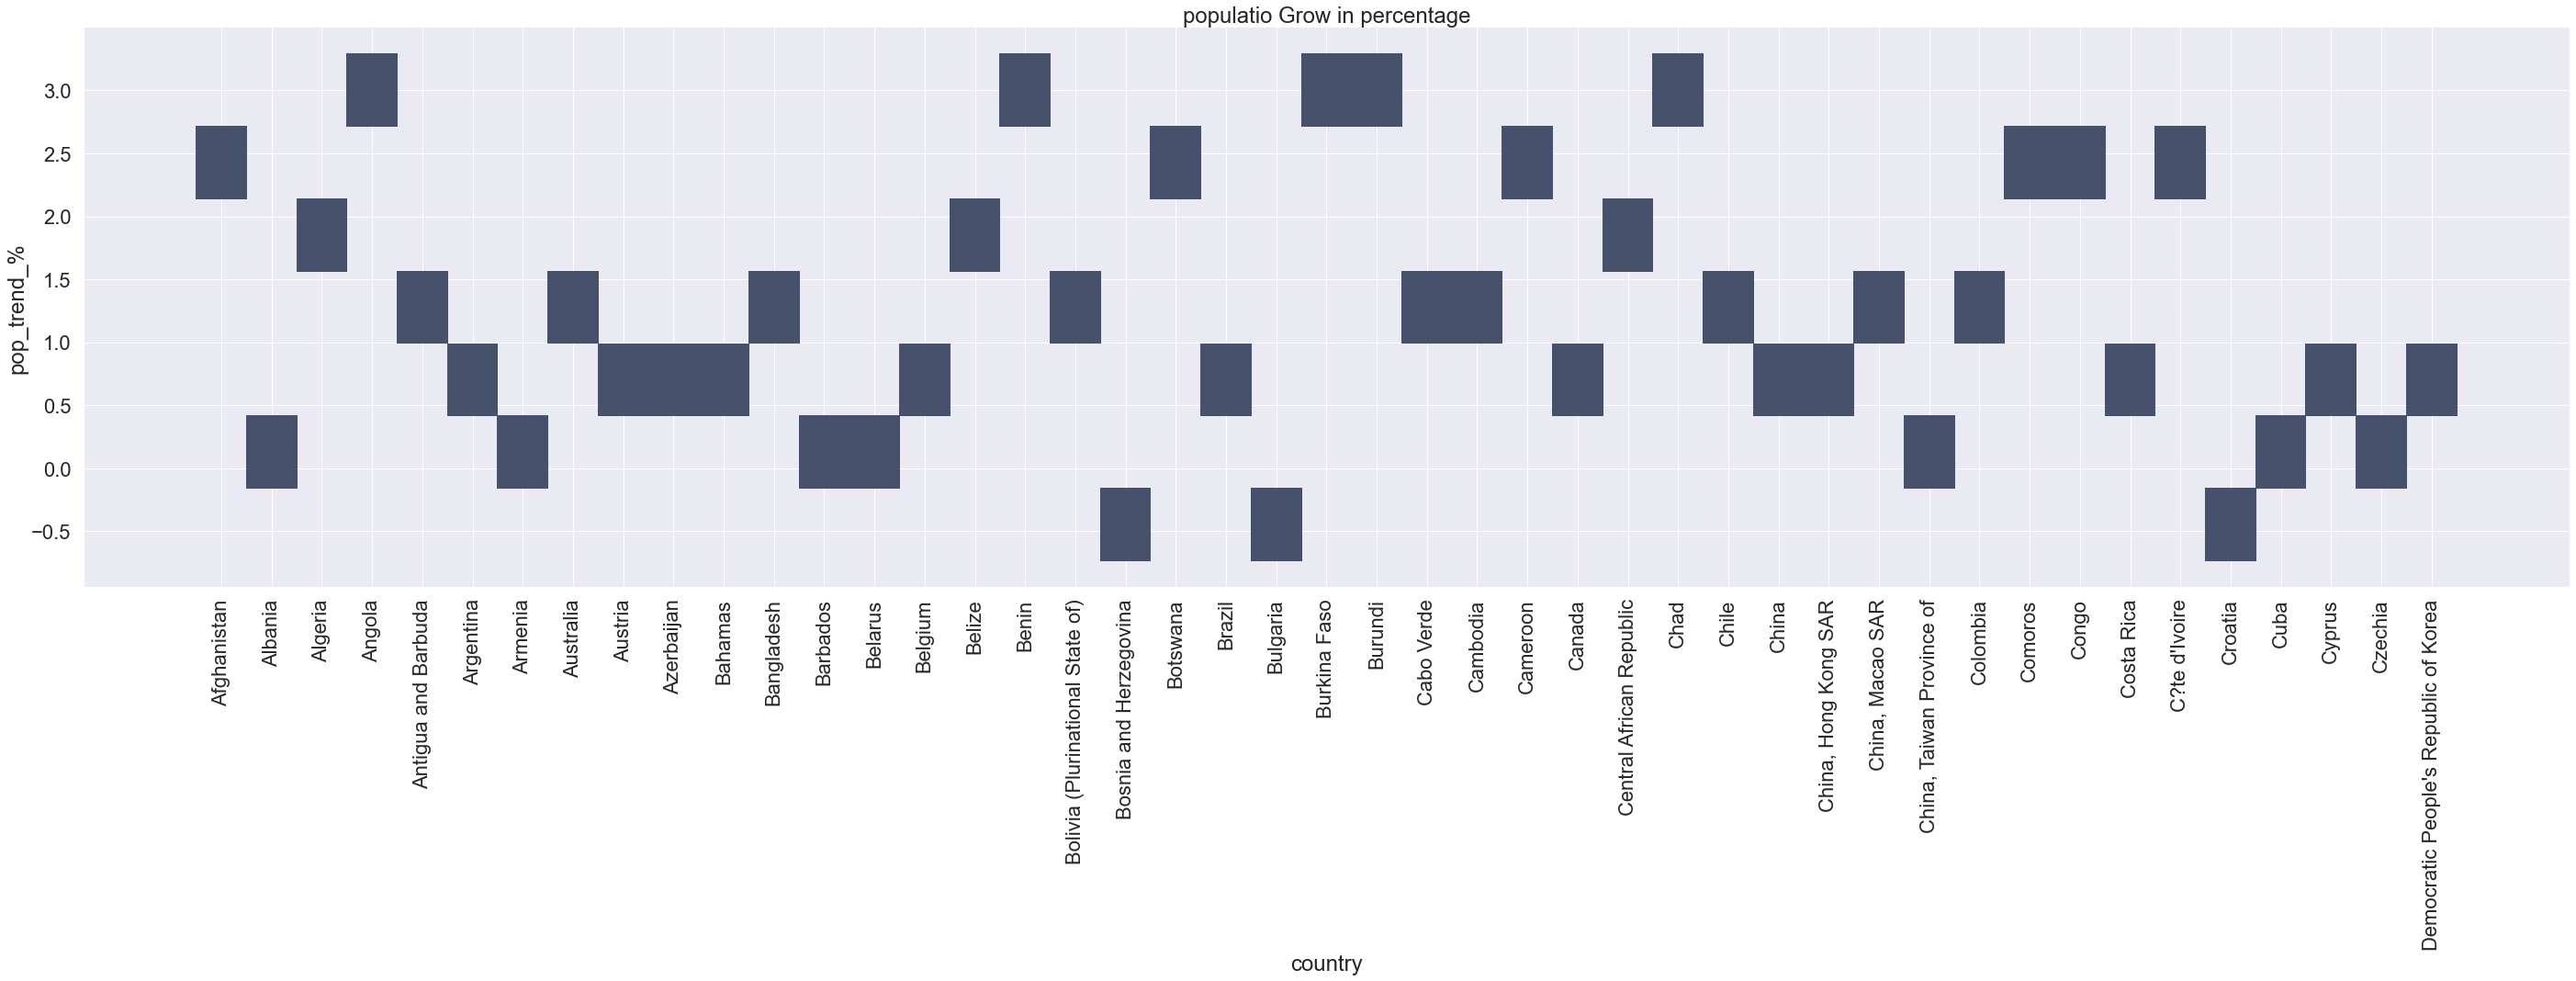

In [102]:
sns.displot(df_country[:45], x='country', y='pop_trend_%',height=10, aspect=4).set( title='populatio Grow in percentage')
plt.xticks(rotation='vertical')

**Reducing amount of countries based on criteria**

For our Analysis, we will only need the top 10 countries based on criteria or column value, in this case, pop_total.
Here are our ten countries in a data frame: China, India, and the USA are the top 3.

In [103]:
top_populated_countries = df_country.sort_values(by=['pop_total'], ascending=False)[:10].copy()

In [104]:
top_populated_countries =  pd.DataFrame(top_populated_countries)
top_populated_countries

2018                   country       2019  pop_trend_%     pop_total
31   1459378.0                     China  1465634.0     0.428676  1.460844e+09
75   1352642.0                     India  1366418.0     1.018451  1.354008e+09
170   327096.0  United States of America   329065.0     0.601964  3.274251e+08
76    267671.0                 Indonesia   270626.0     1.103967  2.679416e+08
123   212228.0                  Pakistan   216565.0     2.043557  2.124446e+08
20    209469.0                    Brazil   211050.0     0.754766  2.096800e+08
119   195875.0                   Nigeria   200964.0     2.598086  1.960760e+08
11    161377.0                Bangladesh   163046.0     1.034224  1.615400e+08
134   145734.0        Russian Federation   145872.0     0.094693  1.458799e+08
83    127202.0                     Japan   126860.0    -0.268864  1.273289e+08

**What are the top 10 most populated countries?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United States of America'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Bangladesh'),
  Text(8, 0, 'Russian Federation'),
  Text(9, 0, 'Japan')])

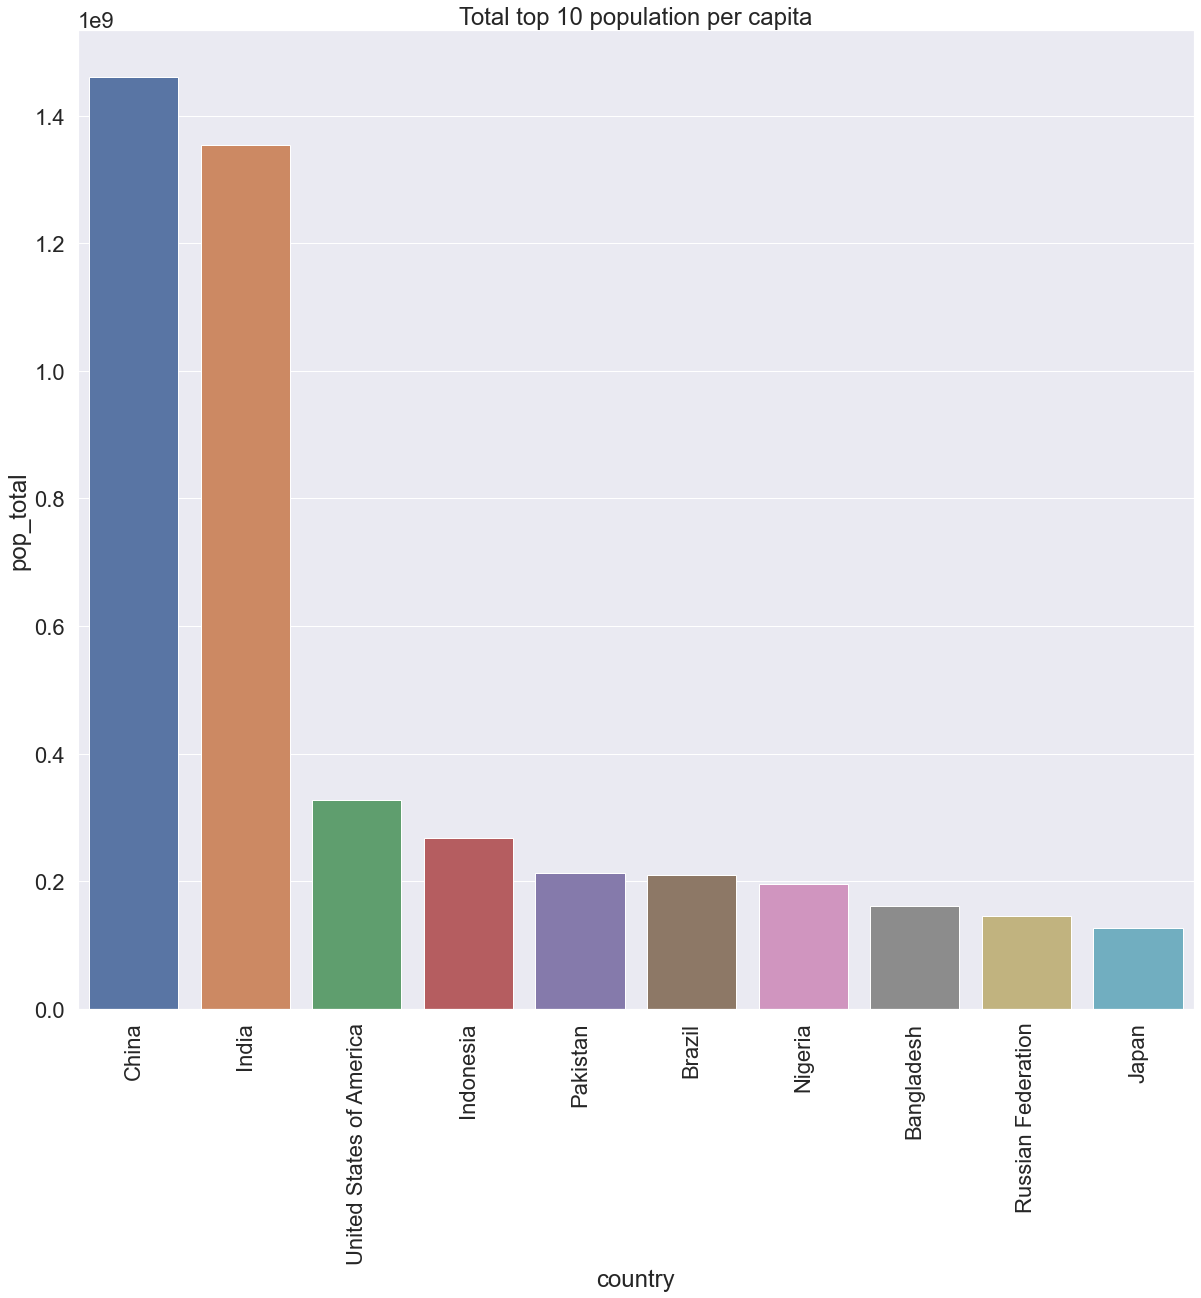

In [105]:
sns.barplot( data= top_populated_countries, y= 'pop_total', x='country').set( title='Total top 10 population per capita')
plt.xticks(rotation='vertical')


China has the highest population of all the countries, which is a difference of more than 205 thousand per 1000 citizens compared to India in second place on this top 10, the USA here is in Third place here, and Brazil is part of the top 5.
Russia and Japan are the last ones. Even if Tokyo is one of the most densely populated countries in the world, the overall population is smaller than Indonesia, Pakistan, Nigeria, Bangladesh, and Russia, so our number is 10.

**What are the top 10 populated countries in percentage?**

In [106]:
top_populated_countries = df_country.sort_values(by=['pop_trend_%'], ascending=False)[:10].copy()

In [107]:
top_populated_countries =  pd.DataFrame(top_populated_countries)
top_populated_countries

2018                           country      2019  pop_trend_%  \
118  22443.00                             Niger  23311.00     3.867576   
165  42729.00                            Uganda  44270.00     3.606450   
3    30810.00                            Angola  31825.00     3.294385   
45   84068.00  Democratic Republic of the Congo  86791.00     3.239045   
23   11175.37                           Burundi  11530.58     3.178508   
102  19078.00                              Mali  19658.00     3.040151   
29   15478.00                              Chad  15947.00     3.030107   
122   4829.00                              Oman   4975.00     3.023400   
169  56313.00       United Republic of Tanzania  58005.00     3.004635   
61    2280.00                            Gambia   2348.00     2.982456   

       pop_total  
118  22466311.00  
165  42773270.00  
3    30841825.00  
45   84154791.00  
23   11186900.58  
102  19097658.00  
29   15493947.00  
122   4833975.00  
169  56371005.00  
61    2282348.00

[Text(0.5, 1.0, 'population growth in percentage')]

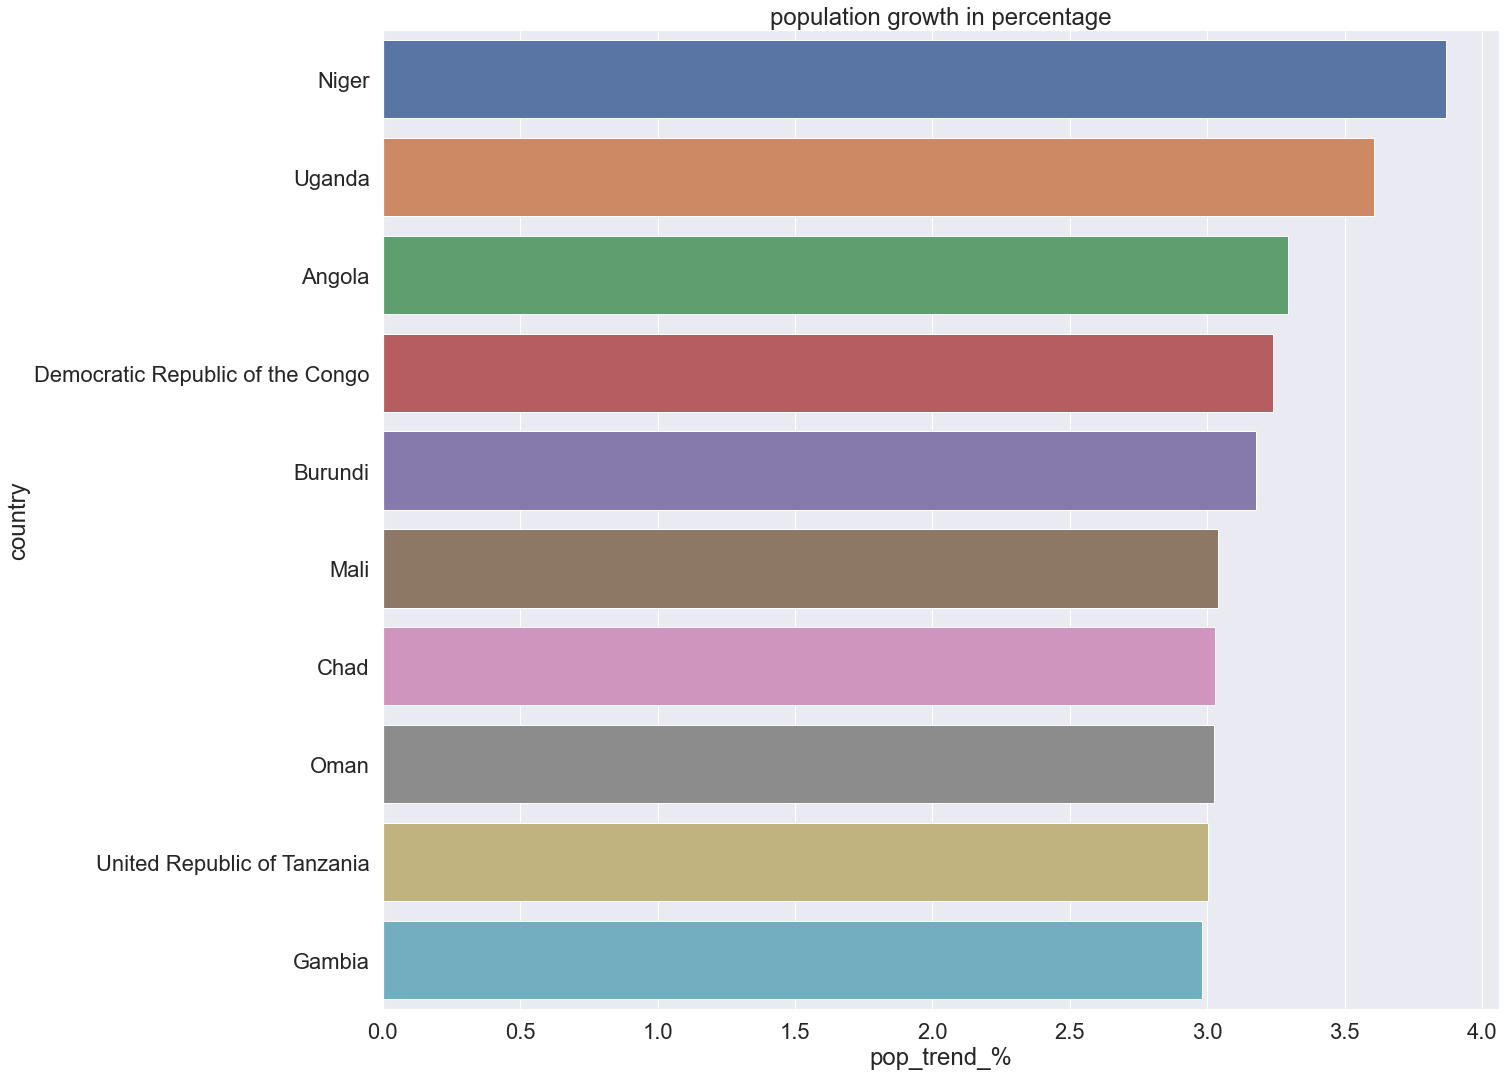

In [108]:
sns.barplot( data= top_populated_countries, x= 'pop_trend_%', y='country').set( title='population growth in percentage')


Now that we have our 10 top countries by population let us see how this population is growing!
To our surprise, none of the top 10 countries per population make it to this new criteria pop_trend_% "population growth in percentage."

Another find here is that all countries in this list are from the African continent, with no European, Nord, or South American countries here.
In the first place, there is Niger, fallow by Uganda and Angola, and this last one is currently in intense economic development, which can explain its population growth!

Oman, the United Republic of Tanzania, and Gambia are the last Three on this criteria.

#### Population main indicators!

In [109]:
df_country[['pop_trend_%', 'pop_total']].describe()

pop_trend_%     pop_total
count   179.000000  1.790000e+02
mean      1.213960  4.252706e+07
std       1.116053  1.531469e+08
min      -2.690831  5.205300e+04
25%       0.435803  2.844820e+06
50%       1.190667  9.716685e+06
75%       1.981060  3.031962e+07
max       3.867576  1.460844e+09

This Selection data set has 180 countries with a population trend in percentage mean of 1.21 percent and a total mean of more than 42 million.
A minimum value of -2.69 population trend in percentage and a max of 160 million.

**Population trends in percentage**

In [110]:
df_country[df_country['pop_trend_%'] == df_country['pop_trend_%'].max()][['country', 'pop_trend_%' ]]

country  pop_trend_%
118   Niger     3.867576

In [111]:
df_country[df_country['pop_trend_%'] == df_country['pop_trend_%'].median()][['country', 'pop_trend_%' ]]

country  pop_trend_%
30   Chile     1.190667

In [112]:
df_country[df_country['pop_trend_%'] == df_country['pop_trend_%'].min()][['country', 'pop_trend_%' ]]

country  pop_trend_%
58  France    -2.690831

**Pupulation total**

In [113]:
df_country[df_country['pop_total'] == df_country['pop_total'].max()][['country', 'pop_total' ]]

country     pop_total
31   China  1.460844e+09

In [114]:
df_country[df_country['pop_total'] == df_country['pop_total'].median()][['country', 'pop_total' ]]

country  pop_total
73  Hungary  9716685.0

In [115]:
df_country[df_country['pop_total'] == df_country['pop_total'].min()][['country', 'pop_total' ]]

country  pop_total
136  Saint Kitts and Nevis    52053.0

Considering the main indicators here, we have different countries that hold the max, median, and min values:
In this selection, we have China with the maximum value, Hungary represents the median, and the minimum is Saint Kitts, and Nevis is a tiny country.

### 2) Proportion of animal proteins compared to the total amount of proteins available in the country.

In [116]:
protein_supply_quantity_g_c_day = df_food_balance[df_food_balance.element == 'Protein supply quantity (g/capita/day)'].groupby('country')['value', 'country'].sum()
food_supply_kcal_c_day = df_food_balance[df_food_balance.element == 'Food supply (kcal/capita/day)'].groupby('country')['value', 'country'].sum()
food = df_food_balance[df_food_balance.element == 'Food'].groupby('country')['value', 'country'].sum()


<ipython-input-116-933219d7a2ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  protein_supply_quantity_g_c_day = df_food_balance[df_food_balance.element == 'Protein supply quantity (g/capita/day)'].groupby('country')['value', 'country'].sum()
<ipython-input-116-933219d7a2ac>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  food_supply_kcal_c_day = df_food_balance[df_food_balance.element == 'Food supply (kcal/capita/day)'].groupby('country')['value', 'country'].sum()
<ipython-input-116-933219d7a2ac>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  food = df_food_balance[df_food_balance.element == 'Food'].groupby('country')['value', 'country'].sum()


In [117]:
df_country = pd.merge(df_country, protein_supply_quantity_g_c_day, on=('country'))

In [118]:
df_country = pd.merge(df_country, food_supply_kcal_c_day, on=('country'))

In [119]:
df_country = pd.merge(df_country, food, on=('country'))

In [120]:
df_country.rename(columns={'value_x':'protein_supply_quantity_g_c_day', 'value_y':'food_supply_kcal_c_day', 'value': 'food'}, inplace=True)

In [121]:
df_country['food_supply_kcal'] = df_country.food_supply_kcal_c_day * df_country['pop_total'] * 365

In [122]:
df_country['food_supply_kgprotein'] = df_country.protein_supply_quantity_g_c_day / 1000 * df_country['pop_total'] * 365

In [123]:
df_country['food_supply_kg'] = df_country.food * 1000 * 1000

In [124]:
df_country['protein_percentage'] = df_country.food_supply_kgprotein / df_country.food_supply_kg * 100

In [125]:
top_protein_percentage_countries = df_country.sort_values(by=['protein_percentage'], ascending=False)[:10].copy()
top_protein_percentage_countries = pd.DataFrame(top_protein_percentage_countries)
top_protein_percentage_countries

2018               country     2019  pop_trend_%   pop_total  \
125   8606.0      Papua New Guinea   8776.0     1.975366   8614776.0   
105   1267.0             Mauritius   1270.0     0.236780   1268270.0   
39   25069.0         C?te d'Ivoire  25717.0     2.584866  25094717.0   
66     111.0               Grenada    112.0     0.900901    111112.0   
60    2119.0                 Gabon   2173.0     2.548372   2121173.0   
37    5244.0                 Congo   5381.0     2.612510   5249381.0   
87     116.0              Kiribati    118.0     1.724138    116118.0   
94    4819.0               Liberia   4937.0     2.448641   4823937.0   
144     97.0            Seychelles     98.0     1.030928     97098.0   
32    7372.0  China, Hong Kong SAR   7436.0     0.868150   7379436.0   

     protein_supply_quantity_g_c_day  food_supply_kcal_c_day     food  \
125                           143.87                  1321.0  1483.24   
105                           164.42                  1945.0   272.04   
39                             57.82                   452.0  1962.62   
66                            168.83                  2370.0    26.02   
60                            155.59                  1510.0   464.74   
37                            103.58                   899.0   768.90   
87                            142.36                  1430.0    23.50   
94                             42.90                   496.0   294.98   
144                           203.39                  2471.0    28.16   
32                            380.55                  5155.0  4058.14   

     food_supply_kcal  food_supply_kgprotein  food_supply_kg  \
125      4.153743e+12           4.523839e+08    1.483240e+09   
105      9.003766e+11           7.611307e+07    2.720400e+08   
39       4.140126e+12           5.296064e+08    1.962620e+09   
66       9.611744e+10           6.847049e+06    2.602000e+07   
60       1.169084e+12           1.204622e+08    4.647400e+08   
37       1.722506e+12           1.984618e+08    7.689000e+08   
87       6.060779e+10           6.033654e+06    2.350000e+07   
94       8.733256e+11           7.553562e+07    2.949800e+08   
144      8.757414e+10           7.208298e+06    2.816000e+07   
32       1.388496e+13           1.025009e+09    4.058140e+09   

     protein_percentage  
125           30.499707  
105           27.978631  
39            26.984665  
66            26.314563  
60            25.920333  
37            25.811129  
87            25.675123  
94            25.607030  
144           25.597650  
32            25.258103

[Text(0.5, 1.0, 'Population High Protein in percentage')]

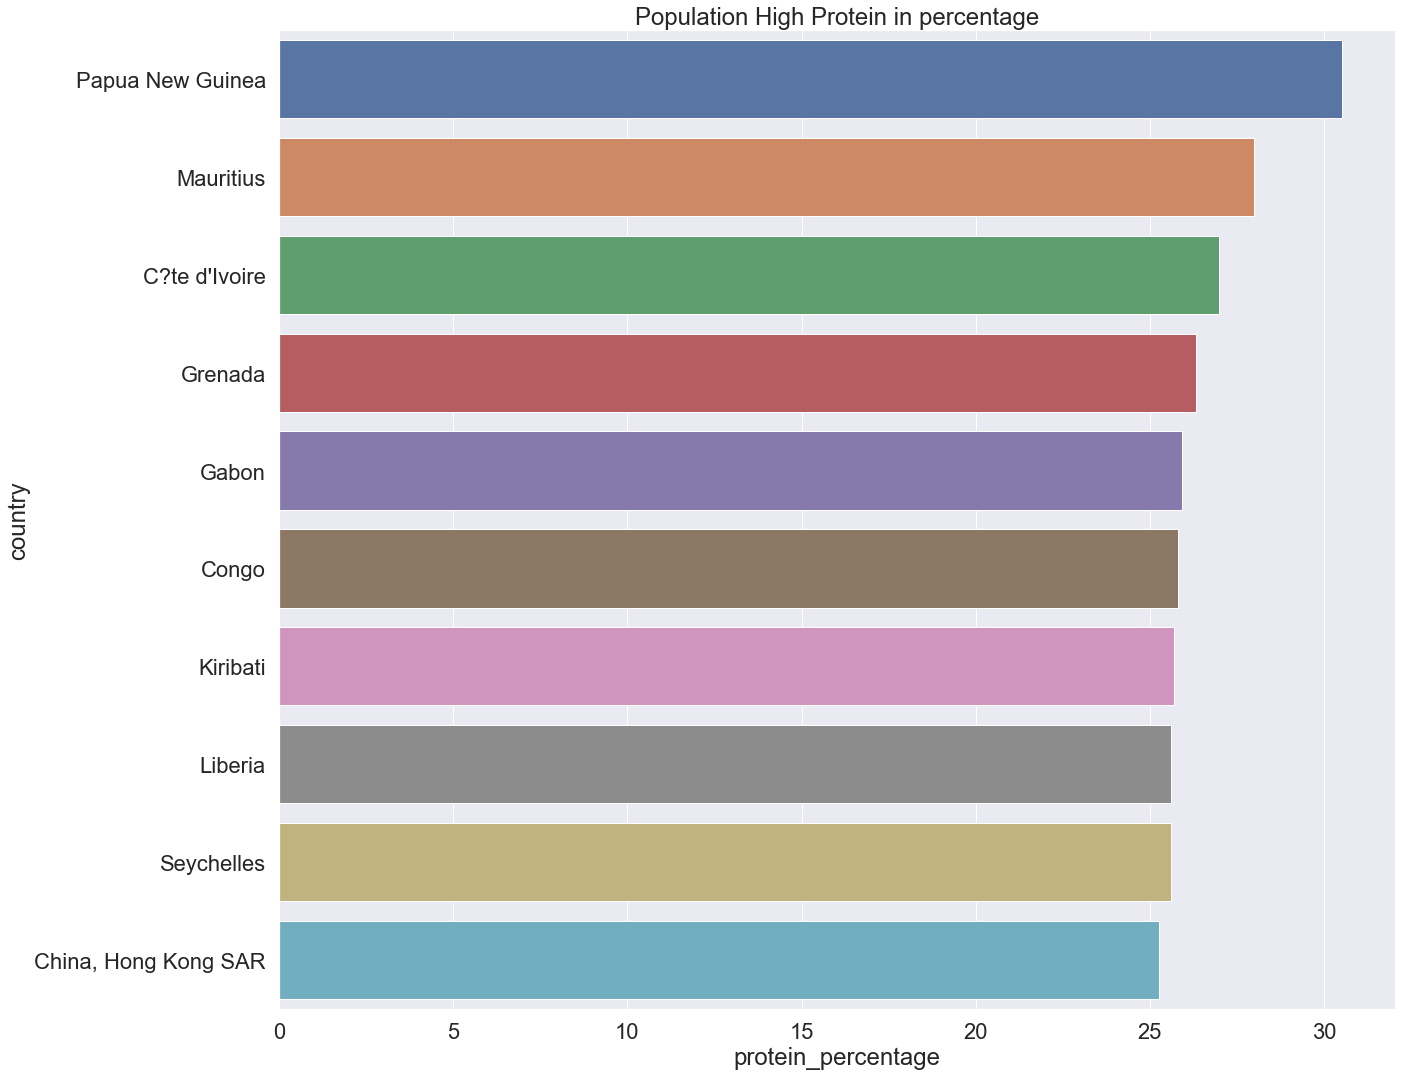

In [126]:
sns.barplot( data= top_protein_percentage_countries, x= 'protein_percentage', y='country').set( title='Population High Protein in percentage')


Considering the protein consumption per country, we get a different figure here!
New countries like Papua New Guinea emerge as the leading protein consumer, followed by Mauritius, Corte D'ivorie, Grenade, Gabon, and Congo.

#### Protein main indicators!

In [127]:
df_country[['protein_percentage']].describe()

protein_percentage
count          179.000000
mean            18.099970
std              4.679200
min             10.473208
25%             14.152009
50%             17.399904
75%             22.220573
max             30.499707

On this selection, with all the 180 countries, we have a mean of 18% and a standard deviation of 4.67%. The minimal values here are above 10.47% with a Max of 30.49%. One-quarter of the percentage of protein is 14.15%, a third of 22.22%

**Protein total**

In [128]:
df_country[df_country['protein_percentage'] == df_country['protein_percentage'].max()][['country', 'protein_percentage' ]]

country  protein_percentage
125  Papua New Guinea           30.499707

In [129]:
df_country[df_country['protein_percentage'] == df_country['protein_percentage'].median()][['country', 'protein_percentage' ]]

country  protein_percentage
78    Iraq           17.399904

In [130]:
df_country[df_country['protein_percentage'] == df_country['protein_percentage'].min()][['country', 'protein_percentage' ]]

country  protein_percentage
146  Slovakia           10.473208

Papua New Guinea holds the maximal percentage of protein, the median value here is from Iraq, and the minimum value is from Slovakia.

### 3) Food availability in protein per capita.

In [131]:
top_food_supply_kgprotein_countries = df_country.sort_values(by=['food_supply_kgprotein'], ascending=False)[:10].copy()
top_food_supply_kgprotein_countries =  pd.DataFrame(top_food_supply_kgprotein_countries)
top_food_supply_kgprotein_countries

2018                   country       2019  pop_trend_%  \
31   1459378.0                     China  1465634.0     0.428676   
170   327096.0  United States of America   329065.0     0.601964   
75   1352642.0                     India  1366418.0     1.018451   
20    209469.0                    Brazil   211050.0     0.754766   
134   145734.0        Russian Federation   145872.0     0.094693   
76    267671.0                 Indonesia   270626.0     1.103967   
83    127202.0                     Japan   126860.0    -0.268864   
123   212228.0                  Pakistan   216565.0     2.043557   
106   126191.0                    Mexico   127576.0     1.097543   
63     83124.0                   Germany    83517.0     0.472788   

        pop_total  protein_supply_quantity_g_c_day  food_supply_kcal_c_day  \
31   1.460844e+09                           164.94                  3001.0   
170  3.274251e+08                           301.30                  4488.0   
75   1.354008e+09                            62.44                  1205.0   
20   2.096800e+08                           220.73                  3504.0   
134  1.458799e+08                           222.09                  3443.0   
76   2.679416e+08                            97.89                   906.0   
83   1.273289e+08                           195.69                  2264.0   
123  2.124446e+08                           114.84                  2274.0   
106  1.263186e+08                           178.97                  2790.0   
63   8.320752e+07                           254.14                  4307.0   

          food  food_supply_kcal  food_supply_kgprotein  food_supply_kg  \
31   477703.88      1.600157e+15           8.794732e+10    4.777039e+11   
170  262427.60      5.363615e+14           3.600841e+10    2.624276e+11   
75   252679.56      5.955268e+14           3.085866e+10    2.526796e+11   
20   113069.32      2.681724e+14           1.689318e+10    1.130693e+11   
134   76577.70      1.833265e+14           1.182544e+10    7.657770e+10   
76    41507.88      8.860562e+13           9.573514e+09    4.150788e+10   
83    42711.34      1.052195e+14           9.094699e+09    4.271134e+10   
123   60994.26      1.763311e+14           8.904954e+09    6.099426e+10   
106   51727.74      1.286365e+14           8.251641e+09    5.172774e+10   
63    48151.66      1.308068e+14           7.718421e+09    4.815166e+10   

     protein_percentage  
31            18.410425  
170           13.721273  
75            12.212568  
20            14.940549  
134           15.442404  
76            23.064329  
83            21.293407  
123           14.599659  
106           15.952062  
63            16.029397

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Russian Federation'),
  Text(5, 0, 'Indonesia'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Pakistan'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Germany')])

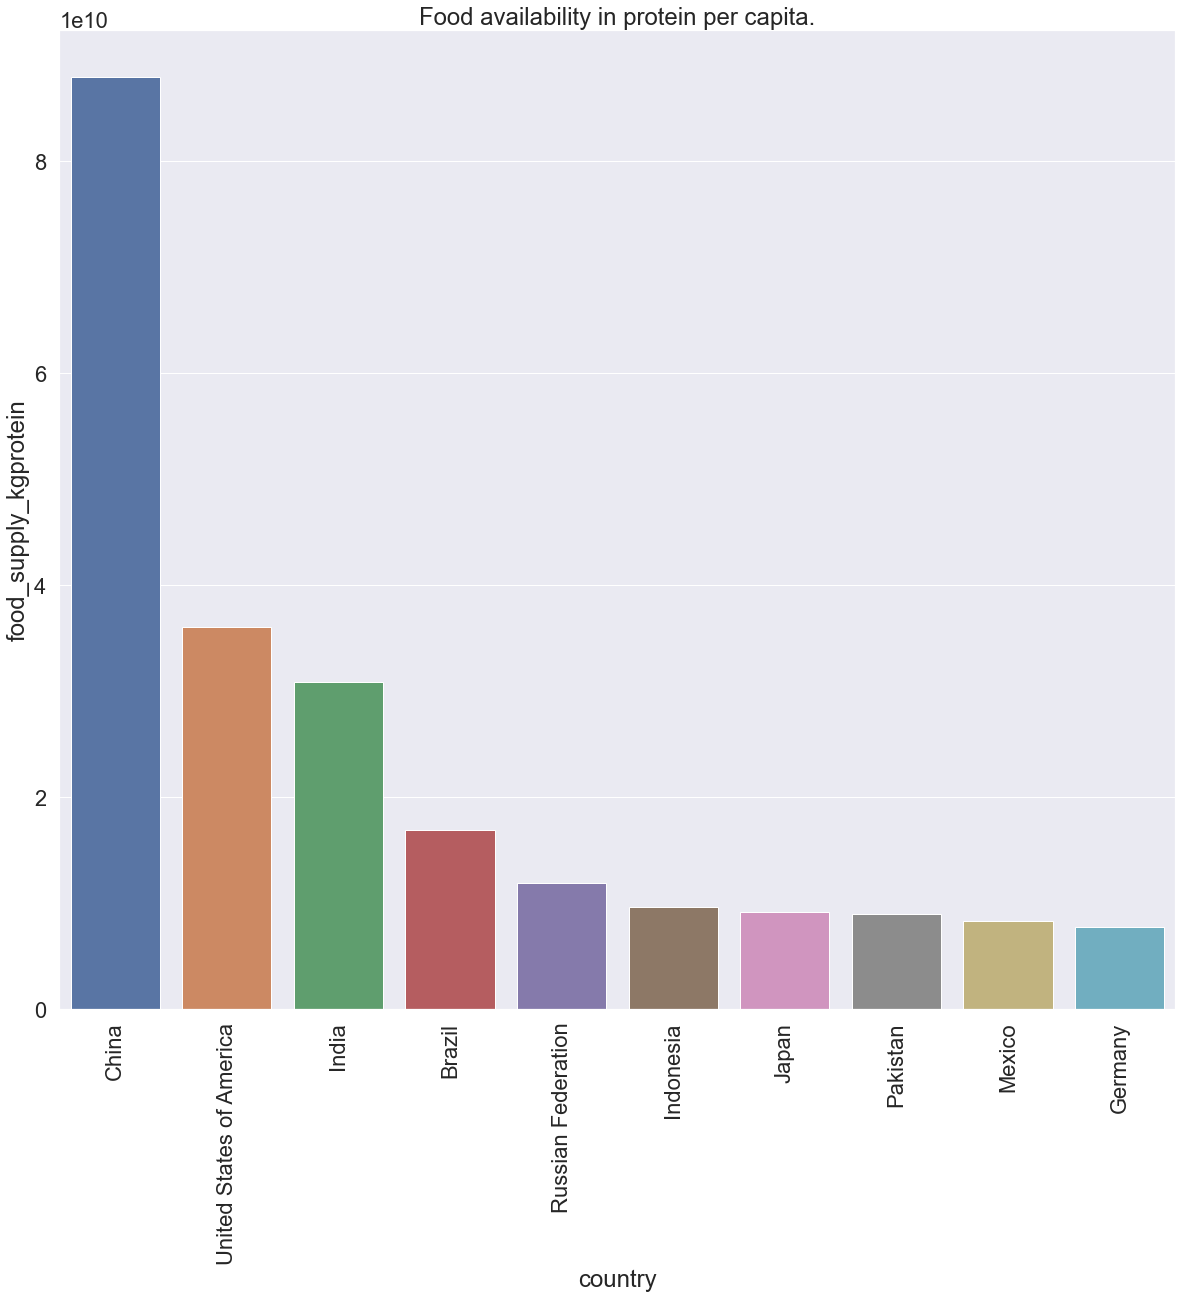

In [132]:
sns.barplot( data= top_food_supply_kgprotein_countries, x= 'country', y='food_supply_kgprotein').set( title='Food availability in protein per capita.')
plt.xticks(rotation='vertical')


Here we get the expected figure; these countries are highly or entirely industrialized, so as expected, they have a lot of protein supply. 

Because their population also influences this top 10 selection, we have China leading then the USA, India, Brazil, and Russian Federation.
One extra good insight here is that wealth is not a predictor for protein supply in kg per capita.

#### Protein main indicators!

In [133]:
df_country[['food_supply_kgprotein']].describe()

food_supply_kgprotein
count           1.790000e+02
mean            2.069072e+09
std             7.646208e+09
min             3.553068e+06
25%             1.254459e+08
50%             3.838117e+08
75%             1.076311e+09
max             8.794732e+10

The supply of protein per Kg here by countries has a mean of more than 2 million, and its standard deviation is more than 7,5 million. The min of about 3,5 million and a max of almost 9 million.

**food supply kg protein**

In [134]:
df_country[df_country['food_supply_kgprotein'] == df_country['food_supply_kgprotein'].max()][['country', 'food_supply_kgprotein' ]]

country  food_supply_kgprotein
31   China           8.794732e+10

In [135]:
df_country[df_country['food_supply_kgprotein'] == df_country['food_supply_kgprotein'].median()][['country', 'food_supply_kgprotein' ]]

country  food_supply_kgprotein
116  New Zealand           3.838117e+08

In [136]:
df_country[df_country['food_supply_kgprotein'] == df_country['food_supply_kgprotein'].min()][['country', 'food_supply_kgprotein' ]]

country  food_supply_kgprotein
136  Saint Kitts and Nevis           3.553068e+06

Once again, on the selected countries' main indicators, we see China representing the maximal value, the median is New Zealand, and again the minimal is Saint Kitts and Nevis.

And then try by himself 2 graphs for the next 2 questions:

### 4) Food availability in calories per capita.

In [137]:
top_food_supply_kcal_countries = df_country.sort_values(by=['food_supply_kcal'], ascending=False)[:10].copy()
top_food_supply_kcal_countries =  pd.DataFrame(top_food_supply_kcal_countries)
top_food_supply_kcal_countries

2018                   country       2019  pop_trend_%  \
31   1459378.0                     China  1465634.0     0.428676   
75   1352642.0                     India  1366418.0     1.018451   
170   327096.0  United States of America   329065.0     0.601964   
20    209469.0                    Brazil   211050.0     0.754766   
134   145734.0        Russian Federation   145872.0     0.094693   
123   212228.0                  Pakistan   216565.0     2.043557   
63     83124.0                   Germany    83517.0     0.472788   
106   126191.0                    Mexico   127576.0     1.097543   
58     66931.0                    France    65130.0    -2.690831   
83    127202.0                     Japan   126860.0    -0.268864   

        pop_total  protein_supply_quantity_g_c_day  food_supply_kcal_c_day  \
31   1.460844e+09                           164.94                  3001.0   
75   1.354008e+09                            62.44                  1205.0   
170  3.274251e+08                           301.30                  4488.0   
20   2.096800e+08                           220.73                  3504.0   
134  1.458799e+08                           222.09                  3443.0   
123  2.124446e+08                           114.84                  2274.0   
63   8.320752e+07                           254.14                  4307.0   
106  1.263186e+08                           178.97                  2790.0   
58   6.699613e+07                           257.29                  4455.0   
83   1.273289e+08                           195.69                  2264.0   

          food  food_supply_kcal  food_supply_kgprotein  food_supply_kg  \
31   477703.88      1.600157e+15           8.794732e+10    4.777039e+11   
75   252679.56      5.955268e+14           3.085866e+10    2.526796e+11   
170  262427.60      5.363615e+14           3.600841e+10    2.624276e+11   
20   113069.32      2.681724e+14           1.689318e+10    1.130693e+11   
134   76577.70      1.833265e+14           1.182544e+10    7.657770e+10   
123   60994.26      1.763311e+14           8.904954e+09    6.099426e+10   
63    48151.66      1.308068e+14           7.718421e+09    4.815166e+10   
106   51727.74      1.286365e+14           8.251641e+09    5.172774e+10   
58    42791.56      1.089407e+14           6.291664e+09    4.279156e+10   
83    42711.34      1.052195e+14           9.094699e+09    4.271134e+10   

     protein_percentage  
31            18.410425  
75            12.212568  
170           13.721273  
20            14.940549  
134           15.442404  
123           14.599659  
63            16.029397  
106           15.952062  
58            14.703048  
83            21.293407

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United States of America'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Russian Federation'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Japan')])

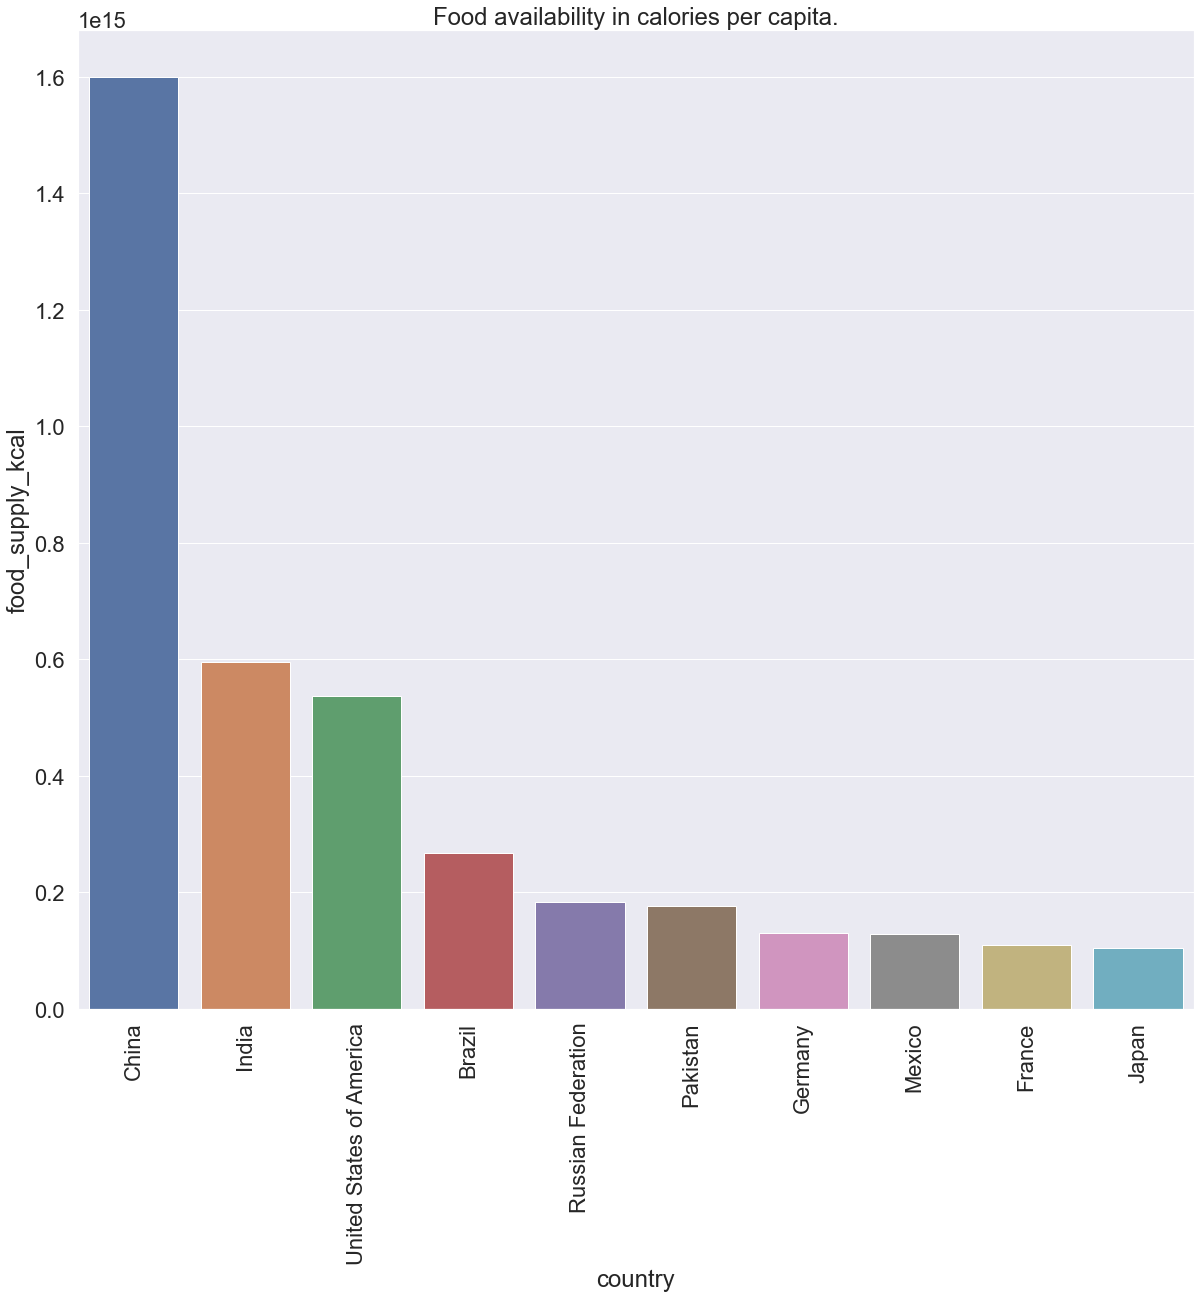

In [138]:
sns.barplot( data= top_food_supply_kcal_countries, x='country', y='food_supply_kcal').set( title='Food availability in calories per capita.')
plt.xticks(rotation='vertical')


This figure confirms the relationship between population and food supply, once again, we have China as first in this selection, but this time India is before the USA, fallow by Brazil and Russian Federation.
A more detailed analysis of key indicators like GDP, Industrialization level, and Economy orientation type would give us more insight to why countries like Germany, France and Japan are in the last places in this figure.

#### Food supply kcal main indicators!

In [139]:
df_country[['food_supply_kcal']].describe()

food_supply_kcal
count      1.790000e+02
mean       3.322314e+13
std        1.358181e+14
min        5.479411e+10
25%        1.757776e+12
50%        5.470657e+12
75%        1.700663e+13
max        1.600157e+15

This last country's selection has a mean food supply in kilo calories of 33 trillion, a standard deviation of 135 trillion. The minimum here is 54 billion and more than one quadrillion kcal of protein.

**food supply kgcal main countries**

In [140]:
df_country[df_country['food_supply_kcal'] == df_country['food_supply_kcal'].max()][['country', 'food_supply_kcal' ]]

country  food_supply_kcal
31   China      1.600157e+15

In [141]:
df_country[df_country['food_supply_kcal'] == df_country['food_supply_kcal'].median()][['country', 'food_supply_kcal' ]]

country  food_supply_kcal
64   Ghana      5.470657e+12

In [142]:
df_country[df_country['food_supply_kcal'] == df_country['food_supply_kcal'].min()][['country', 'food_supply_kcal' ]]

country  food_supply_kcal
136  Saint Kitts and Nevis      5.479411e+10

What are the countries with the values of some of these indicators?
Here again, we can see that China has the maximal value of food supply in kcal, Ghana has the median value, and Saint Kitts and Nevis, a very small country, have the minimal indicator value.

### Summary

China is the country that most appears in these figures, having a vast population that requires and consumes a lot of food and protein to maintain its workforce and continue to grow economically.

Another persistent country here is USA and India, Brazil, and Russian Federation, perhaps because of their population.

Brazil, India, and Russia are part of the so call BRIC, a group of emergent strong economic countries that require a lot of food to keep growing.

Germany and Japan are also present a few times more than other countries; they are economic powerhouses and have a significant amount of population that also food, especially protein.

Worth to mention also is France, Mexico, Pakistan, and Indonesia are less present but are in some selections.

From all the questions, we obtained ten countries with a total of 31 countries. They will be used in the next session of this Analysis, where we will apply more advanced algorithms that will reveal how this country is related.

In [143]:
studyCountries = pd.concat([top_populated_countries.country, top_protein_percentage_countries.country, top_food_supply_kgprotein_countries.country, top_food_supply_kcal_countries.country, top_protein_percentage_countries.country], ignore_index=True)

studyCountries.sort_values(ascending=True, ignore_index=True, inplace=True)

studyCountries = studyCountries.unique()
studyCountries


array(['Angola', 'Brazil', 'Burundi', "C?te d'Ivoire", 'Chad', 'China',
       'China, Hong Kong SAR', 'Congo',
       'Democratic Republic of the Congo', 'France', 'Gabon', 'Gambia',
       'Germany', 'Grenada', 'India', 'Indonesia', 'Japan', 'Kiribati',
       'Liberia', 'Mali', 'Mauritius', 'Mexico', 'Niger', 'Oman',
       'Pakistan', 'Papua New Guinea', 'Russian Federation', 'Seychelles',
       'Uganda', 'United Republic of Tanzania',
       'United States of America'], dtype=object)

## 2) A dendrogram containing all the studied countries

### PESTLE Analysis

In [144]:
#creating the main perlst dataframe

df_perstl = df_country[df_country.country.isin(studyCountries)][['country','pop_total', 'pop_trend_%', ]]
df_perstl

country     pop_total  pop_trend_%
3                              Angola  3.084182e+07     3.294385
20                             Brazil  2.096800e+08     0.754766
23                            Burundi  1.118690e+07     3.178508
29                               Chad  1.549395e+07     3.030107
31                              China  1.460844e+09     0.428676
32               China, Hong Kong SAR  7.379436e+06     0.868150
37                              Congo  5.249381e+06     2.612510
39                      C?te d'Ivoire  2.509472e+07     2.584866
45   Democratic Republic of the Congo  8.415479e+07     3.239045
58                             France  6.699613e+07    -2.690831
60                              Gabon  2.121173e+06     2.548372
61                             Gambia  2.282348e+06     2.982456
63                            Germany  8.320752e+07     0.472788
66                            Grenada  1.111120e+05     0.900901
75                              India  1.354008e+09     1.018451
76                          Indonesia  2.679416e+08     1.103967
83                              Japan  1.273289e+08    -0.268864
87                           Kiribati  1.161180e+05     1.724138
94                            Liberia  4.823937e+06     2.448641
102                              Mali  1.909766e+07     3.040151
105                         Mauritius  1.268270e+06     0.236780
106                            Mexico  1.263186e+08     1.097543
118                             Niger  2.246631e+07     3.867576
122                              Oman  4.833975e+06     3.023400
123                          Pakistan  2.124446e+08     2.043557
125                  Papua New Guinea  8.614776e+06     1.975366
134                Russian Federation  1.458799e+08     0.094693
144                        Seychelles  9.709800e+04     1.030928
165                            Uganda  4.277327e+07     3.606450
169       United Republic of Tanzania  5.637100e+07     3.004635
170          United States of America  3.274251e+08     0.601964

In [145]:
#Create a generic function to extract data from all slected study data frame.
def mergeExtradata(df_to_study: DataFrame = pd.DataFrame(), df_perstl: DataFrame = pd.DataFrame(), df_selected_study: DataFrame = pd.DataFrame(), column: str = ''):
    
    column = str.lower(column).replace(', ', '_').replace(' ', '_')
    df_selected_study = df_selected_study.groupby('country').value.sum().to_frame()
    df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )
    df_perstl.rename(columns={'value': 'value_' +column}, inplace=True)
    df_perstl.fillna(0, inplace=True)

    return df_perstl



In [146]:
df_selected_study = df_food_balance[(df_food_balance.element == 'Import Quantity') & (df_food_balance.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_balance, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Import Quantity')



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [147]:
df_selected_study = df_food_balance[(df_food_balance.element == 'Domestic supply quantity') & (df_food_balance.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_balance, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Domestic supply quantity')



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [148]:
df_selected_study = df_food_balance[(df_food_balance.element == 'Protein supply quantity (g/capita/day)') & (df_food_balance.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_balance, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Protein supply quantity (g/capita/day)')



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [149]:
df_selected_study = df_food_sicurity[(df_food_sicurity.item == 'Political stability and absence of violence/terrorism (index)') & (df_food_sicurity.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_sicurity, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Political stability and absence of violence/terrorism (index)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_instability'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [150]:
df_selected_study = df_food_sicurity[(df_food_sicurity.item == 'Average dietary energy supply adequacy (percent) (3-year average)') & (df_food_sicurity.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_sicurity, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Average dietary energy supply adequacy (percent) (3-year average)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_energy_adeguacy'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Mali'),
  Text(1, 0, 'Democratic Republic of the Congo'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'Kiribati'),
  Text(4, 0, 'Burundi'),
  Text(5, 0, 'Chad'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Niger'),
  Text(8, 0, 'Oman'),
  Text(9, 0, 'Mauritius'),
  Text(10, 0, 'Mexico'),
  Text(11, 0, 'Angola'),
  Text(12, 0, 'Liberia'),
  Text(13, 0, 'Russian Federation'),
  Text(14, 0, 'Seychelles'),
  Text(15, 0, 'Uganda'),
  Text(16, 0, 'United Republic of Tanzania'),
  Text(17, 0, 'Papua New Guinea'),
  Text(18, 0, 'Indonesia'),
  Text(19, 0, 'Brazil'),
  Text(20, 0, 'India'),
  Text(21, 0, 'Grenada'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Gambia'),
  Text(24, 0, 'Gabon'),
  Text(25, 0, 'France'),
  Text(26, 0, "C?te d'Ivoire"),
  Text(27, 0, 'Congo'),
  Text(28, 0, 'China, Hong Kong SAR'),
  Text(29, 0, 'China'),
  Text(30, 0, 'United 

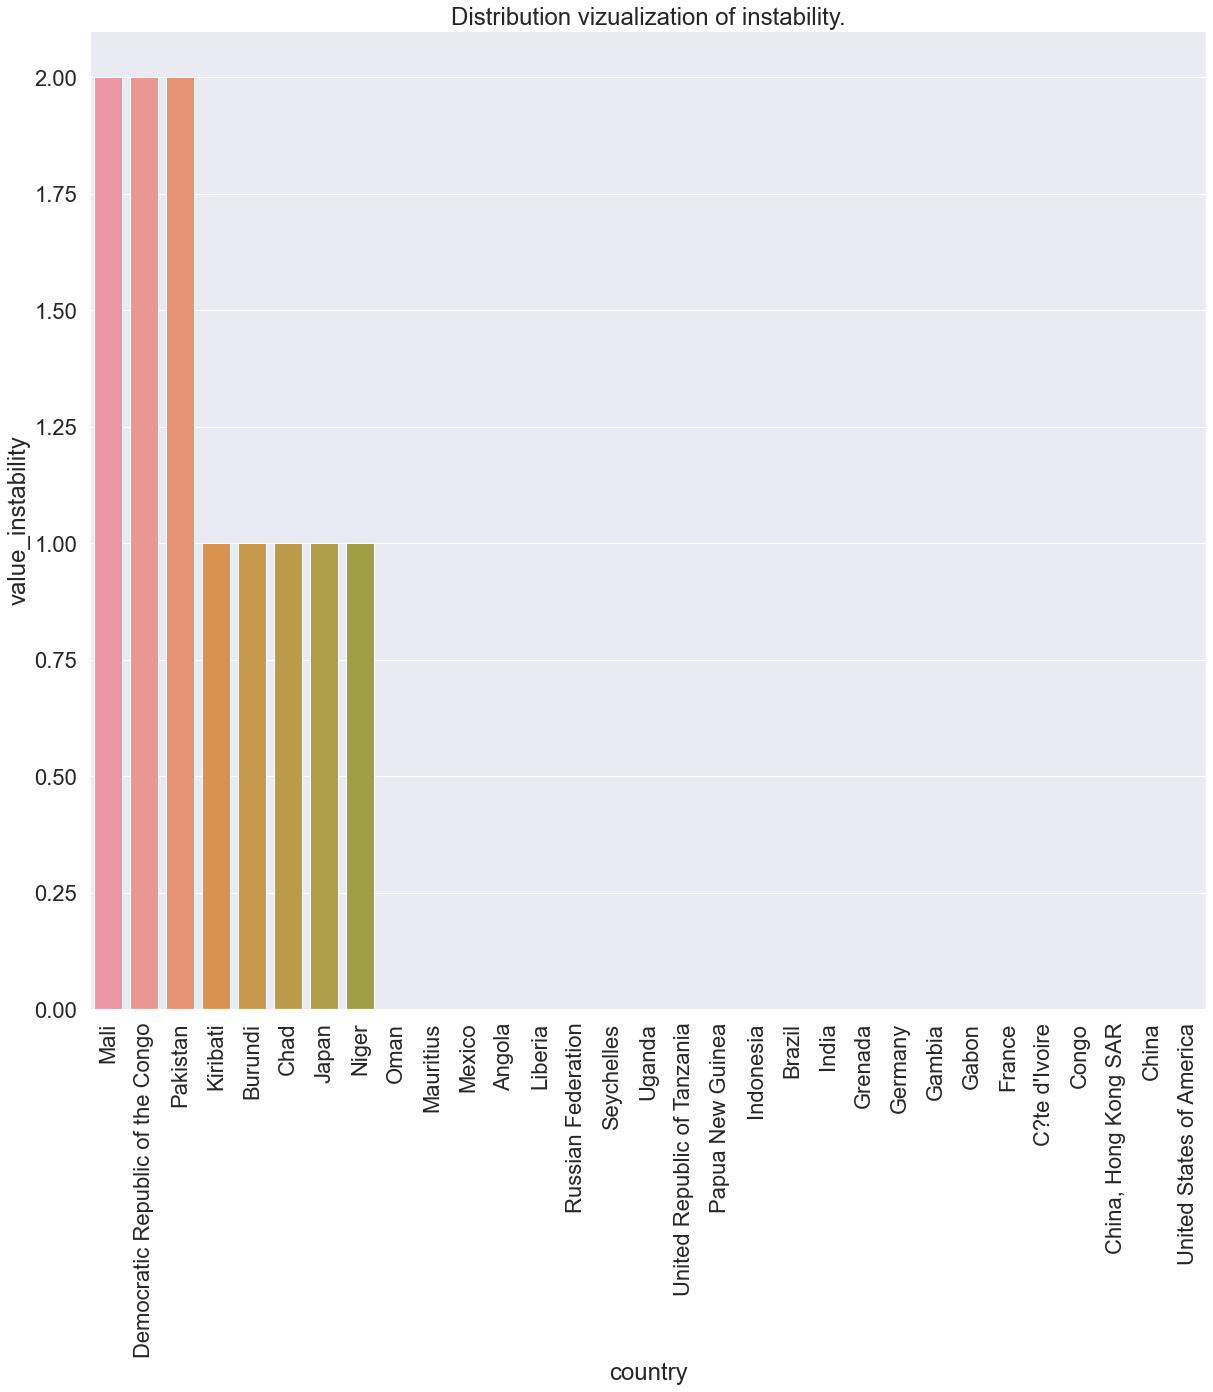

In [151]:

sns.barplot(data =df_perstl.sort_values(by='value_instability', ascending=False), x='country', y='value_instability').set( title='Distribution vizualization of instability.')

plt.xticks(rotation='vertical')


Values instability is visible only in these few countries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Burundi'),
  Text(1, 0, 'Democratic Republic of the Congo'),
  Text(2, 0, 'Congo'),
  Text(3, 0, 'Uganda'),
  Text(4, 0, 'Grenada'),
  Text(5, 0, 'Liberia'),
  Text(6, 0, 'Papua New Guinea'),
  Text(7, 0, 'Chad'),
  Text(8, 0, 'Pakistan'),
  Text(9, 0, 'India'),
  Text(10, 0, 'United Republic of Tanzania'),
  Text(11, 0, 'Japan'),
  Text(12, 0, 'Gambia'),
  Text(13, 0, 'Gabon'),
  Text(14, 0, 'Angola'),
  Text(15, 0, 'Oman'),
  Text(16, 0, 'Niger'),
  Text(17, 0, 'Mauritius'),
  Text(18, 0, 'Indonesia'),
  Text(19, 0, 'Seychelles'),
  Text(20, 0, "C?te d'Ivoire"),
  Text(21, 0, 'Mexico'),
  Text(22, 0, 'Mali'),
  Text(23, 0, 'China, Hong Kong SAR'),
  Text(24, 0, 'Brazil'),
  Text(25, 0, 'China'),
  Text(26, 0, 'Russian Federation'),
  Text(27, 0, 'Kiribati'),
  Text(28, 0, 'Germany'),
  Text(29, 0, 'France'),
  Text(30, 0, 'United 

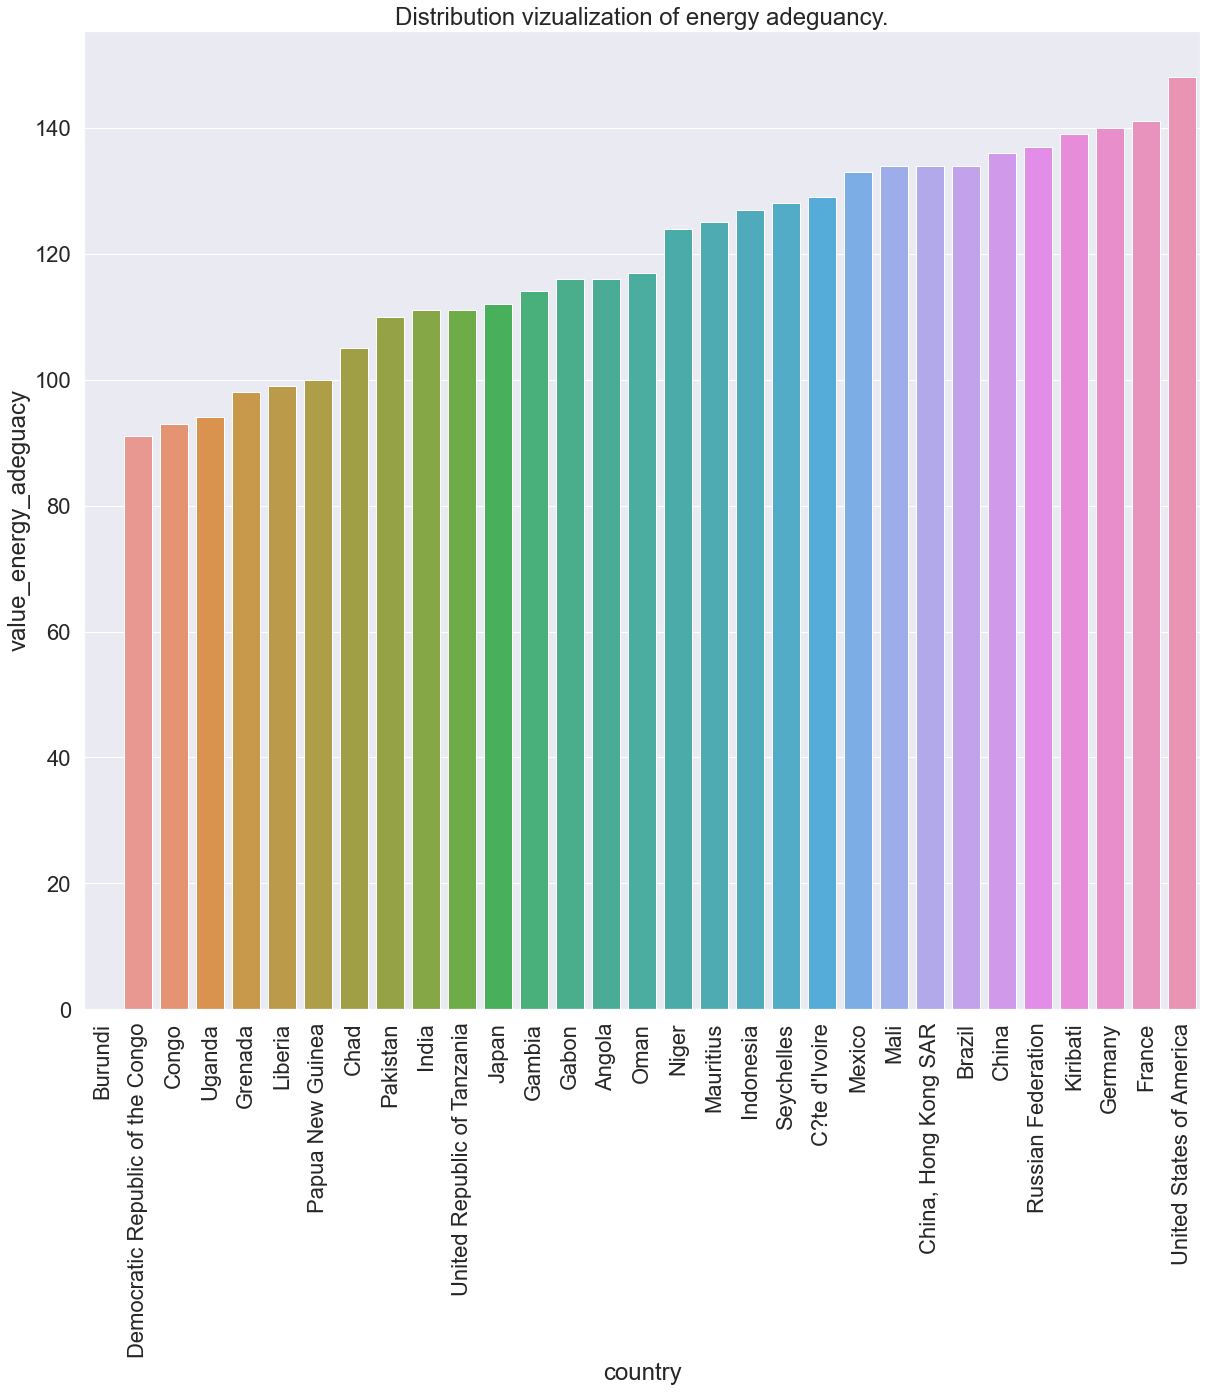

In [152]:
#Value here is value_energy_adeguacy
sns.barplot(data =df_perstl.sort_values(by='value_energy_adeguacy', ascending=True), x='country', y='value_energy_adeguacy').set( title='Distribution vizualization of energy adeguancy.')

plt.xticks(rotation='vertical', )


On Energy adequacy, we have values for all the countries apart from Burundi.

#### Economical

In [153]:
df_selected_study = df_macro_indicator[(df_macro_indicator.item ==  'Gross National Income') & (df_macro_indicator.element == 'Value US$') & (df_macro_indicator.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_macro_indicator, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Gross National Income')



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [154]:
df_selected_study = df_macro_indicator[(df_macro_indicator.item ==  'Gross Domestic Product') & (df_macro_indicator.element == 'Value US$') & (df_macro_indicator.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_macro_indicator, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Gross Domestic Product')



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Kiribati'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'Gambia'),
  Text(4, 0, 'Liberia'),
  Text(5, 0, 'Burundi'),
  Text(6, 0, 'Chad'),
  Text(7, 0, 'Congo'),
  Text(8, 0, 'Niger'),
  Text(9, 0, 'Mauritius'),
  Text(10, 0, 'Gabon'),
  Text(11, 0, 'Mali'),
  Text(12, 0, 'Papua New Guinea'),
  Text(13, 0, 'Uganda'),
  Text(14, 0, 'Democratic Republic of the Congo'),
  Text(15, 0, "C?te d'Ivoire"),
  Text(16, 0, 'United Republic of Tanzania'),
  Text(17, 0, 'Oman'),
  Text(18, 0, 'Angola'),
  Text(19, 0, 'Pakistan'),
  Text(20, 0, 'China, Hong Kong SAR'),
  Text(21, 0, 'Indonesia'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Russian Federation'),
  Text(24, 0, 'Brazil'),
  Text(25, 0, 'India'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Germany'),
  Text(28, 0, 'Japan'),
  Text(29, 0, 'China'),
  Text(30, 0, 'United 

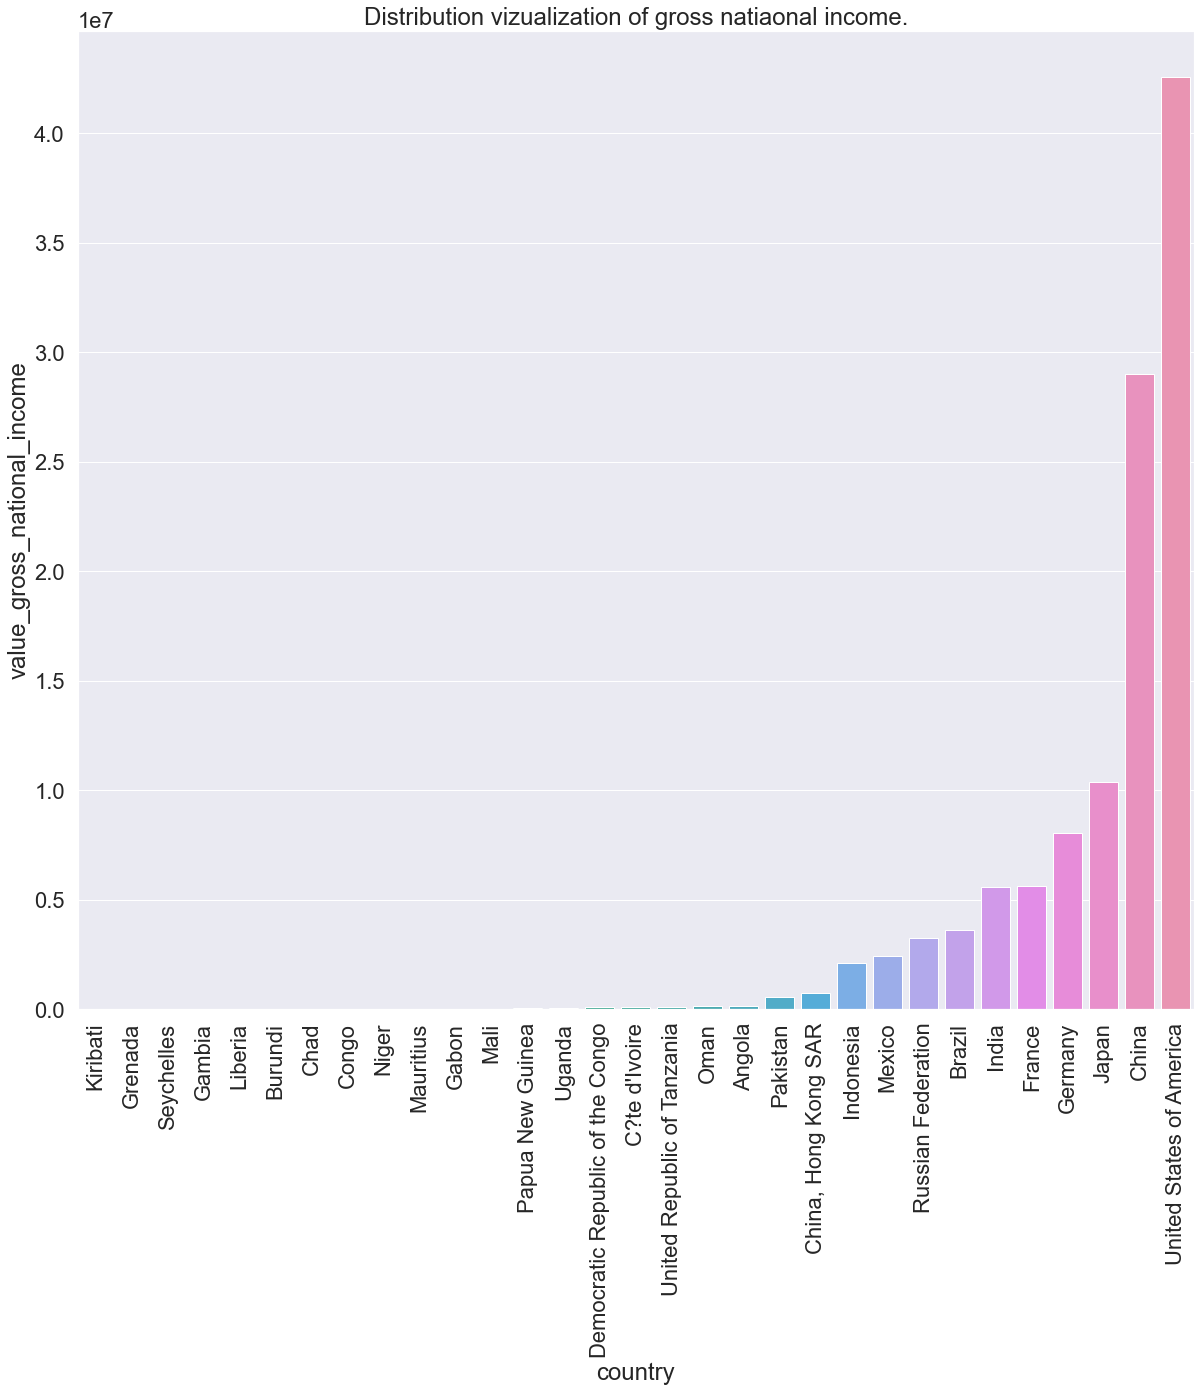

In [155]:

sns.barplot(data =df_perstl.sort_values(by='value_gross_national_income', ascending=True), x='country', y='value_gross_national_income').set( title='Distribution vizualization of gross natiaonal income.')
plt.xticks(rotation='vertical')


Here on value_gross_national_income, we only start to see significant values from DR Congo having china and the USA at the top.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Kiribati'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'Gambia'),
  Text(4, 0, 'Liberia'),
  Text(5, 0, 'Burundi'),
  Text(6, 0, 'Chad'),
  Text(7, 0, 'Niger'),
  Text(8, 0, 'Congo'),
  Text(9, 0, 'Mauritius'),
  Text(10, 0, 'Gabon'),
  Text(11, 0, 'Mali'),
  Text(12, 0, 'Papua New Guinea'),
  Text(13, 0, 'Uganda'),
  Text(14, 0, 'Democratic Republic of the Congo'),
  Text(15, 0, "C?te d'Ivoire"),
  Text(16, 0, 'United Republic of Tanzania'),
  Text(17, 0, 'Oman'),
  Text(18, 0, 'Angola'),
  Text(19, 0, 'Pakistan'),
  Text(20, 0, 'China, Hong Kong SAR'),
  Text(21, 0, 'Indonesia'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Russian Federation'),
  Text(24, 0, 'Brazil'),
  Text(25, 0, 'France'),
  Text(26, 0, 'India'),
  Text(27, 0, 'Germany'),
  Text(28, 0, 'Japan'),
  Text(29, 0, 'China'),
  Text(30, 0, 'United 

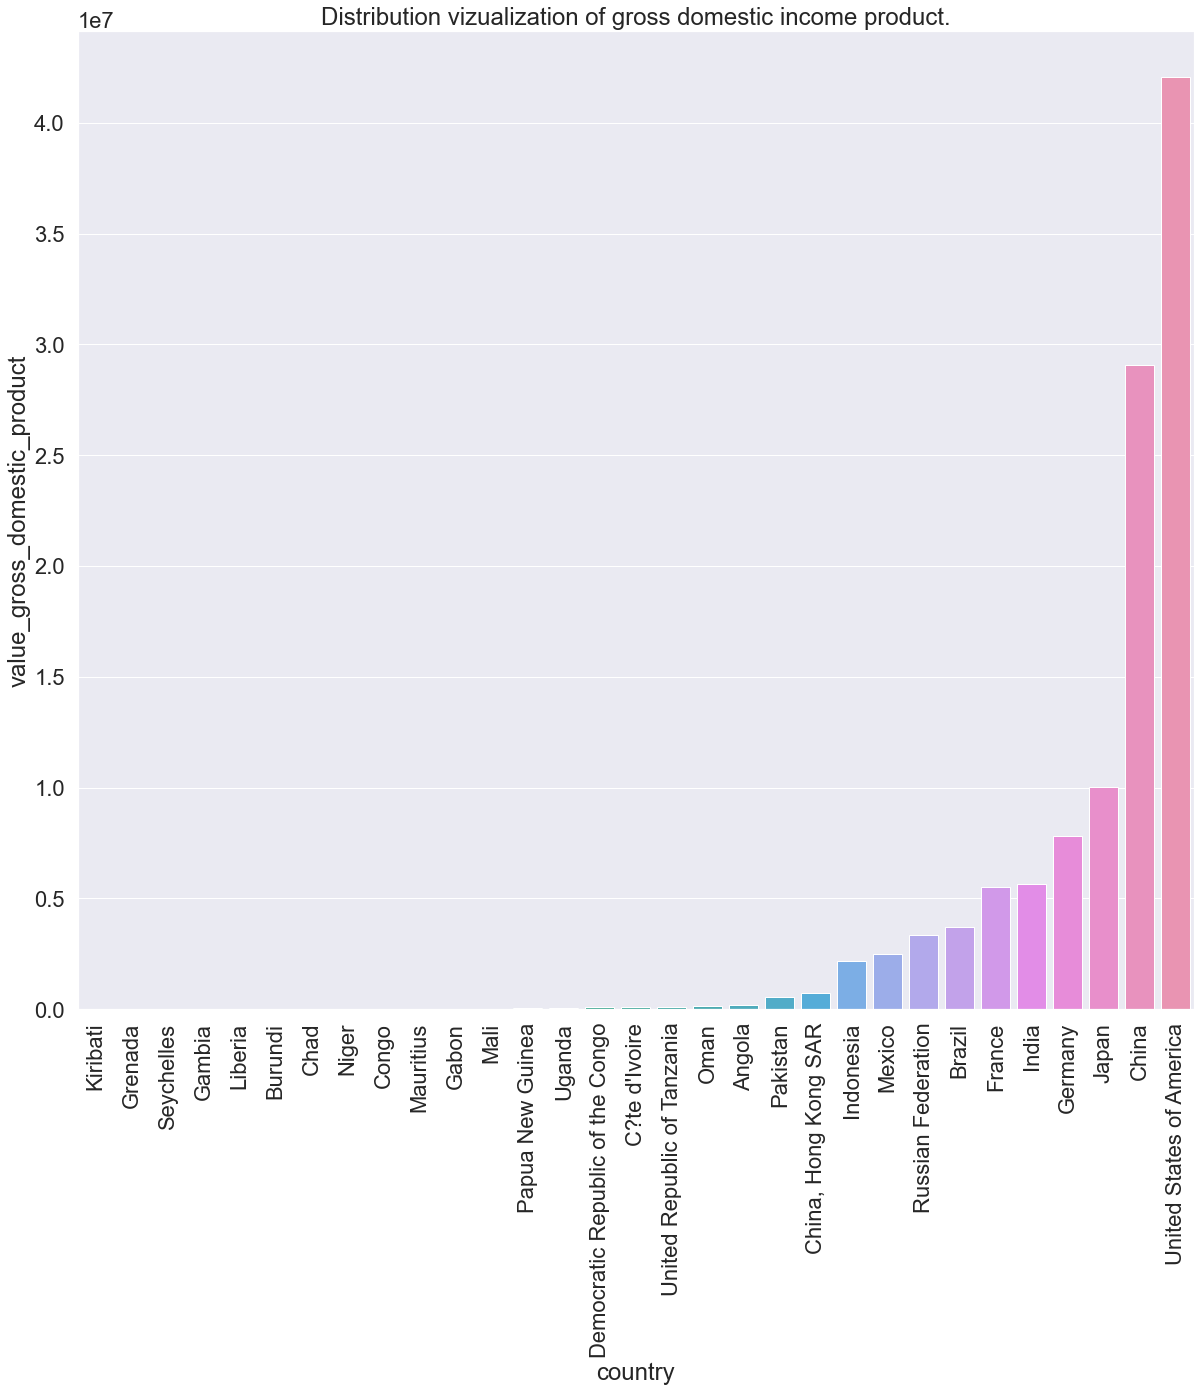

In [156]:
#value here is value_gdp_rank
sns.barplot(data =df_perstl.sort_values(by='value_gross_domestic_product', ascending=True), x='country', y='value_gross_domestic_product').set( title='Distribution vizualization of gross domestic income product.')
plt.xticks(rotation='vertical')

Here value_gross_domestic_product, once again, China and USA are at the top!

#### Social Cultural

In [157]:
df_selected_study = df_food_sicurity[(df_food_sicurity.item ==  'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)')  & (df_food_sicurity.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_sicurity, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Gross domestic product per capita, PPP, dissemination (constant 2011 international $)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_ppp_capita'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [158]:
df_selected_study = df_food_sicurity[(df_food_sicurity.item ==  'Percentage of population using safely managed sanitation services (Percent)')  & (df_food_sicurity.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_sicurity, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Percentage of population using safely managed sanitation services (Percent)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_sanitation'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Burundi'),
  Text(1, 0, 'Democratic Republic of the Congo'),
  Text(2, 0, 'Niger'),
  Text(3, 0, 'Liberia'),
  Text(4, 0, 'Chad'),
  Text(5, 0, 'Uganda'),
  Text(6, 0, 'Gambia'),
  Text(7, 0, 'Kiribati'),
  Text(8, 0, 'Mali'),
  Text(9, 0, 'United Republic of Tanzania'),
  Text(10, 0, 'Congo'),
  Text(11, 0, 'Papua New Guinea'),
  Text(12, 0, 'Pakistan'),
  Text(13, 0, "C?te d'Ivoire"),
  Text(14, 0, 'India'),
  Text(15, 0, 'Angola'),
  Text(16, 0, 'Indonesia'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Gabon'),
  Text(19, 0, 'China'),
  Text(20, 0, 'Grenada'),
  Text(21, 0, 'Mexico'),
  Text(22, 0, 'Mauritius'),
  Text(23, 0, 'Russian Federation'),
  Text(24, 0, 'Seychelles'),
  Text(25, 0, 'Oman'),
  Text(26, 0, 'Japan'),
  Text(27, 0, 'France'),
  Text(28, 0, 'Germany'),
  Text(29, 0, 'China, Hong Kong SAR'),
  Text(30, 0, 'United 

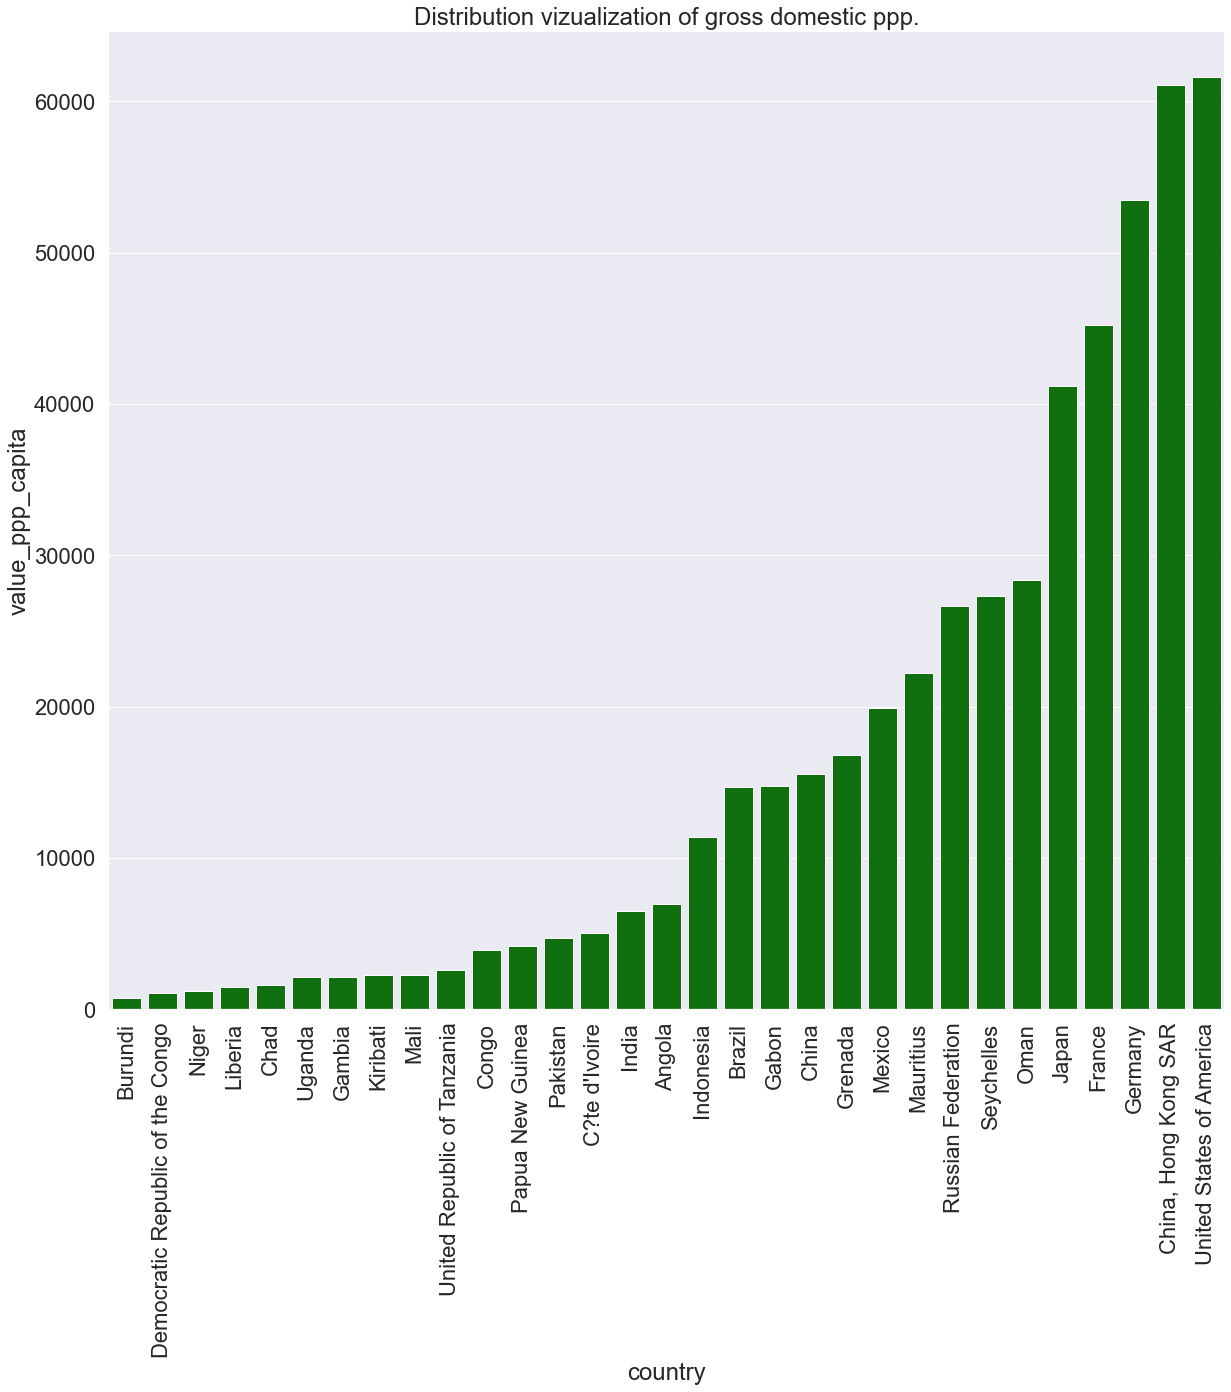

In [159]:

sns.barplot(data =df_perstl.sort_values(by='value_ppp_capita', ascending=True), x='country', y='value_ppp_capita', color='green', label='ppp' ).set( title='Distribution vizualization of gross domestic ppp.')
plt.xticks(rotation='vertical')


At value_ppp_capita, small countries like Burundi have lower capital, and as expected, the USA, China, Germany, France, and Japan.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Angola'),
  Text(1, 0, 'Uganda'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'Papua New Guinea'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Oman'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Liberia'),
  Text(8, 0, 'Grenada'),
  Text(9, 0, 'Gabon'),
  Text(10, 0, 'Indonesia'),
  Text(11, 0, 'Congo'),
  Text(12, 0, 'Burundi'),
  Text(13, 0, "C?te d'Ivoire"),
  Text(14, 0, 'Chad'),
  Text(15, 0, 'Democratic Republic of the Congo'),
  Text(16, 0, 'Niger'),
  Text(17, 0, 'Mali'),
  Text(18, 0, 'United Republic of Tanzania'),
  Text(19, 0, 'Kiribati'),
  Text(20, 0, 'Gambia'),
  Text(21, 0, 'India'),
  Text(22, 0, 'Brazil'),
  Text(23, 0, 'Mexico'),
  Text(24, 0, 'Russian Federation'),
  Text(25, 0, 'China'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Japan'),
  Text(28, 0, 'China, Hong Kong SAR'),
  Text(29, 0, 'Germany'),
  Text(30, 0, 'United 

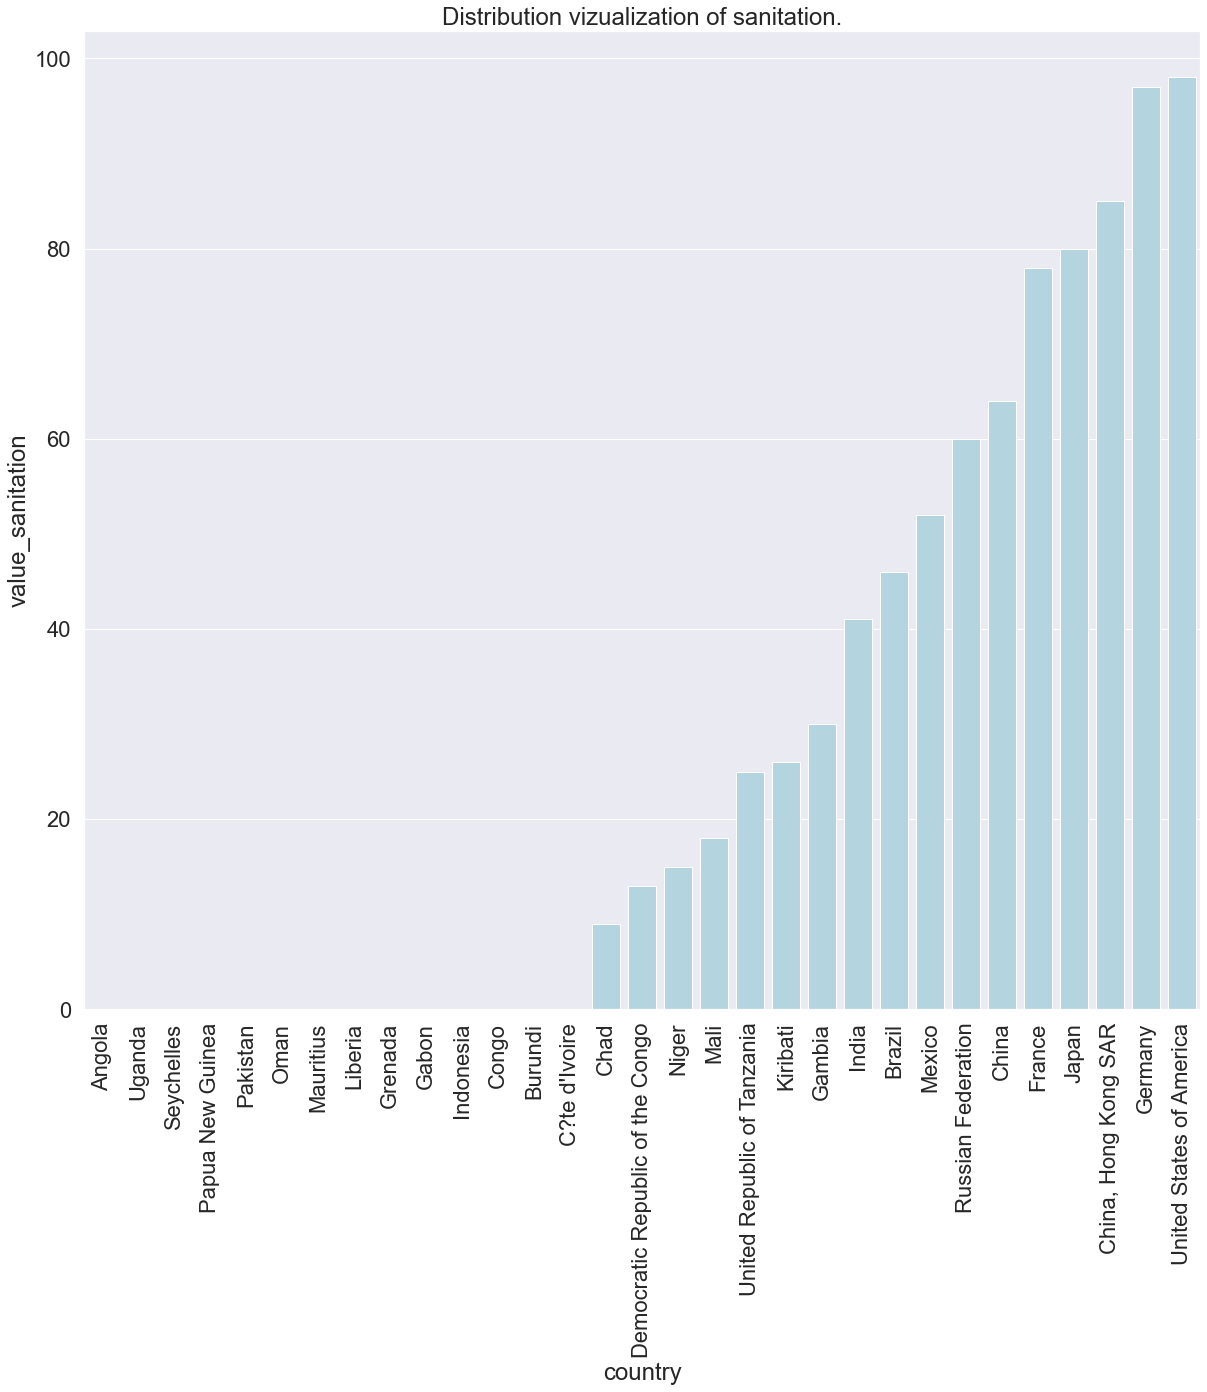

In [160]:

sns.barplot(data =df_perstl.sort_values(by='value_sanitation', ascending=True), x='country', y='value_sanitation', color='lightblue', label= 'sanitation').set( title='Distribution vizualization of sanitation.')
plt.xticks(rotation='vertical')


#### Technological

In [161]:
df_selected_study = df_food_sicurity[(df_food_sicurity.item ==  'Rail lines density (total route in km per 100 square km of land area)')  & (df_food_sicurity.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_food_sicurity, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Rail lines density (total route in km per 100 square km of land area)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_automative_railway'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


In [162]:
df_selected_study = df_macro_indicator[(df_macro_indicator.item ==  'Value Added (Manufacture of food, beverages and tobacco products)')  & (df_macro_indicator.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_macro_indicator, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Value Added (Manufacture of food, beverages and tobacco products)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_manufacture'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Angola'),
  Text(1, 0, 'Uganda'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'Russian Federation'),
  Text(4, 0, 'Papua New Guinea'),
  Text(5, 0, 'Oman'),
  Text(6, 0, 'Niger'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'Mauritius'),
  Text(9, 0, 'Mali'),
  Text(10, 0, 'Liberia'),
  Text(11, 0, 'Kiribati'),
  Text(12, 0, 'United Republic of Tanzania'),
  Text(13, 0, 'Indonesia'),
  Text(14, 0, 'Congo'),
  Text(15, 0, 'Brazil'),
  Text(16, 0, 'Burundi'),
  Text(17, 0, 'Gambia'),
  Text(18, 0, 'Gabon'),
  Text(19, 0, 'Chad'),
  Text(20, 0, 'Democratic Republic of the Congo'),
  Text(21, 0, "C?te d'Ivoire"),
  Text(22, 0, 'Grenada'),
  Text(23, 0, 'China, Hong Kong SAR'),
  Text(24, 0, 'China'),
  Text(25, 0, 'United States of America'),
  Text(26, 0, 'Pakistan'),
  Text(27, 0, 'India'),
  Text(28, 0, 'France'),
  Text(29, 0, 'Japan'),
  Tex

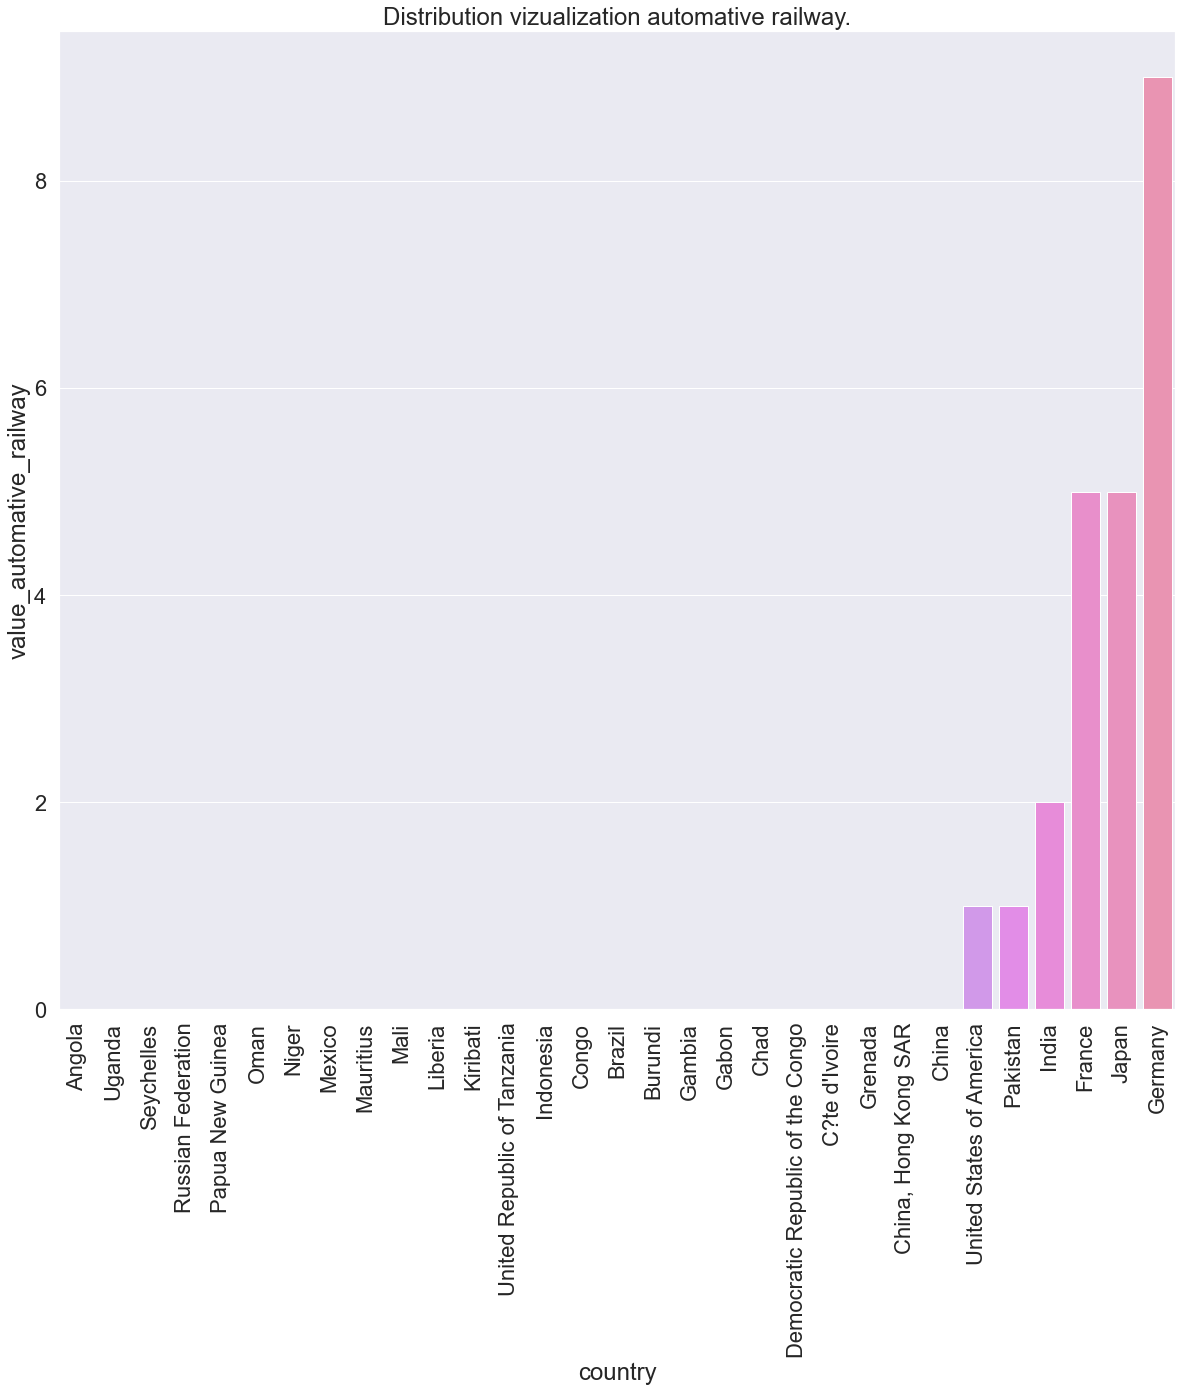

In [163]:

sns.barplot(data =df_perstl.sort_values(by='value_automative_railway', ascending=True), x='country', y='value_automative_railway' ).set( title='Distribution vizualization automative railway.')
plt.xticks(rotation='vertical')

value_automative_railway show only values for highly populated countries, which are the USA, Pakistan, India, France, Japan, and Germany.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Angola'),
  Text(1, 0, 'Uganda'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'Papua New Guinea'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Niger'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Mali'),
  Text(8, 0, 'Liberia'),
  Text(9, 0, 'Kiribati'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'United Republic of Tanzania'),
  Text(12, 0, 'Grenada'),
  Text(13, 0, 'Indonesia'),
  Text(14, 0, 'China, Hong Kong SAR'),
  Text(15, 0, 'Burundi'),
  Text(16, 0, 'Chad'),
  Text(17, 0, 'China'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'Congo'),
  Text(20, 0, 'United States of America'),
  Text(21, 0, "C?te d'Ivoire"),
  Text(22, 0, 'Democratic Republic of the Congo'),
  Text(23, 0, 'France'),
  Text(24, 0, 'Gabon'),
  Text(25, 0, 'Gambia'),
  Text(26, 0, 'Oman'),
  Text(27, 0, 'Mauritius'),
  Text(28, 0, 'Brazil'),
  Text(29, 0, 'Russian Federation'),
  T

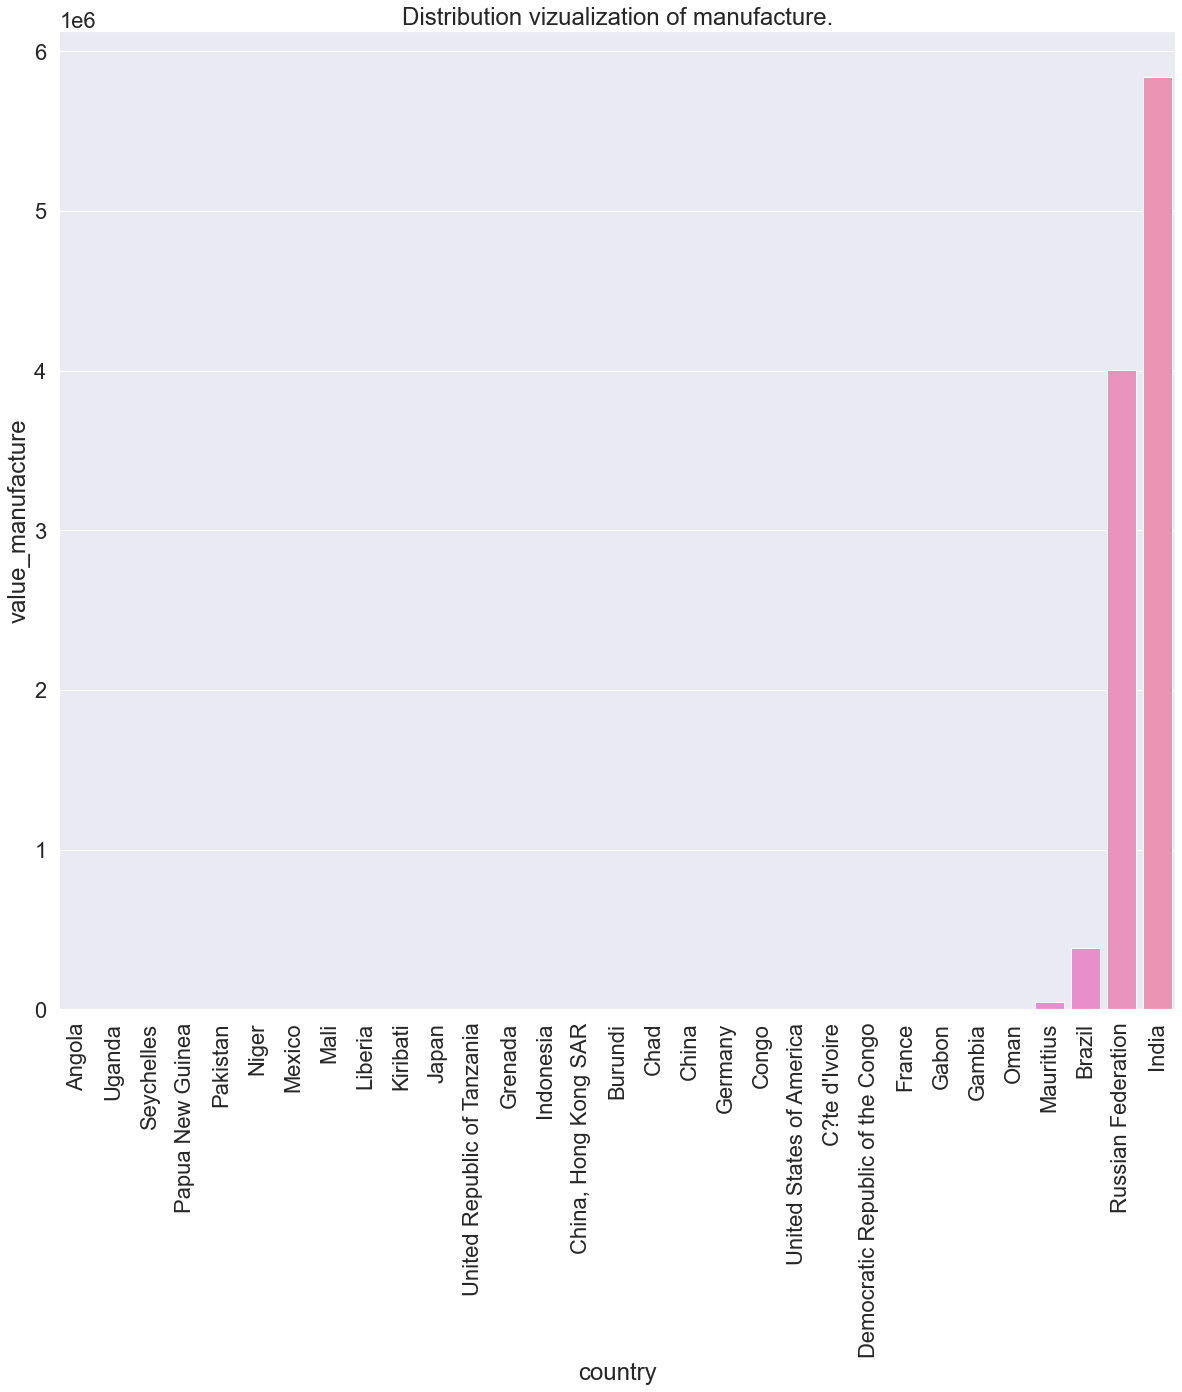

In [164]:
#value here is value_manufacture_rank
sns.barplot(data =df_perstl.sort_values(by='value_manufacture', ascending=True), x='country', y='value_manufacture' ).set( title='Distribution vizualization of manufacture.')
plt.xticks(rotation='vertical')

value_manufacture, this data show only values for Mauritius, Brazil, Russia, and India.

#### Legal

In [165]:
# Remove  null values by replacing it with mean values.
df_perstl = df_perstl.fillna(df_perstl.median())
df_perstl

country     pop_total  pop_trend_%  \
0                             Angola  3.084182e+07     3.294385   
1                             Brazil  2.096800e+08     0.754766   
2                            Burundi  1.118690e+07     3.178508   
3                               Chad  1.549395e+07     3.030107   
4                              China  1.460844e+09     0.428676   
5               China, Hong Kong SAR  7.379436e+06     0.868150   
6                              Congo  5.249381e+06     2.612510   
7                      C?te d'Ivoire  2.509472e+07     2.584866   
8   Democratic Republic of the Congo  8.415479e+07     3.239045   
9                             France  6.699613e+07    -2.690831   
10                             Gabon  2.121173e+06     2.548372   
11                            Gambia  2.282348e+06     2.982456   
12                           Germany  8.320752e+07     0.472788   
13                           Grenada  1.111120e+05     0.900901   
14                             India  1.354008e+09     1.018451   
15                         Indonesia  2.679416e+08     1.103967   
16                             Japan  1.273289e+08    -0.268864   
17                          Kiribati  1.161180e+05     1.724138   
18                           Liberia  4.823937e+06     2.448641   
19                              Mali  1.909766e+07     3.040151   
20                         Mauritius  1.268270e+06     0.236780   
21                            Mexico  1.263186e+08     1.097543   
22                             Niger  2.246631e+07     3.867576   
23                              Oman  4.833975e+06     3.023400   
24                          Pakistan  2.124446e+08     2.043557   
25                  Papua New Guinea  8.614776e+06     1.975366   
26                Russian Federation  1.458799e+08     0.094693   
27                        Seychelles  9.709800e+04     1.030928   
28                            Uganda  4.277327e+07     3.606450   
29       United Republic of Tanzania  5.637100e+07     3.004635   
30          United States of America  3.274251e+08     0.601964   

    value_import_quantity  value_domestic_supply_quantity  \
0                 1466.66                         3554.44   
1                 3060.12                       127573.72   
2                   13.30                          361.08   
3                    3.94                         2769.72   
4                49754.17                       518735.94   
5                 6910.30                         5118.44   
6                  451.28                          773.56   
7                 1245.20                         1989.64   
8                  712.28                         1586.30   
9                14975.04                        66415.44   
10                 313.74                          475.74   
11                 114.10                          394.90   
12               28773.42                        82743.00   
13                  24.72                           32.06   
14                 184.18                       429147.42   
15                1899.20                        61589.56   
16               16828.46                        51205.40   
17                   8.68                          161.70   
18                 153.78                          299.98   
19                 190.06                         3390.02   
20                 507.42                          342.68   
21                9051.96                        56441.36   
22                  38.20                         3409.84   
23                1118.30                         2115.92   
24                  44.40                       123312.94   
25                 260.28                         1668.84   
26                8411.06                       103346.26   
27                 177.42                           48.36   
28                  27.86                         5571.10   
29                  57.68                         7907

In [166]:
df_perstl['value_legal_rank'] = df_perstl.value_ppp_capita.rank() + df_perstl.value_automative_railway.rank() + df_perstl.value_manufacture.rank() + df_perstl.value_energy_adeguacy.rank() - df_perstl.value_instability.rank()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Democratic Republic of the Congo'),
  Text(1, 0, 'Burundi'),
  Text(2, 0, 'Chad'),
  Text(3, 0, 'Niger'),
  Text(4, 0, 'Uganda'),
  Text(5, 0, 'Liberia'),
  Text(6, 0, 'Congo'),
  Text(7, 0, 'Mali'),
  Text(8, 0, 'Pakistan'),
  Text(9, 0, 'Papua New Guinea'),
  Text(10, 0, 'Gambia'),
  Text(11, 0, 'United Republic of Tanzania'),
  Text(12, 0, 'Kiribati'),
  Text(13, 0, 'Grenada'),
  Text(14, 0, 'Angola'),
  Text(15, 0, 'Gabon'),
  Text(16, 0, "C?te d'Ivoire"),
  Text(17, 0, 'Indonesia'),
  Text(18, 0, 'Japan'),
  Text(19, 0, 'Mexico'),
  Text(20, 0, 'Seychelles'),
  Text(21, 0, 'China'),
  Text(22, 0, 'China, Hong Kong SAR'),
  Text(23, 0, 'Mauritius'),
  Text(24, 0, 'Oman'),
  Text(25, 0, 'Brazil'),
  Text(26, 0, 'India'),
  Text(27, 0, 'Russian Federation'),
  Text(28, 0, 'France'),
  Text(29, 0, 'United States of America'),
  Tex

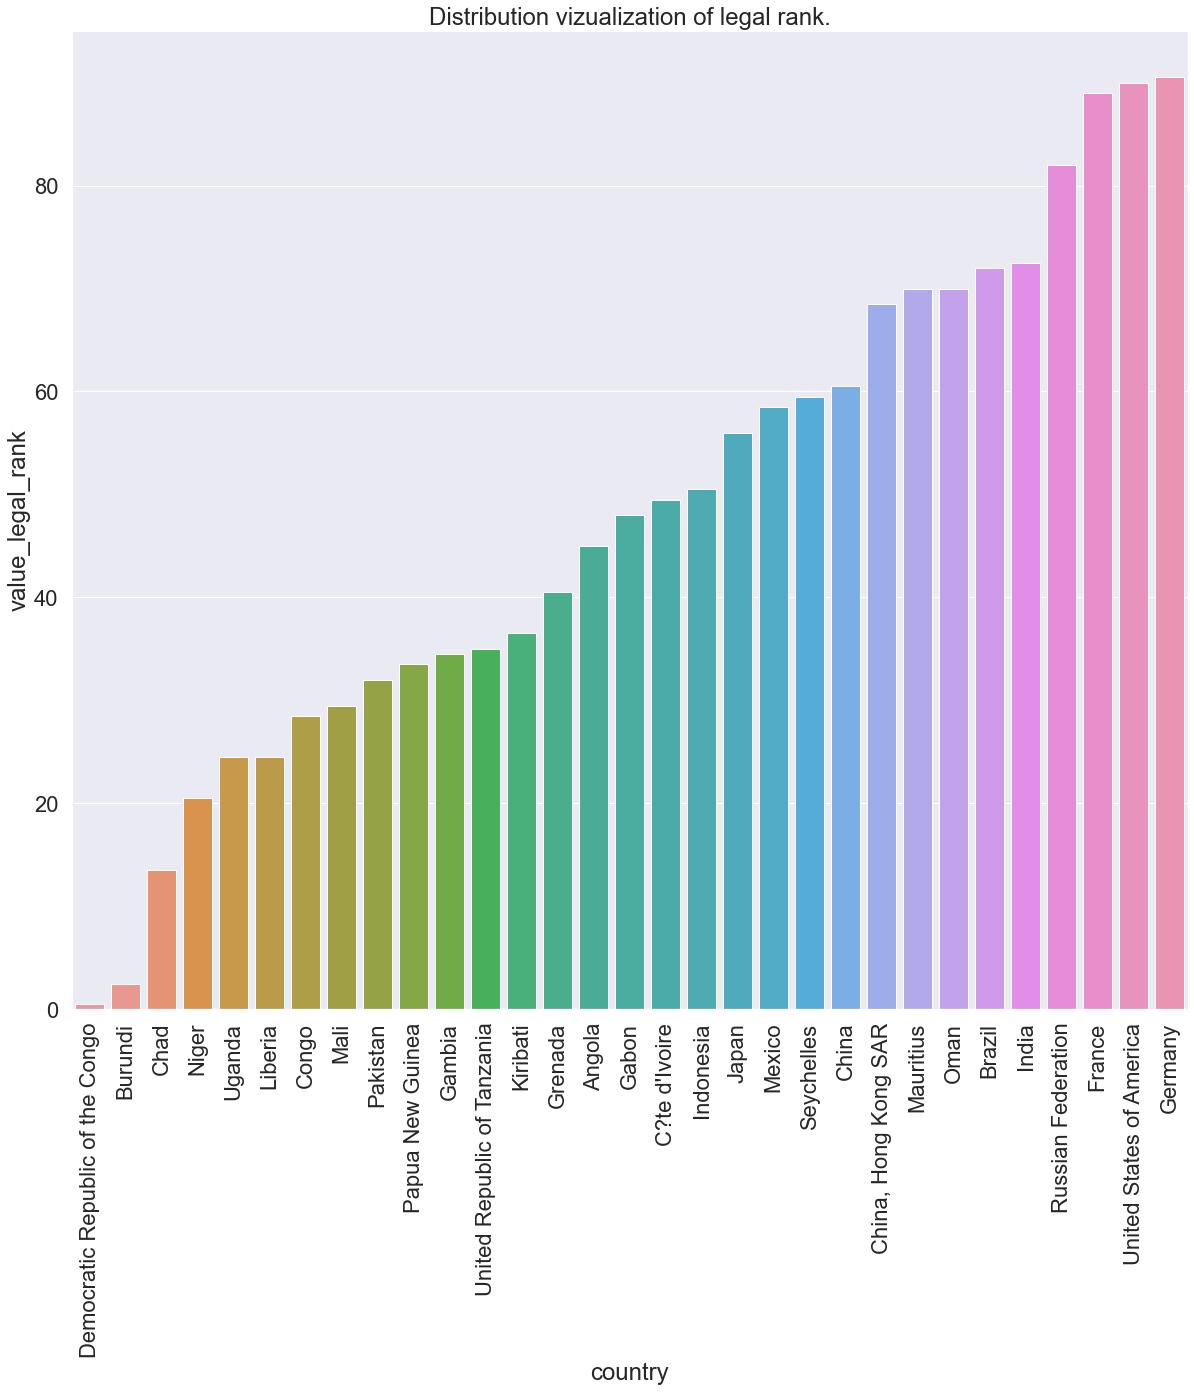

In [167]:
sns.barplot(data =df_perstl.sort_values(by='value_legal_rank', ascending=True), x='country', y='value_legal_rank' ).set( title='Distribution vizualization of legal rank.')
plt.xticks(rotation='vertical')


value_legal_rank is calculated by the sum and difference related to a legal country state. Here we can see countries' values are low, like DR congo to higher than Germany.

In [168]:
df_selected_study = df_macro_indicator[(df_macro_indicator.item ==  'Value Added (Agriculture, Forestry and Fishing)')  & (df_macro_indicator.country.isin(studyCountries))]

df_perstl = mergeExtradata(df_to_study= df_macro_indicator, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Value Added (Agriculture, Forestry and Fishing)')

df_perstl.rename(columns={df_perstl.columns[-1]: 'value_environmental'}, inplace=True)



<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Kiribati'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'China, Hong Kong SAR'),
  Text(4, 0, 'Oman'),
  Text(5, 0, 'Liberia'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Gambia'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States of America'),
  Text(12, 0, 'Brazil'),
  Text(13, 0, 'Congo'),
  Text(14, 0, 'Gabon'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Burundi'),
  Text(18, 0, 'Angola'),
  Text(19, 0, 'Chad'),
  Text(20, 0, 'Niger'),
  Text(21, 0, 'Russian Federation'),
  Text(22, 0, 'Mali'),
  Text(23, 0, "C?te d'Ivoire"),
  Text(24, 0, 'Japan'),
  Text(25, 0, 'Pakistan'),
  Text(26, 0, 'Democratic Republic of the Congo'),
  Text(27, 0, 'Uganda'),
  Text(28, 0, 'India'),
  Text(29, 0, 'United Republic of Tanzania'),
  Text(

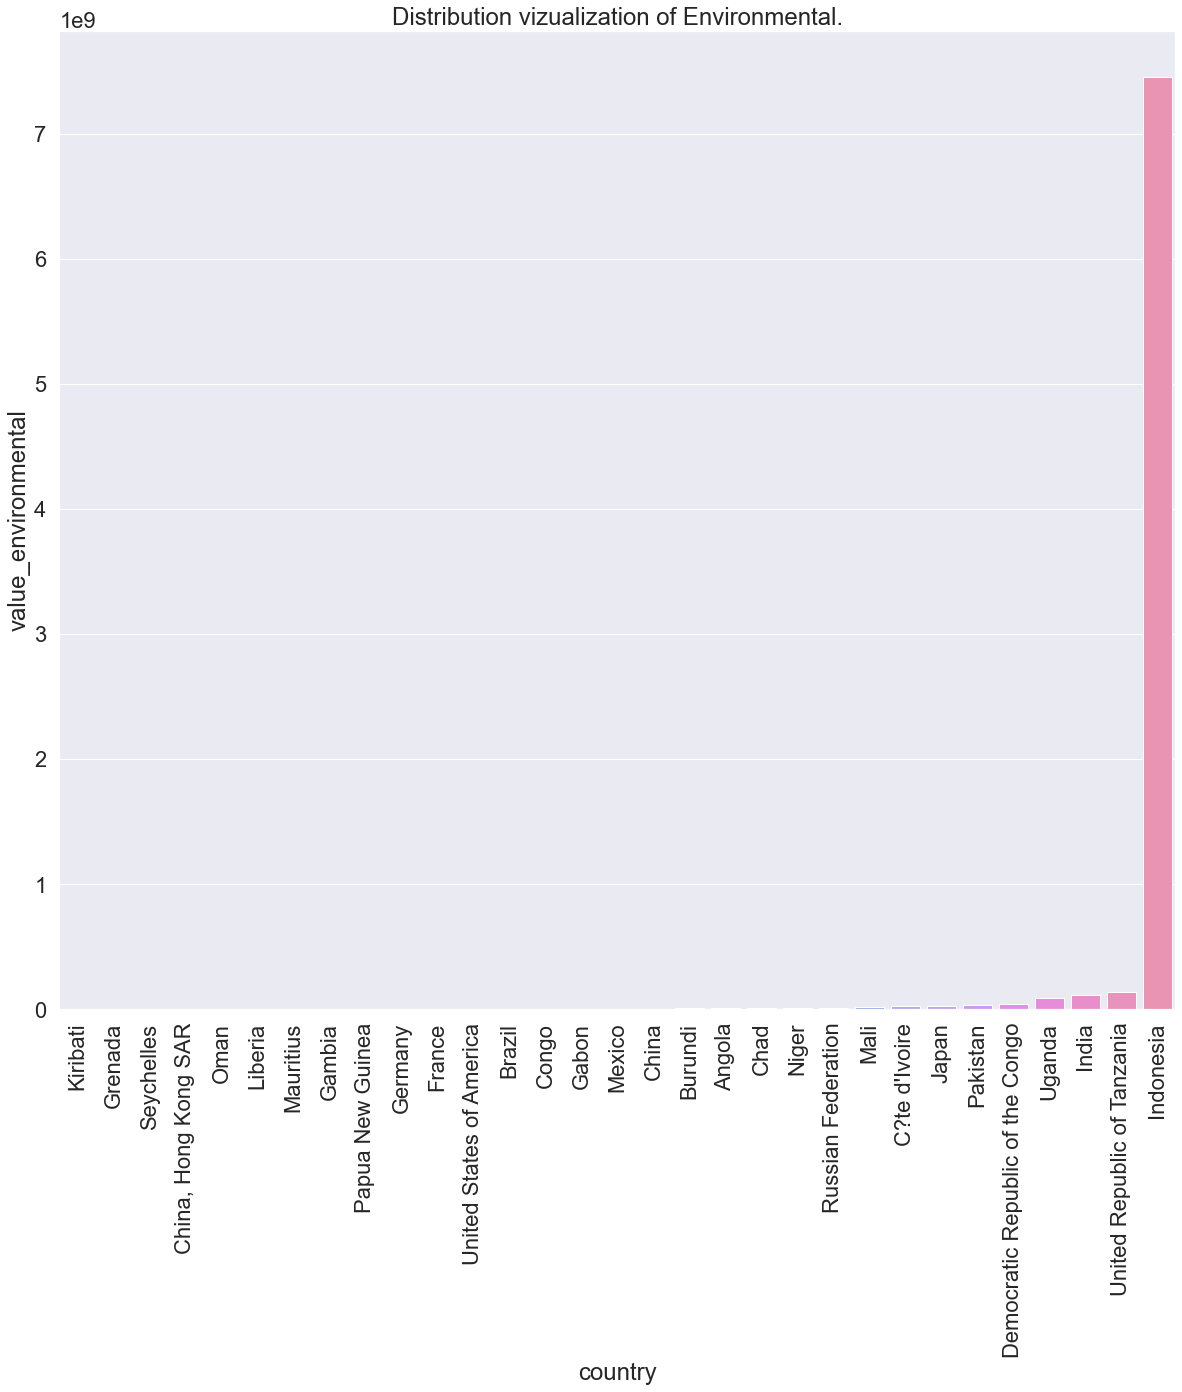

In [169]:
sns.barplot(data =df_perstl.sort_values(by='value_environmental', ascending=True), x='country', y='value_environmental' ).set( title='Distribution vizualization of Environmental.')
plt.xticks(rotation='vertical')


There are also here not enough values to be considered.

In [170]:
df_perstl = mergeExtradata(df_to_study= df_producer_prices, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Eggs, hen, in shell')

<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Kiribati'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'China, Hong Kong SAR'),
  Text(4, 0, 'Oman'),
  Text(5, 0, 'Liberia'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Gambia'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States of America'),
  Text(12, 0, 'Brazil'),
  Text(13, 0, 'Congo'),
  Text(14, 0, 'Gabon'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Burundi'),
  Text(18, 0, 'Angola'),
  Text(19, 0, 'Chad'),
  Text(20, 0, 'Niger'),
  Text(21, 0, 'Russian Federation'),
  Text(22, 0, 'Mali'),
  Text(23, 0, "C?te d'Ivoire"),
  Text(24, 0, 'Japan'),
  Text(25, 0, 'Pakistan'),
  Text(26, 0, 'Democratic Republic of the Congo'),
  Text(27, 0, 'Uganda'),
  Text(28, 0, 'India'),
  Text(29, 0, 'United Republic of Tanzania'),
  Text(

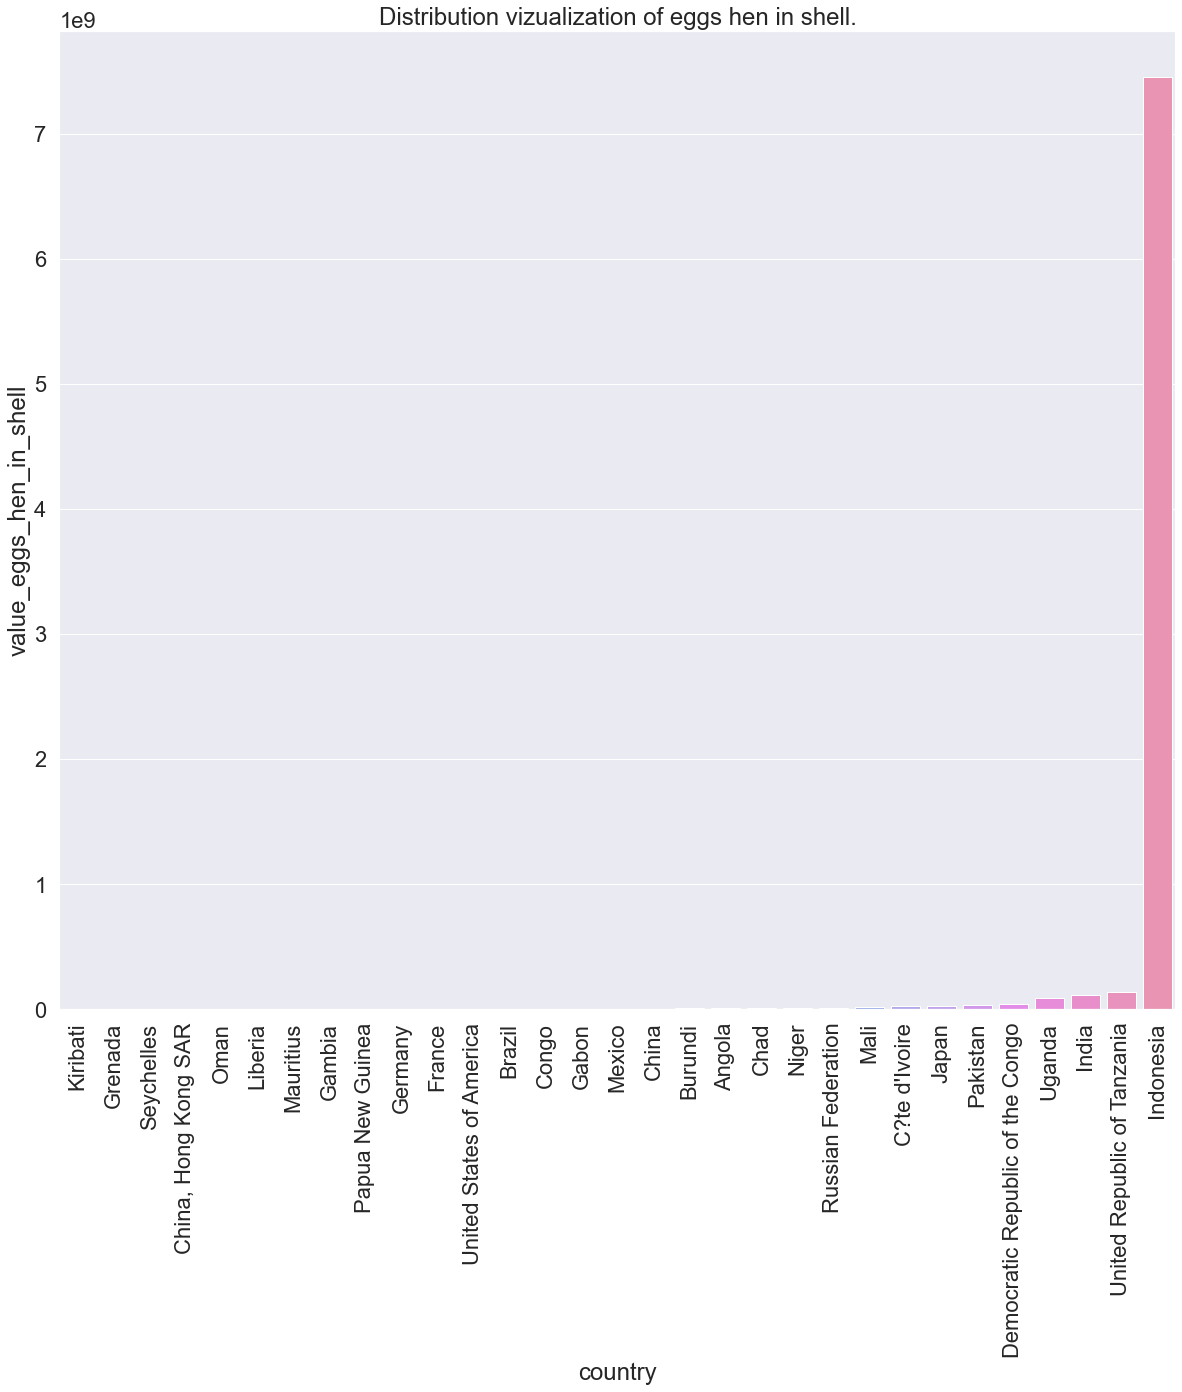

In [171]:
sns.barplot(data =df_perstl.sort_values(by='value_eggs_hen_in_shell', ascending=True), x='country', y='value_eggs_hen_in_shell' ).set( title='Distribution vizualization of eggs hen in shell.')
plt.xticks(rotation='vertical')


In [172]:
df_perstl = mergeExtradata(df_to_study= df_producer_prices, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Eggs Primary')

<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Kiribati'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'China, Hong Kong SAR'),
  Text(4, 0, 'Oman'),
  Text(5, 0, 'Liberia'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Gambia'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States of America'),
  Text(12, 0, 'Brazil'),
  Text(13, 0, 'Congo'),
  Text(14, 0, 'Gabon'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Burundi'),
  Text(18, 0, 'Angola'),
  Text(19, 0, 'Chad'),
  Text(20, 0, 'Niger'),
  Text(21, 0, 'Russian Federation'),
  Text(22, 0, 'Mali'),
  Text(23, 0, "C?te d'Ivoire"),
  Text(24, 0, 'Japan'),
  Text(25, 0, 'Pakistan'),
  Text(26, 0, 'Democratic Republic of the Congo'),
  Text(27, 0, 'Uganda'),
  Text(28, 0, 'India'),
  Text(29, 0, 'United Republic of Tanzania'),
  Text(

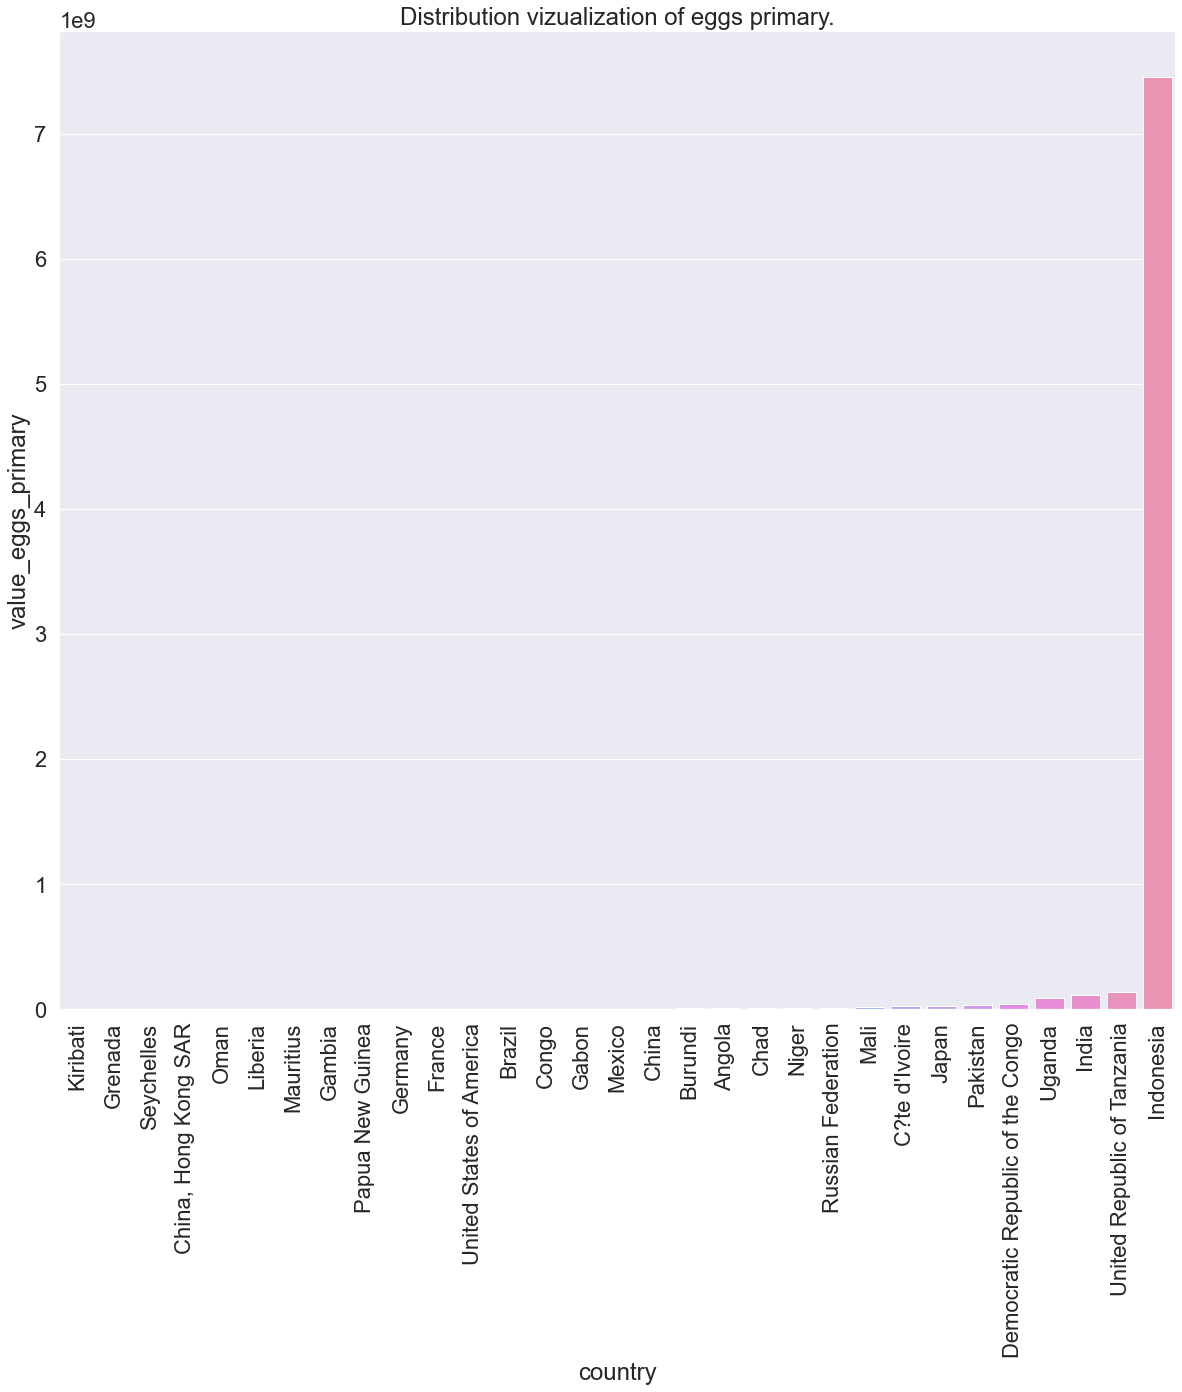

In [173]:
sns.barplot(data =df_perstl.sort_values(by='value_eggs_primary', ascending=True), x='country', y='value_eggs_primary' ).set( title='Distribution vizualization of eggs primary.')
plt.xticks(rotation='vertical')


In [174]:
df_perstl = mergeExtradata(df_to_study= df_producer_prices, df_perstl=df_perstl, df_selected_study=df_selected_study, column='Eggs, other bird, in shell')

<ipython-input-145-6785e6f5f094>:6: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_perstl = pd.merge(df_perstl, df_selected_study, on='country', how='left', suffixes=('_' + column) )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Kiribati'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Seychelles'),
  Text(3, 0, 'China, Hong Kong SAR'),
  Text(4, 0, 'Oman'),
  Text(5, 0, 'Liberia'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Gambia'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'France'),
  Text(11, 0, 'United States of America'),
  Text(12, 0, 'Brazil'),
  Text(13, 0, 'Congo'),
  Text(14, 0, 'Gabon'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Burundi'),
  Text(18, 0, 'Angola'),
  Text(19, 0, 'Chad'),
  Text(20, 0, 'Niger'),
  Text(21, 0, 'Russian Federation'),
  Text(22, 0, 'Mali'),
  Text(23, 0, "C?te d'Ivoire"),
  Text(24, 0, 'Japan'),
  Text(25, 0, 'Pakistan'),
  Text(26, 0, 'Democratic Republic of the Congo'),
  Text(27, 0, 'Uganda'),
  Text(28, 0, 'India'),
  Text(29, 0, 'United Republic of Tanzania'),
  Text(

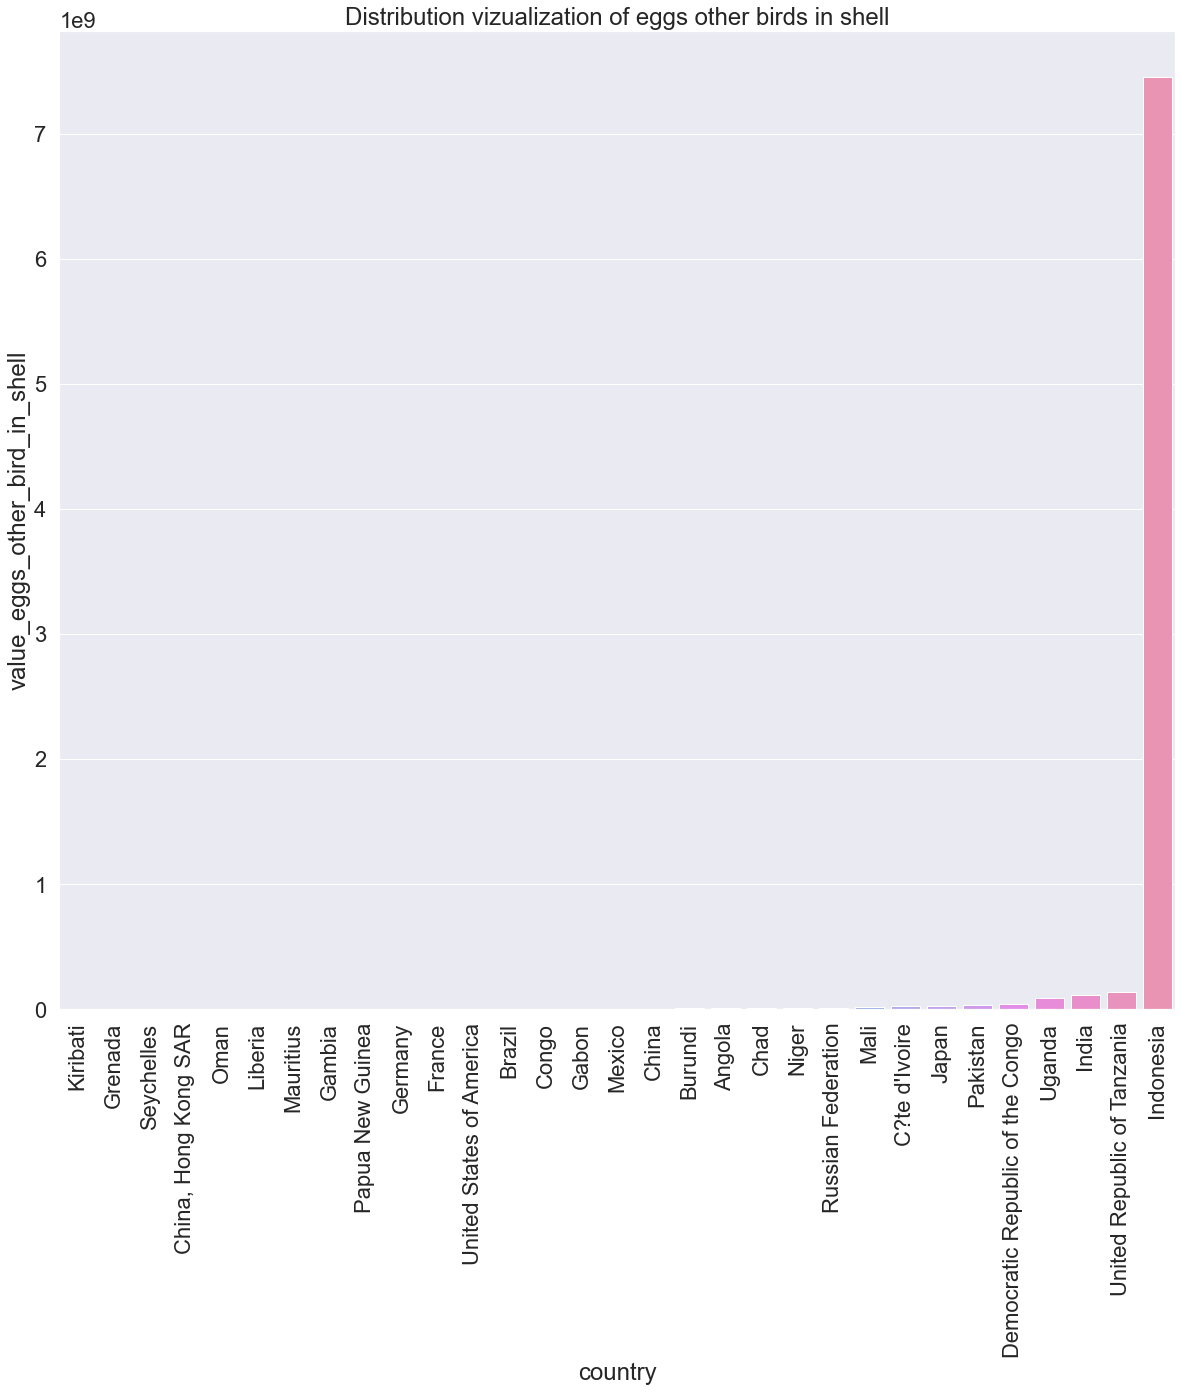

In [175]:
sns.barplot(data =df_perstl.sort_values(by='value_eggs_other_bird_in_shell', ascending=True), x='country', y='value_eggs_other_bird_in_shell' ).set( title='Distribution vizualization of eggs other birds in shell')
plt.xticks(rotation='vertical')


Here I add more relevant variables to the study data frame eggs values with their countries.

This then the final PERSTL data set that will then be analyse more with advance algoritims unsupervise machine learning to find more hidden insights on our data set!

## 4) Statistical test of data distribution.

**Testing if the given data belongs to a Gaussian "Normal" distribution!**

**Here I am carrying on a statistical test of all Variables created so far.**

Had the ALPHA value been defined as 0.05, the hypothesis is "H0: {Variable} is Normal distribution!" In the other case, if it is less than the ALPHA value, "H1: {Variable} is not a Normal distribution!"

In [176]:
# defining the Shapiro test function that will create a dictionary and be used to display a data frame of results
def normal_shapiro_test( df: DataFrame, column = ""):
    tested = stats.shapiro(df_perstl[column])
    return {"variable": column, "statistic": tested.statistic, "pvalue": tested.pvalue, 
    "hypothesis": "H0: {} is Normal distribution!".format(column) if tested.pvalue > 0.05 else "H1: {} is not a Normal distribution!".format(column) }

In [177]:
pd.DataFrame(list(map(lambda c: normal_shapiro_test(df_perstl, c), df_perstl.columns[1:19])))

variable  statistic        pvalue  \
0                                      pop_total   0.460685  1.441060e-09   
1                                    pop_trend_%   0.920769  2.474370e-02   
2                          value_import_quantity   0.566768  2.074714e-08   
3                 value_domestic_supply_quantity   0.561375  1.794151e-08   
4   value_protein_supply_quantity_(g/capita/day)   0.949673  1.529009e-01   
5                              value_instability   0.582507  3.191961e-08   
6                          value_energy_adeguacy   0.749331  6.784003e-06   
7                    value_gross_national_income   0.462644  1.508831e-09   
8                   value_gross_domestic_product   0.462422  1.500990e-09   
9                               value_ppp_capita   0.796582  4.464826e-05   
10                              value_sanitation   0.793656  3.947397e-05   
11                      value_automative_railway   0.436754  8.293304e-10   
12                             value_manufacture   0.293260  4.060359e-11   
13                              value_legal_rank   0.971371  5.575469e-01   
14                           value_environmental   0.189723  5.942373e-12   
15                       value_eggs_hen_in_shell   0.189723  5.942373e-12   
16                            value_eggs_primary   0.189723  5.942373e-12   
17                value_eggs_other_bird_in_shell   0.189723  5.942373e-12   

                                           hypothesis  
0         H1: pop_total is not a Normal distribution!  
1       H1: pop_trend_% is not a Normal distribution!  
2   H1: value_import_quantity is not a Normal dist...  
3   H1: value_domestic_supply_quantity is not a No...  
4   H0: value_protein_supply_quantity_(g/capita/da...  
5   H1: value_instability is not a Normal distribu...  
6   H1: value_energy_adeguacy is not a Normal dist...  
7   H1: value_gross_national_income is not a Norma...  
8   H1: value_gross_domestic_product is not a Norm...  
9   H1: value_ppp_capita is not a Normal distribut...  
10  H1: value_sanitation is not a Normal distribut...  
11  H1: value_automative_railway is not a Normal d...  
12  H1: value_manufacture is not a Normal distribu...  
13       H0: value_legal_rank is Normal distribution!  
14  H1: value_environmental is not a Normal distri...  
15  H1: value_eggs_hen_in_shell is not a Normal di...  
16  H1: value_eggs_primary is not a Normal distrib...  
17  H1: value_eggs_other_bird_in_shell is not a No...

The Shapiro shows that most of our variable is not normally distributed, In any case, to continue our analysis, I will perform a normalization or standardization later.

# Dimentionality reduction using PCA

**Creating the Reduction of 2 dimensions or using the reduction of components to .95 to have the optimal reduction of all dimensions using PCA**

In [178]:
# Standardize the data and create the scaler variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_perstl[df_perstl.columns[1:]])
X_scaled

array([[-0.35715819,  1.09060262, -0.36539313, -0.47937108, -0.83763808,
        -0.54592083,  0.        , -0.39373495, -0.39282785, -0.52278199,
        -0.82355406, -0.37720127, -0.2695448 , -0.122613  , -0.19048887,
        -0.19048887, -0.19048887, -0.19048887],
       [ 0.16801231, -0.68809781, -0.21568283,  0.50562832,  0.94648033,
        -0.54592083,  0.68149905, -0.00841584,  0.00580418, -0.09652962,
         0.57953805, -0.37720127,  0.04383933,  0.980904  , -0.1952444 ,
        -0.1952444 , -0.1952444 , -0.1952444 ],
       [-0.4148762 ,  1.00944446, -0.50194062, -0.50473373, -1.4553975 ,
         0.99258333, -4.39188275, -0.41235187, -0.41308832, -0.86290216,
        -0.82355406, -0.37720127, -0.2695448 , -1.85963049, -0.19083394,
        -0.19083394, -0.19083394, -0.19083394],
       [-0.40222827,  0.90550762, -0.50282002, -0.48560357, -0.34142194,
         0.99258333, -0.41647164, -0.41054529, -0.41122699, -0.81798999,
        -0.54903604, -0.37720127, -0.2695448 , -1.410

In [179]:
# add the variable to a cluster dataframe.
x_clustered = pd.DataFrame(X_scaled, index= df_perstl.index, columns= df_perstl.columns[1:])

x_clustered.head()

pop_total  pop_trend_%  value_import_quantity  \
0  -0.357158     1.090603              -0.365393   
1   0.168012    -0.688098              -0.215683   
2  -0.414876     1.009444              -0.501941   
3  -0.402228     0.905508              -0.502820   
4   3.842139    -0.916485               4.171362   

   value_domestic_supply_quantity  \
0                       -0.479371   
1                        0.505628   
2                       -0.504734   
3                       -0.485604   
4                        3.612359   

   value_protein_supply_quantity_(g/capita/day)  value_instability  \
0                                     -0.837638          -0.545921   
1                                      0.946480          -0.545921   
2                                     -1.455397           0.992583   
3                                     -0.341422           0.992583   
4                                      0.309776          -0.545921   

   value_energy_adeguacy  value_gross_national_income  \
0               0.000000                    -0.393735   
1               0.681499                    -0.008416   
2              -4.391883                    -0.412352   
3              -0.416472                    -0.410545   
4               0.757221                     2.817707   

   value_gross_domestic_product  value_ppp_capita  value_sanitation  \
0                     -0.392828         -0.522782         -0.823554   
1                      0.005804         -0.096530          0.579538   
2                     -0.413088         -0.862902         -0.823554   
3                     -0.411227         -0.817990         -0.549036   
4                      2.853833         -0.049303          1.128574   

   value_automative_railway  value_manufacture  value_legal_rank  \
0                 -0.377201          -0.269545         -0.122613   
1                 -0.377201           0.043839          0.980904   
2                 -0.377201          -0.269545         -1.859630   
3                 -0.377201          -0.269545         -1.410049   
4                 -0.377201          -0.269545          0.510887   

   value_environmental  value_eggs_hen_in_shell  value_eggs_primary  \
0            -0.190489                -0.190489           -0.190489   
1            -0.195244                -0.195244           -0.195244   
2            -0.190834                -0.190834           -0.190834   
3            -0.189221                -0.189221           -0.189221   
4            -0.193160                -0.193160           -0.193160   

   value_eggs_other_bird_in_shell  
0                       -0.190489  
1                       -0.195244  
2                       -0.190834  
3                       -0.189221  
4                       -0.193160

**Lets use the anderson_ksamp test to check if value_legal_rank and value_protein_supply_quantity_(g/capita/day) come from a similiar distributions.**


In [186]:
# check if two variables are from a normal distribution.
stats.anderson_ksamp([x_clustered.value_legal_rank, x_clustered['value_protein_supply_quantity_(g/capita/day)']])

<ipython-input-186-03e2151b4366>:2: UserWarning: p-value capped: true value larger than 0.25
  stats.anderson_ksamp([x_clustered.value_legal_rank, x_clustered['value_protein_supply_quantity_(g/capita/day)']])


Anderson_ksampResult(statistic=-0.9414511347118829, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

Now they both belongs from the same distribution.

In [181]:
x_clustered['value_protein_supply_quantity_(g/capita/day)']

0    -0.837638
1     0.946480
2    -1.455397
3    -0.341422
4     0.309776
5     2.770428
6    -0.390496
7    -0.912732
8    -1.426067
9     1.363722
10    0.203069
11   -0.717807
12    1.327772
13    0.354171
14   -0.860007
15   -0.455433
16    0.660711
17    0.052082
18   -1.083007
19   -0.752158
20    0.303842
21    0.469894
22   -1.093963
23    0.321531
24   -0.261991
25    0.069314
26    0.962001
27    0.748587
28   -1.091110
29   -1.050139
30    1.865987
Name: value_protein_supply_quantity_(g/capita/day), dtype: float64

As the results show here, the p-value is above the alpha, suggesting that the p-value can't reject the H0.

The 2 observations might be coming from a normal distribution.

**Creating the PCA and the reduced variable**


In [187]:
pca = PCA(n_components = X_scaled.shape[1])
pca.fit(X_scaled)
x_reducer = pca.transform(X_scaled)

**Checking the number of components created by the PCA**

In [188]:
# number of components created from PCA n_components are 18
pca.n_components_

18

**Checking the ratio of the variance**

In [189]:
pca.explained_variance_ratio_

array([3.77128407e-01, 2.26333242e-01, 1.33662762e-01, 8.08548609e-02,
       5.83225391e-02, 3.99484869e-02, 2.94321313e-02, 2.09979676e-02,
       1.33859499e-02, 9.58386701e-03, 4.74317075e-03, 3.04564253e-03,
       2.29272990e-03, 2.68057556e-04, 1.84917600e-07, 6.65284300e-35,
       0.00000000e+00, 0.00000000e+00])

#### Scree plot, What are the number of component that is relavante to our PCA?

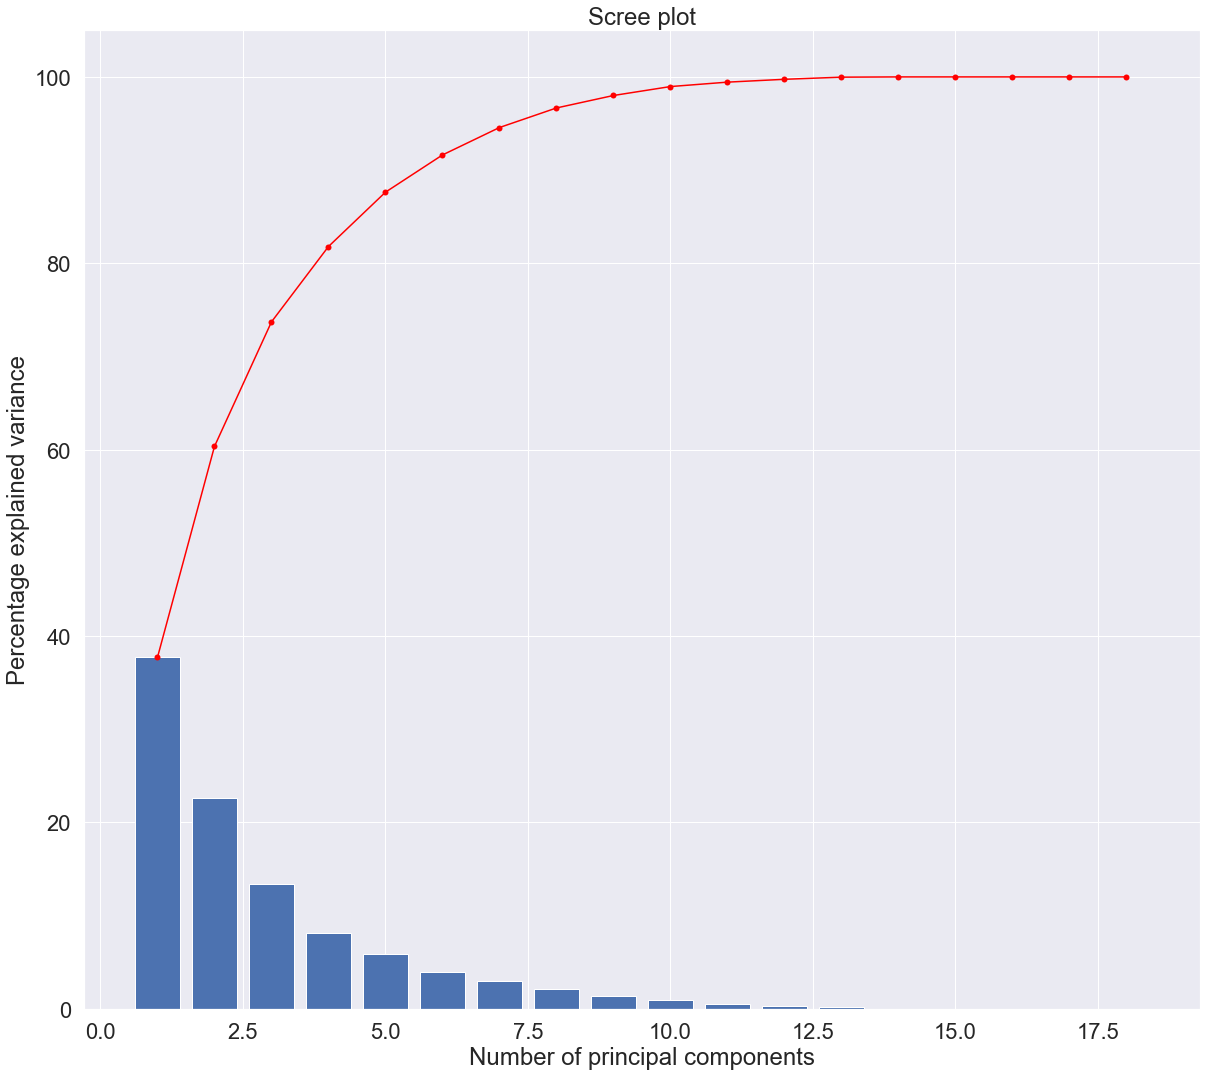

In [190]:

display_scree_plot(pca)

What is the minimum amount of components that can explain most of our data set, and which one of them are they?

This question is a clear answer here in this screed plot. As you can see, with only 1 and 2 components, we can explain more than 50% of our data set.

From the PC1-PC11, we can represent almost 99% of the total data set, reducing so 18 PCS to only 5, 10 less.

In [191]:
# Checking the varioance percentage.
round(sum(pca.explained_variance_ratio_[0:11]), 2)

0.99

Here is the total percentage of the variance of the six components, around 88%.

In [192]:
round(sum(pca.explained_variance_ratio_[0:5]), 2)

0.88

**Using a bar chart to visualize the amount of PCA explanation of the Dataset**

[Text(0.5, 1.0, 'variance ration vizualization of PCS')]

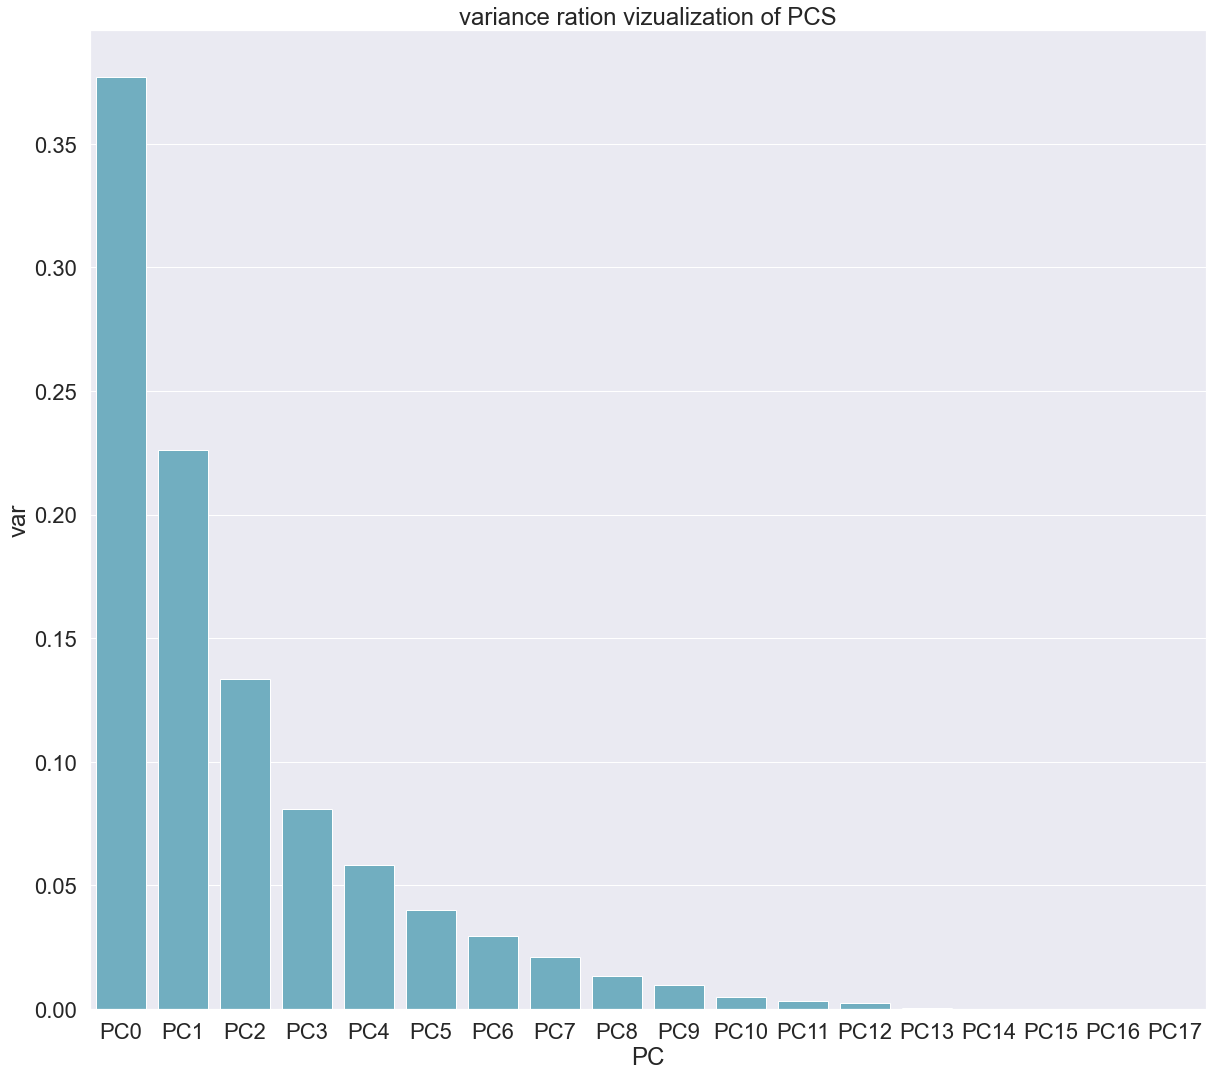

In [193]:
pc_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC' + str(i) for i in range(0, pca.n_components)]})
sns.barplot(x='PC',y="var", 
           data=pc_df, color="c").set( title='variance ration vizualization of PCS')

#### Factorial plane of PCA

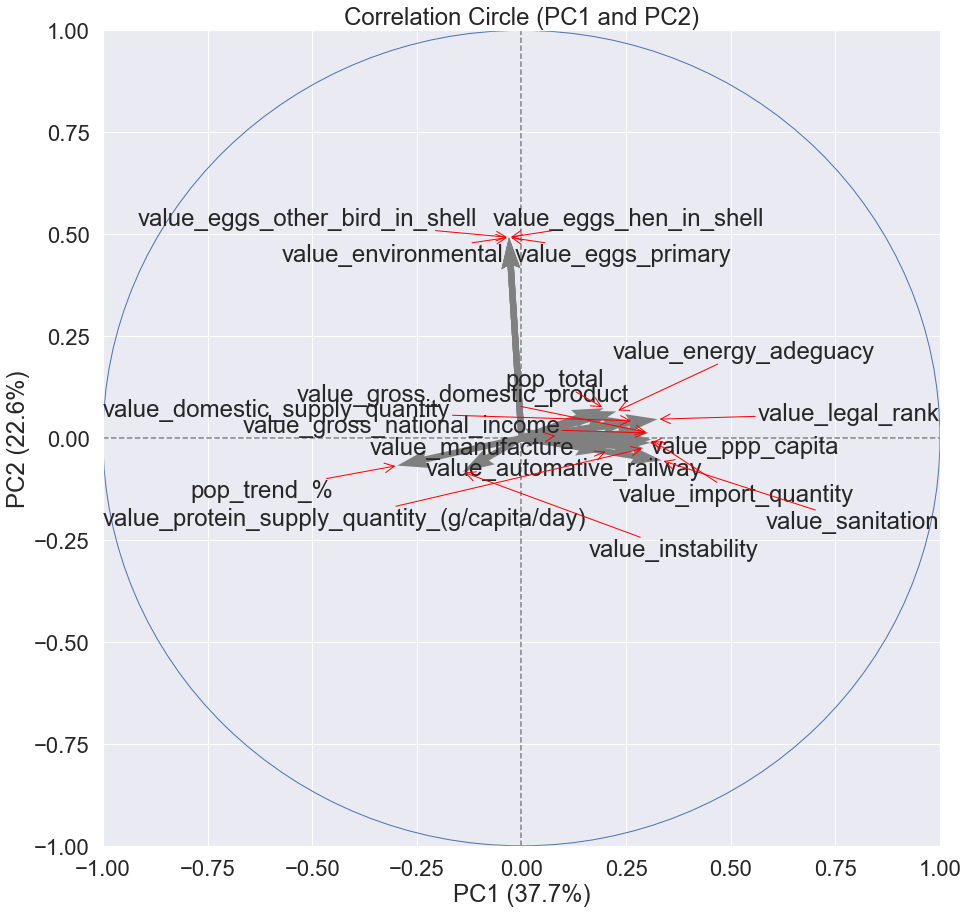

In [194]:

display_circles(pca.components_, pca.n_components, pca, [(0,1)], labels = df_perstl.columns[1:], figsize=(15,15))

On this Circular factorial Map, we can visualize the influence of 2 components 1-2; this component can explain 60,3 percent of the data set in consideration; This is the highest value that can be plotted here according to the preview screed plot.

Some variables are influenced by PC1 instead of PC2, like protein supply quantity, population per capita, and value energy adequacy instead of pop total, domestic supply quantity, and import quantity.

The direction also of the arrows also gives us a hint about the amount of correlation between these variables. For example, on PC1, most variables, such as energy adequacy and legal value, are highly correlated. Legal and environmental values are slightly less so but still significantly correlated.

Another insight to observe here is how the two components are negatively correlated; this is clear by the arrows pointing in the opposite direction, like value population per capita on PC1 and legal rank and instability; this makes sense as legal, and instability in a country can't be the same.

The other extra add variables, like eggs primary and eggs other birds in the shell, are influenced by PC1, but PC2 had a strong influence on eggs hen shell; it is also relatively uncorrelated to the other mentioned variables in PC1.

**A second look to other components**

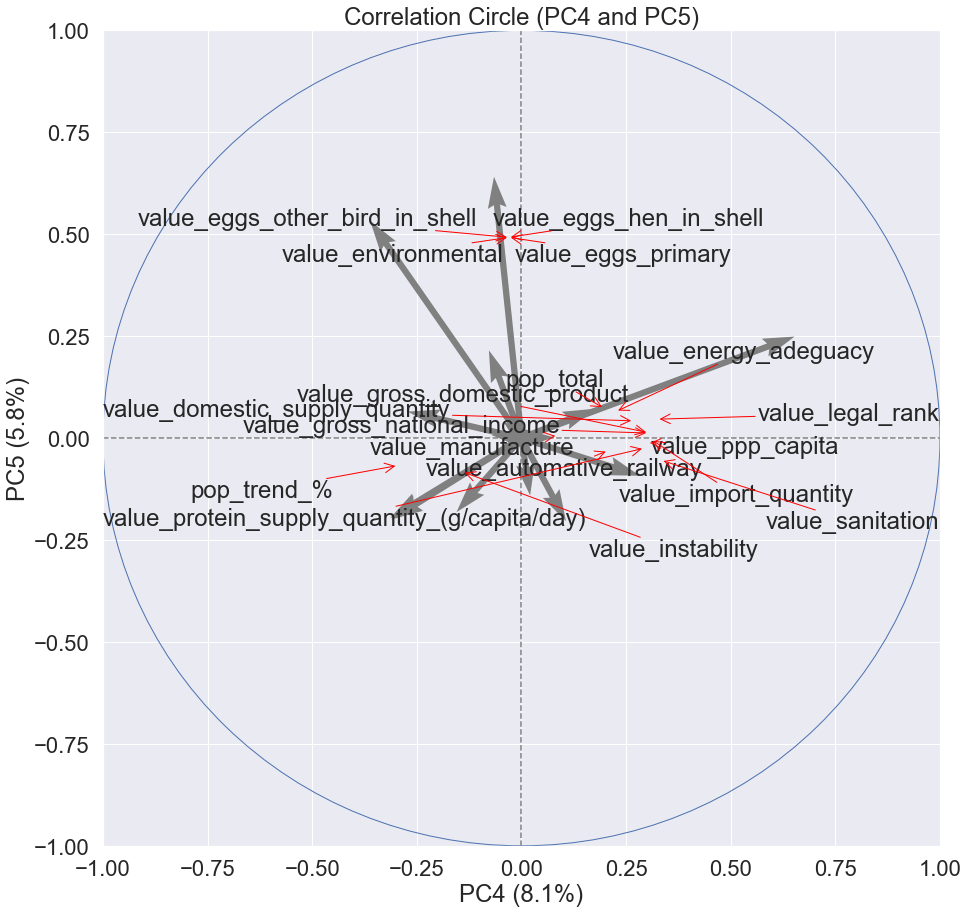

In [195]:

display_circles(pca.components_, pca.n_components, pca, [(3,4)], labels = df_perstl.columns[1:], figsize=(15,15))

Once again, I plot the circular factorial map with the two least percentage explanation values of our 4,5 components that, as already noticed by the screed plot, can explain a total of 13,9% of this data set.

The main insight here is that the less explanatory power these components have, the less correlated their variables are; in fact, more plotted pcs are negatively correlated!

*Visualizing the calculated 18 components to see how they are clustered.*

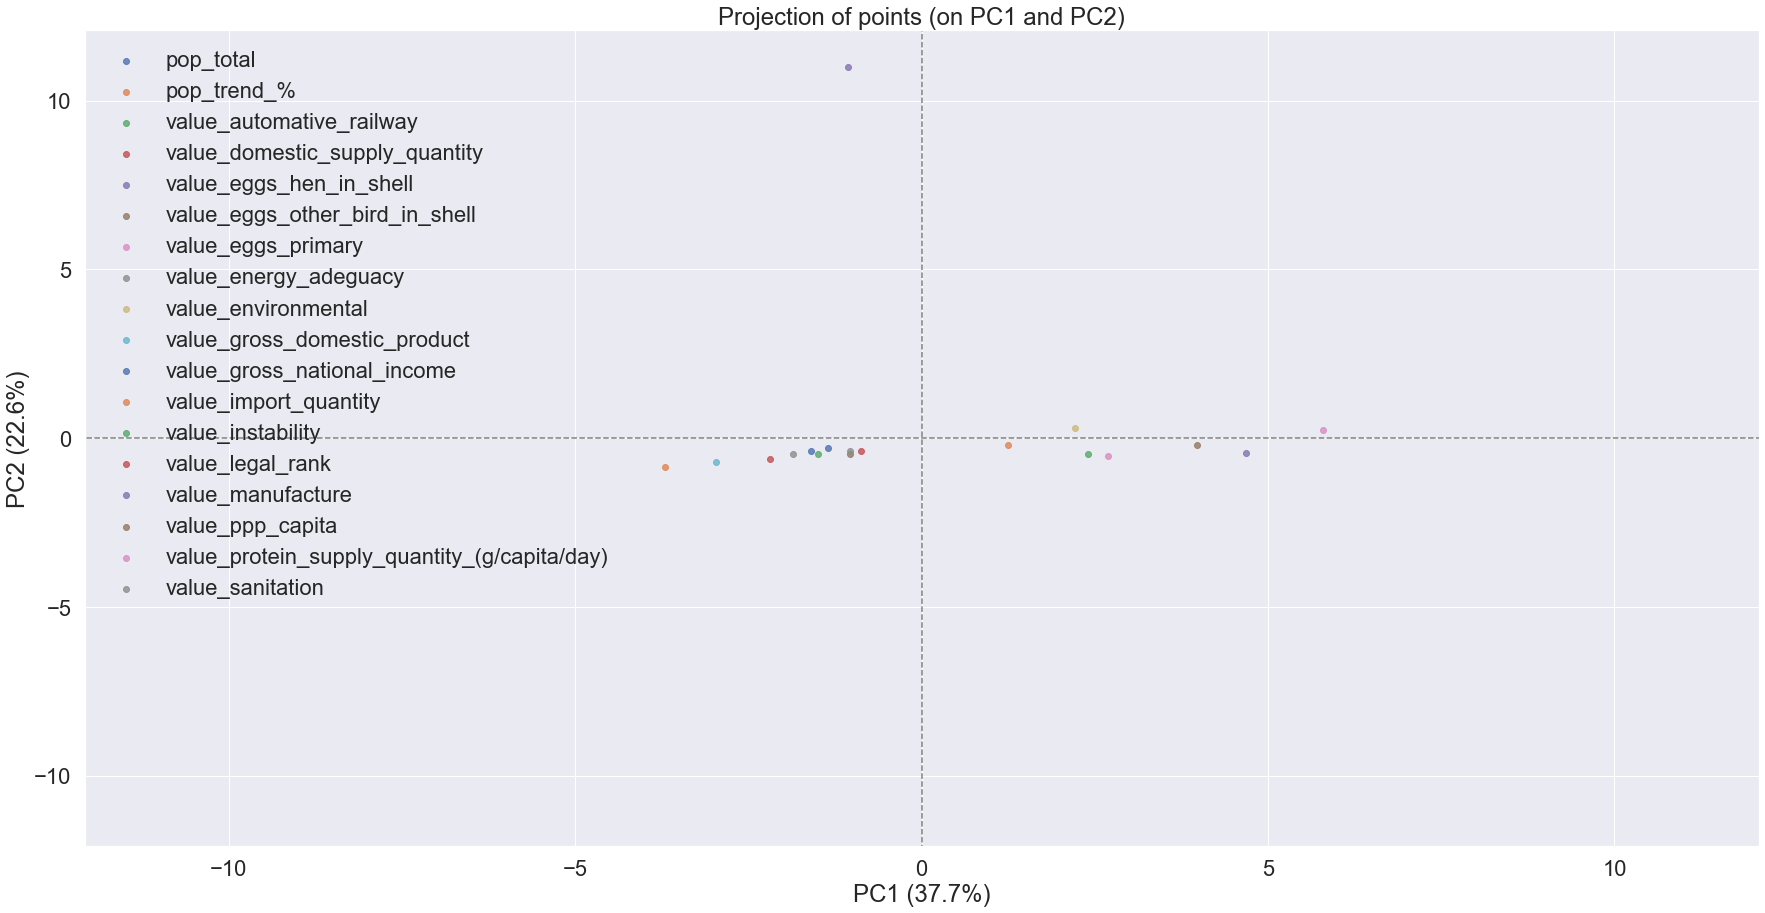

In [196]:

display_factorial_planes(x_reducer, pca.n_components, pca, [(0,1)], illustrative_var=df_perstl.columns[1:], alpha=0.8,figsize=(30,15))


Need to be clarified what this plot is showing.



Checking the maximum number of clusters that can improve our data from 6 to 12 looks good. After that, there seems not to be significant.

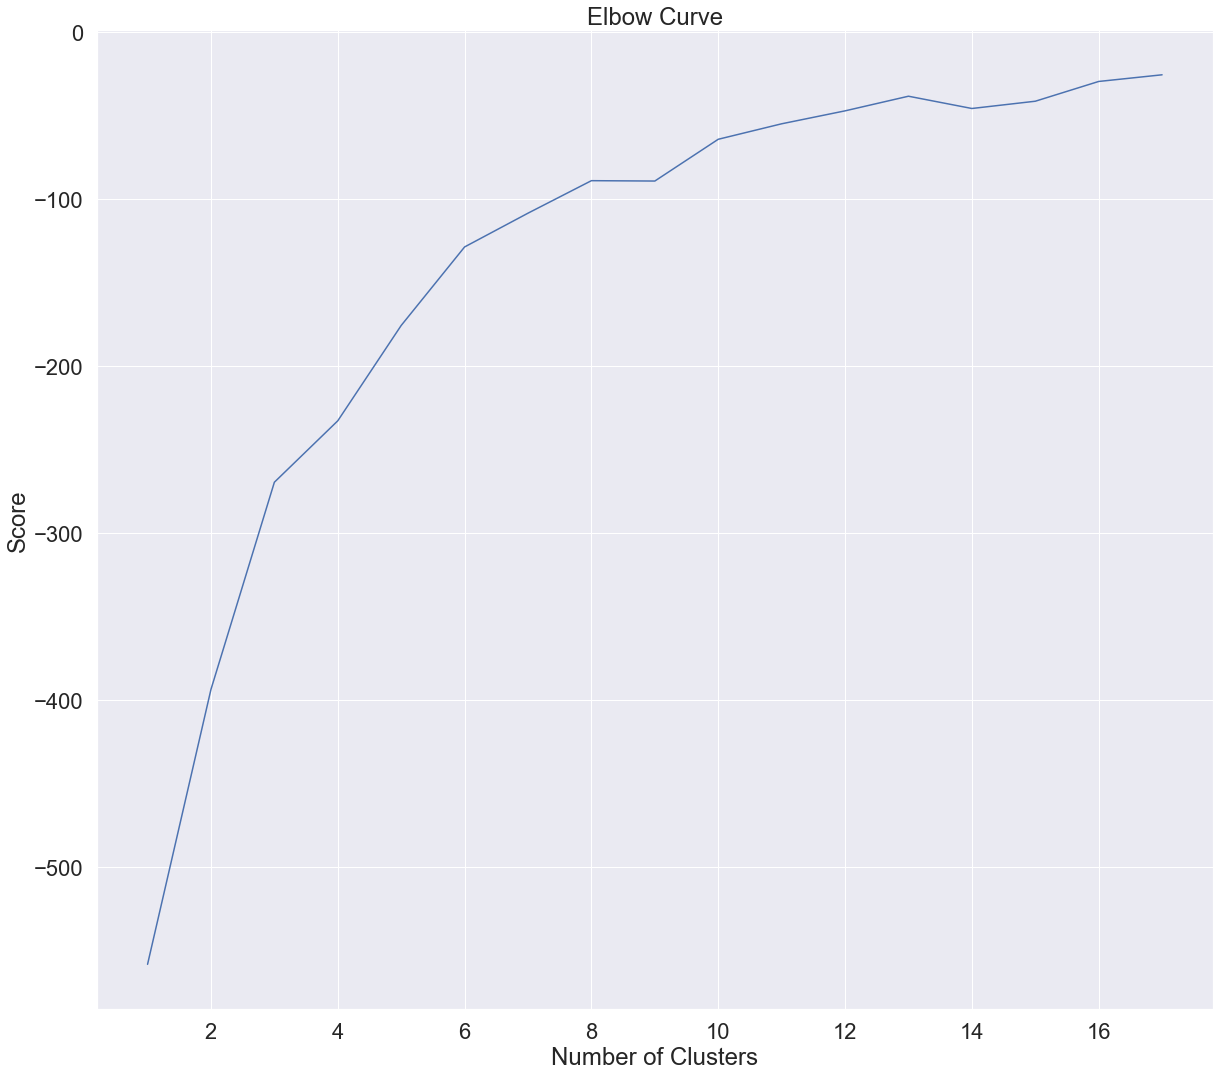

In [197]:

kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, pca.n_components)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, pca.n_components_),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Creating the K-means cluster model, fitting the model, and predicting where the data point is in the cluster.**

In [198]:
# Create a k-means clustering model with 4, to 8 clusters
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

#### Validating the optimal number of cluster using other metrics

**Silhouette Metric**

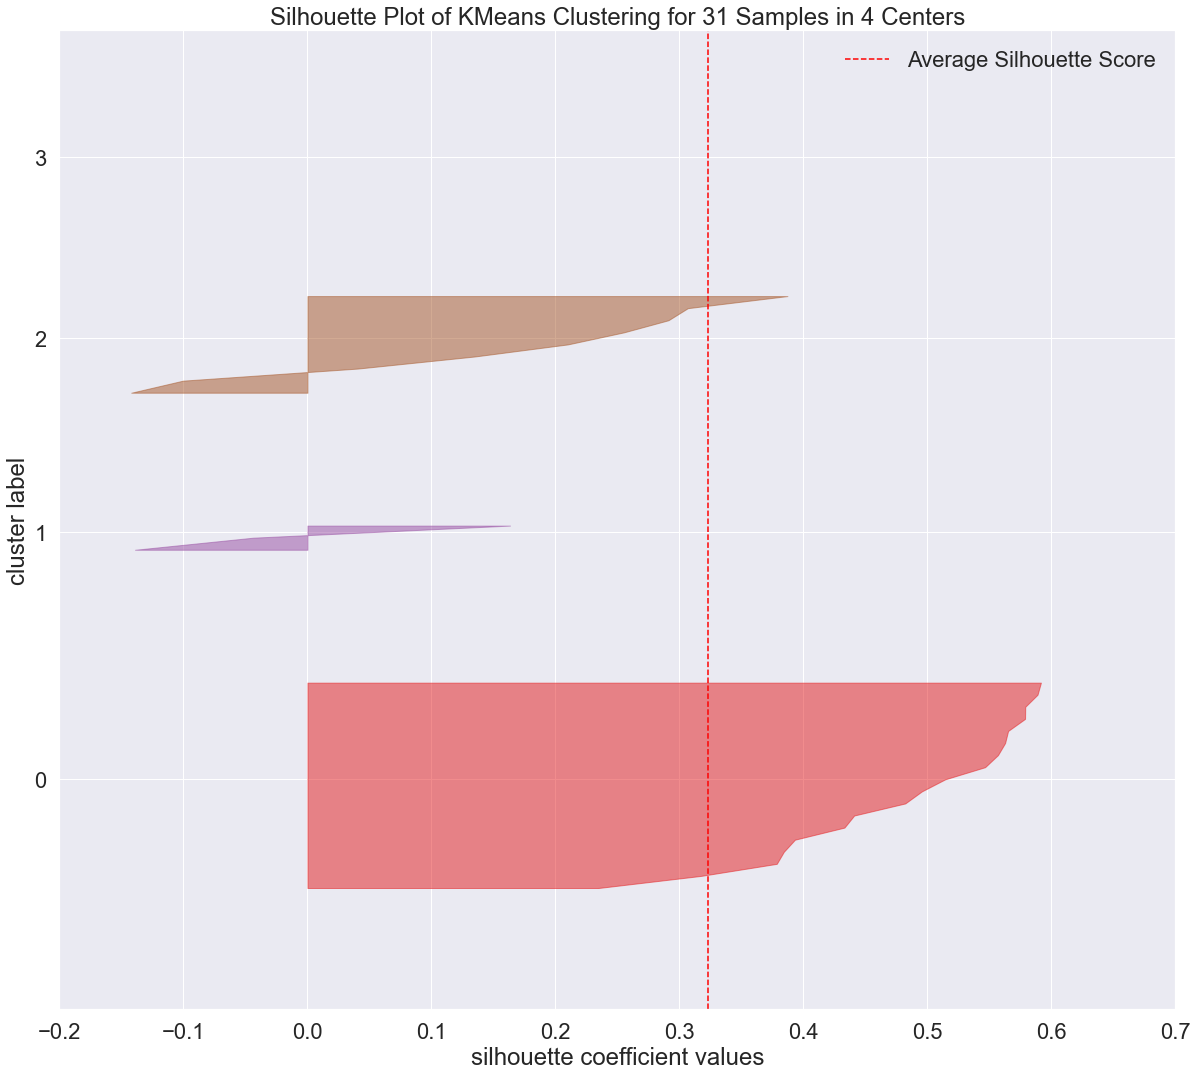

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 31 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [199]:
# Using the yellowbrick library as it has a better visualization and more information, this take our kmeans model direct with or without number of clusters.
visualizer = yellowbrick.SilhouetteVisualizer(kmeans)

# Fit data to visualizer
visualizer.fit(X_scaled)        
visualizer.show()

**At this metric Silhouette, the visualization takes into consideration If there are wider fluctuations on each cluster and if they all stand in the given criteria, the silhouette coefficient values**

Four centers or cluster doesn't pass all criteria for an optimal number of the cluster even if relatively closer, but can the Silhouette find a better number than the elbow metric?

In [200]:

def generate_metric_visualizer(n_cluster = [2], metrics = 'silhouette', figsize=(40,120)):
   fig, ax = plt.subplots(np.int(len(n_cluster) / 2), 2, figsize=(40,120))
   for i in n_cluster:
        '''
        Create KMeans instance for different number of clusters
        '''
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
        q, mod = divmod(i, 2)
        '''
        Create SilhouetteVisualizer instance with KMeans instance
        Fit the visualizer
        '''
        
        visualizer = yellowbrick.SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(X_scaled)


**Run 14 different numbers of kmean clusters at once**

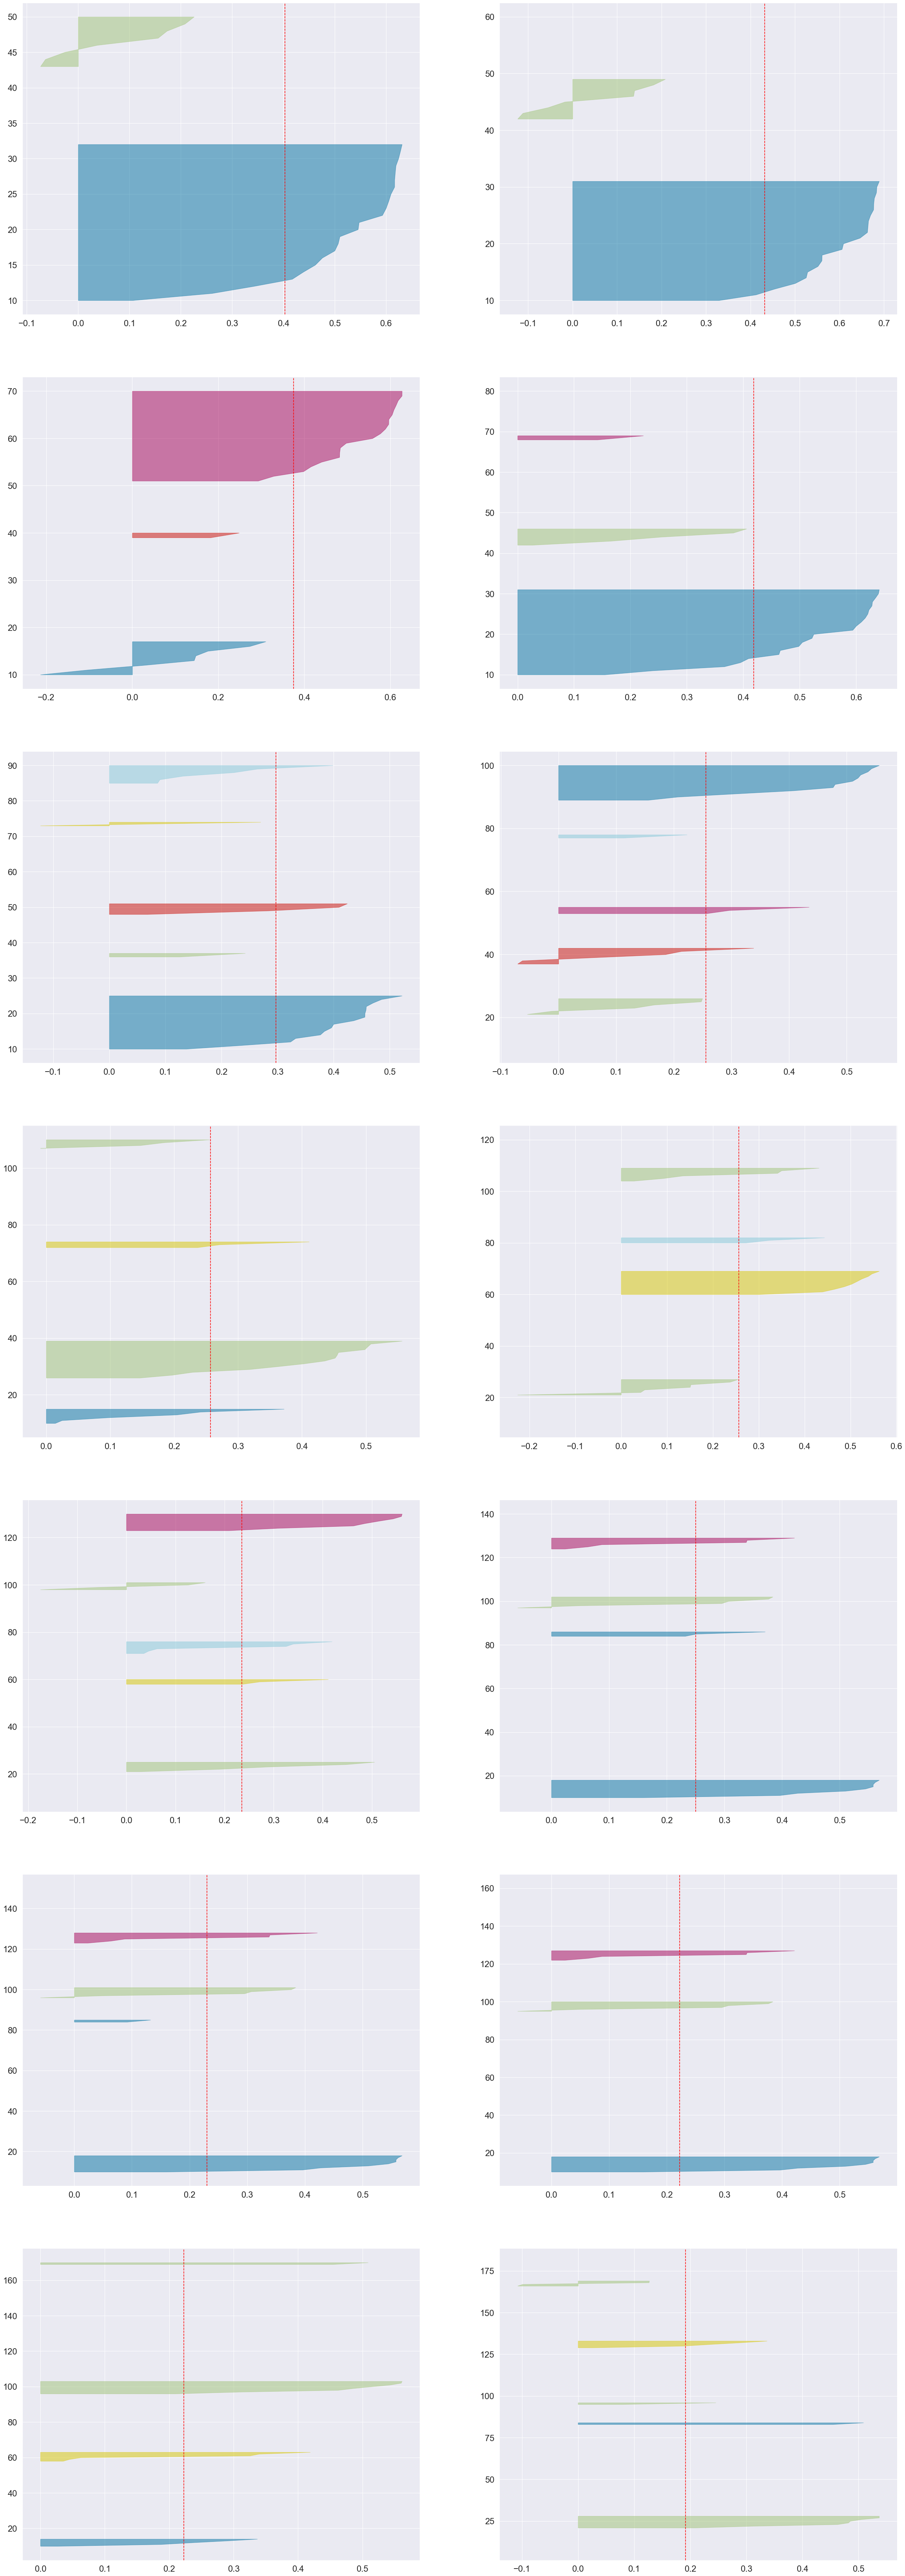

In [201]:
generate_metric_visualizer([2,3, 4,5, 6,7, 8,9, 10,11, 12,13, 14,15])

**After running the Sihuete** 

It is clear that the best but not justified number of the cluster could be 4,6 even if it is clear that Silhouette can't give a definitive answer here, so let's use another metric and see if they contradict or show a better number!

**Using Silhouette metrics**

**Using calinski harabasz metrics**

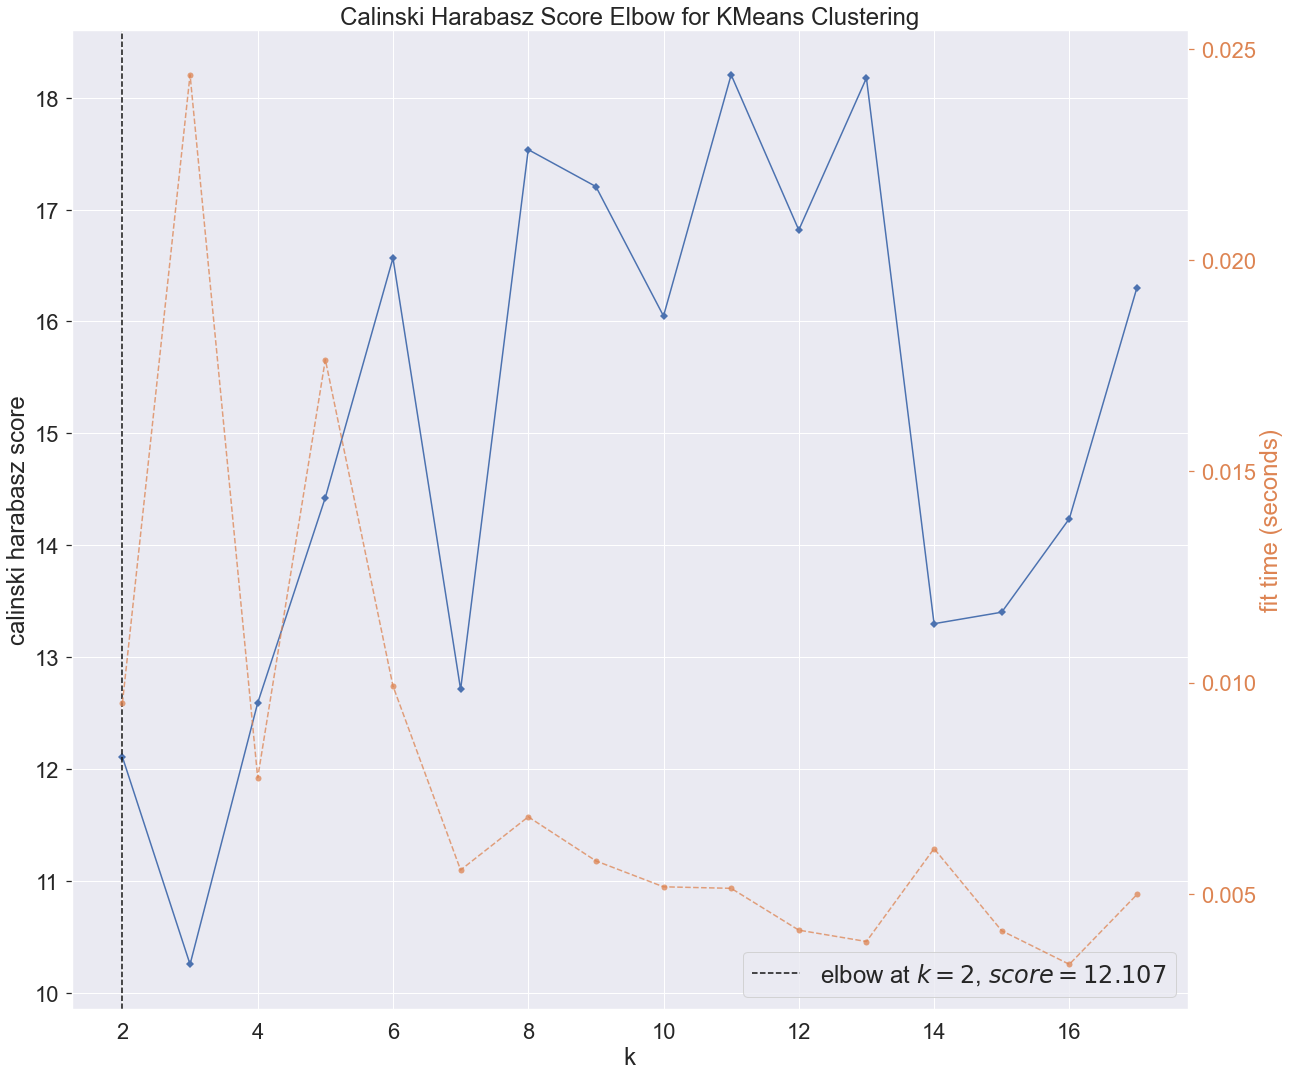

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [202]:
visualizer = yellowbrick.KElbowVisualizer(kmeans, k=(2,18),  metric='calinski_harabasz', timings= True)
visualizer.fit(X_scaled)        # Fit data to visualizer
visualizer.show() 

**The calinski harabasz metric fail**

It doesn't give a better number because it contradicts by far the Sihuete and Elbow metric given the optimal number of 2 or 3, so let's revalidate the elbow this time with a noncustom function using the same yellowbrick library.

**Optimal cluster number evaluation!**


**Using Elbow metrics**

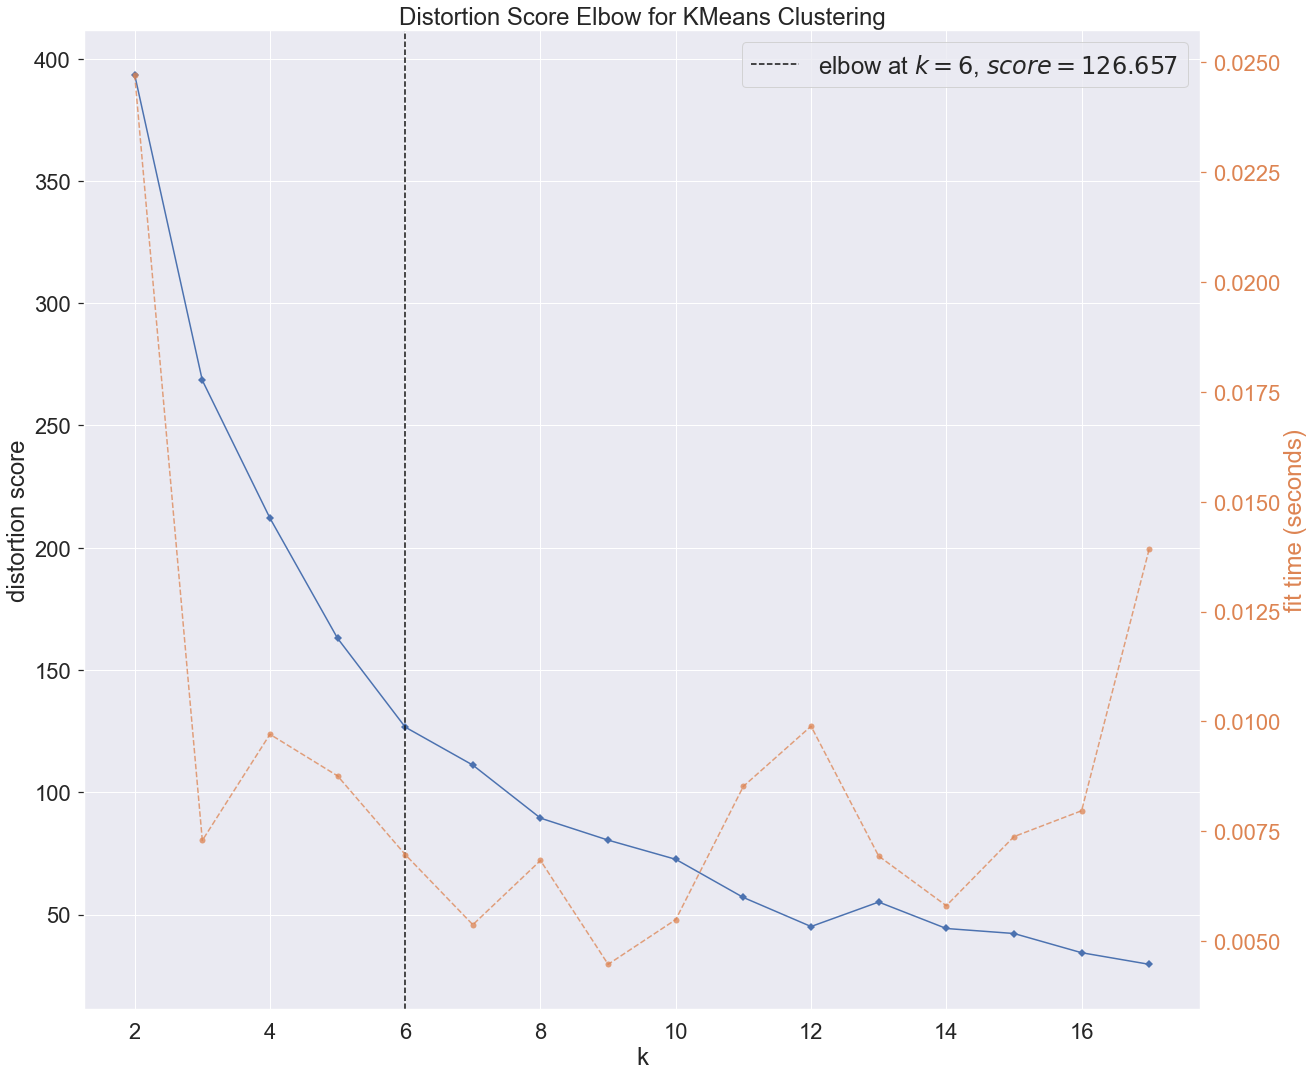

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [203]:
# Using the yellowbrick library as it has a better visualization and more information, this take our kmeans model direct with or without number of clusters.
visualizer = yellowbrick.KElbowVisualizer(kmeans, k=(2,18),  timings= True)
visualizer.fit(X_scaled)        # Fit data to visualizer
visualizer.show()

As seen here, we have a model with 6 to 8 clusters; now, let's confirm that 6 clusters are the optimal number by checking all given cluster number averages.

**From all these metrics from 2 to 8, what would be optimal?**

In [204]:
# the median optimal number of clusters is 4 or 7:

opt_num_clusters = int(np.median(np.array([4,2,7])))
opt_num_clusters

4

***Summary by taking the mean, we have a number closer to 4,6; this is four, so two is definitely excluded!***

**Recreating the kmeans with the new optimal cluster number, wich is 6.**

In [205]:
# Create a k-means clustering model with 4 clusters
kmeans = KMeans(init='random', n_clusters=opt_num_clusters, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

#### Visualizing the PCAs Clusters

In [206]:
# creating the centroids reducer
centres_reduced = pca.transform(kmeans.cluster_centers_)

In [207]:
cluster_name = list(map(lambda c: 'Cluster_N_' + str(c), clusters))


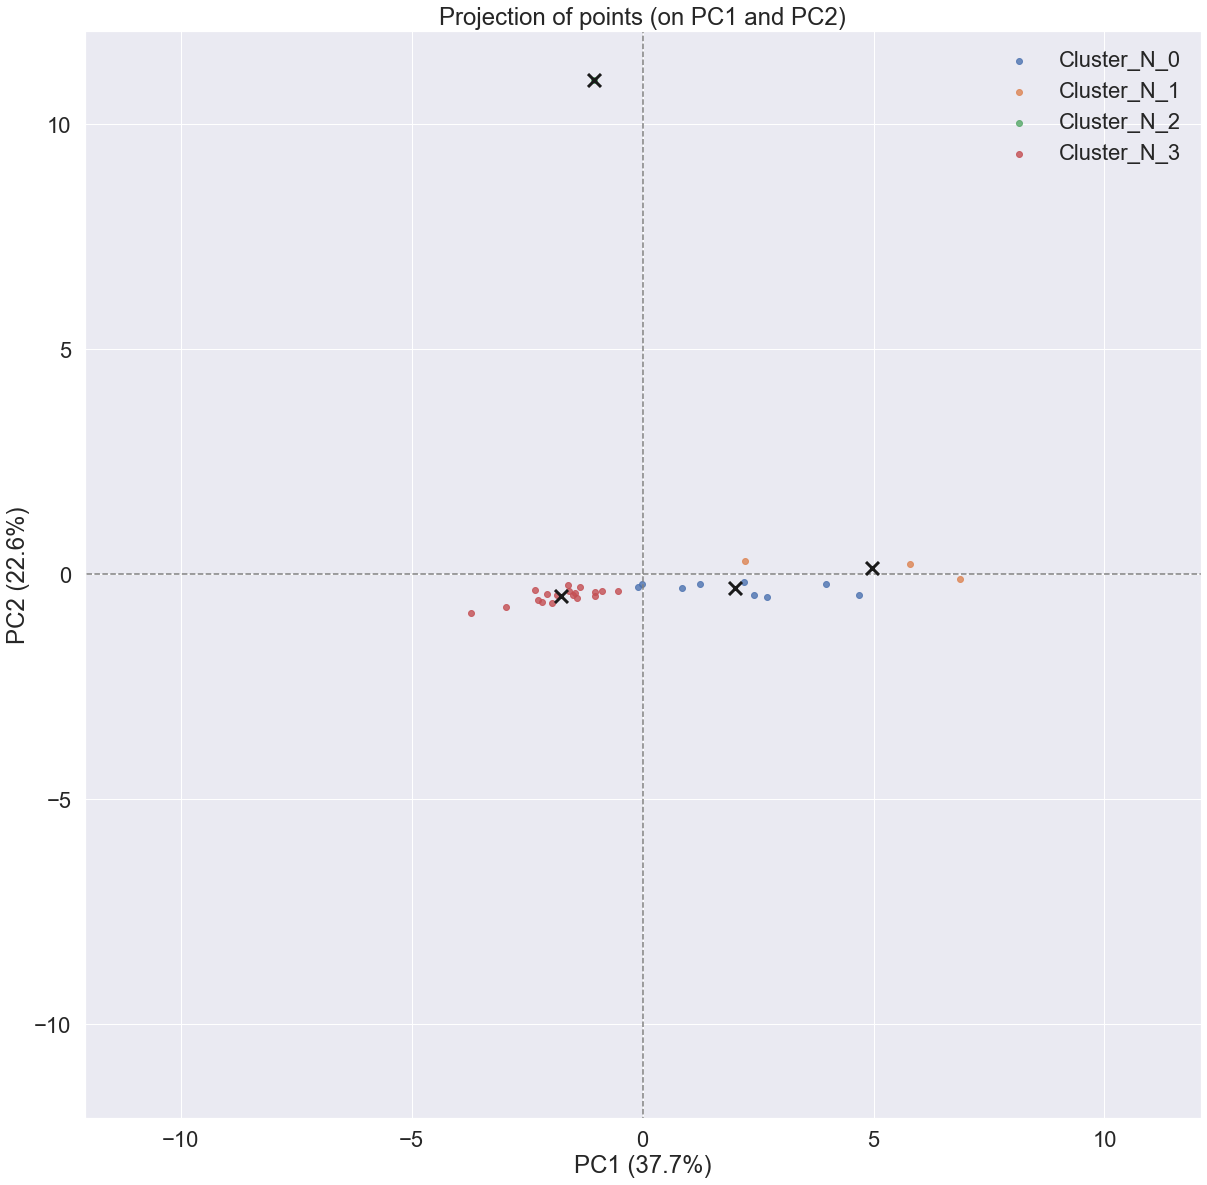

In [208]:
display_factorial_planes(x_reducer, pca.n_components, pca, [(0,1)], illustrative_var = cluster_name, alpha = 0.8, figsize=(20,20))
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

In [209]:
kmeans.cluster_centers_

array([[-0.19708937, -1.09252401,  0.42271841, -0.07233244,  1.06149312,
        -0.37497593,  0.58894979,  0.01010762,  0.00701551,  1.00406665,
         0.8642234 ,  0.69609123,  0.13106606,  0.97182155, -0.19272013,
        -0.19272013, -0.19272013, -0.19272013],
       [ 2.62810891, -0.73833982,  1.66367564,  2.84575675,  0.43858539,
        -0.54592083,  0.59315658,  2.45267086,  2.46279369,  0.63132315,
         1.24041476,  0.13120044,  1.31336163,  1.07626966, -0.16550585,
        -0.16550585, -0.16550585, -0.16550585],
       [ 0.33910136, -0.44352376, -0.32475471, -0.01843824, -0.45543296,
        -0.54592083,  0.41647164, -0.17924096, -0.17085189, -0.27821728,
        -0.82355406, -0.37720127, -0.2695448 ,  0.1021775 ,  5.47540747,
         5.47540747,  5.47540747,  5.47540747],
       [-0.35831243,  0.69395885, -0.47059655, -0.43710223, -0.57854229,
         0.3088037 , -0.41647164, -0.40387445, -0.4044816 , -0.59179733,
        -0.59309449, -0.34895673, -0.26945193, -0.670

**What are the countries on each cluster?**

In [210]:
df_perstl['cluster'] = kmeans.labels_

In [211]:
df_labels_clusters = pd.DataFrame(data={'country': df_perstl.country, 'cluster': kmeans.labels_})

***The countries cluster***

The first and smallest cluster comprises of only India.

The largest cluster, number 2, the second has an interesting country like Angola, Brazil, Indonesia, Mexico, Nigeria, Pakistan, and many others.

The Third cluster has only China and the United States of America.

China Hong Kong SAR, France, Germany, Japan, Russian Federation are in the last cluster, number 4.

The mentioned countries could be our recommended countries as many of them have a significant score on the pestle analysis. We can find this out by continuing with hierarchical clustering using a Dendrogram for visualization!

In [212]:
group_centroids = list(map(lambda n: df_perstl[df_perstl.cluster == n] , range(0, kmeans.n_clusters)))


In [213]:
pd.DataFrame(kmeans.cluster_centers_).to_csv('./P6_Kabuqueci/P6_04_group_centroids.csv')

FileNotFoundError: [Errno 2] No such file or directory: './P6_Kabuqueci/P6_04_group_centroids.csv'

## Dendrogram

### Creating a hierarch of 4-6 clusters using the ward algorithm as a full tree.

In [214]:
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True, n_clusters=opt_num_clusters)

**Creating prediction cluster using the trained scaler**

The number of clusters had been determined by the Kmeans viz, which is the length of centers reduced variable.

In [215]:
hiercluster.set_params(n_clusters= len(centres_reduced))
clusters = hiercluster.fit_predict(X_scaled)
np.bincount(clusters)

array([13, 15,  1,  2])

**Creating a data frame of the scaled with four components to visualize better which features are part of the clusters.**

I am visualizing all the variables and influencing the four most important ones.

**Visualizing the clusters feature distributions.**

*Plotting the data distribution of every cluster on each feature using a box plot so that outliers and min-max values can be visible on each feature*

This will also help to see how they influence the clusters.

array([[<AxesSubplot:title={'center':'pop_total'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'pop_trend_%'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_automative_railway'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_domestic_supply_quantity'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'value_eggs_hen_in_shell'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_eggs_other_bird_in_shell'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_eggs_primary'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_energy_adeguacy'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'value_environmental'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_gross_domestic_product'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_gross_national_income'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'value_import_quantity'}, xl

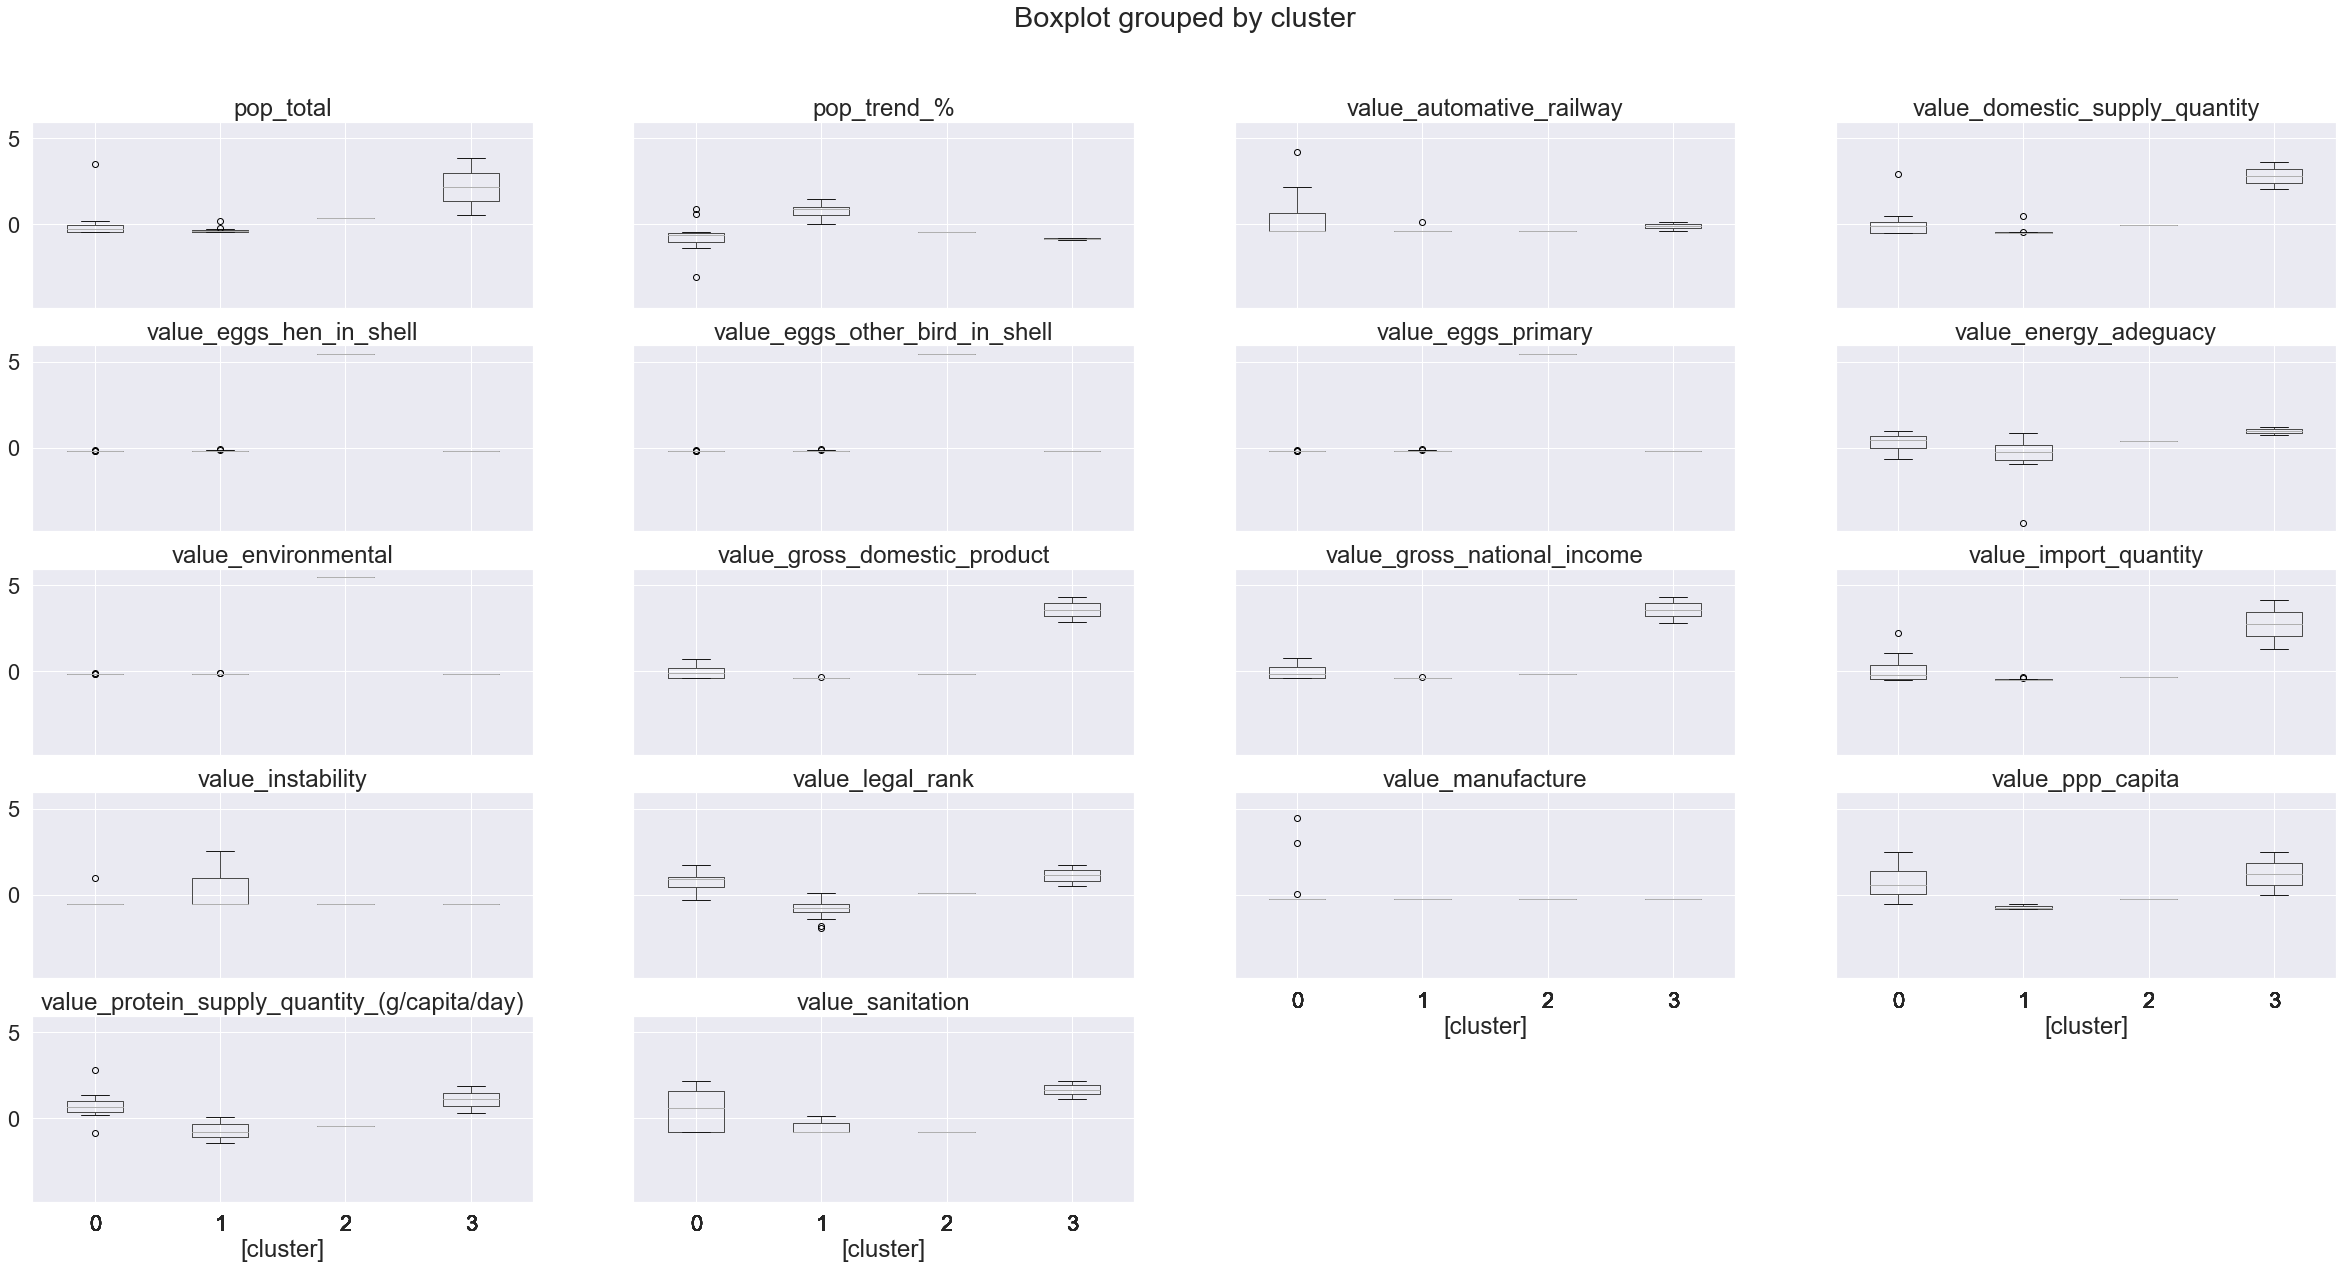

In [216]:
x_clustered['cluster'] = clusters

x_clustered.boxplot(by='cluster', figsize=(40,20), layout=(5,4))

Cluster 0 1 and 3 variables like pop trend, value domestic supply, gross domestic product, instability, ppp per capita, protein supply quantity, and value sanitation are higher.

What is interesting here is that egg values are all very skew.

Also worth mentioning is energy adequacy. So these variables will be taken into consideration for our recommendation.

### Visualizing the cluster as a dendrogram.

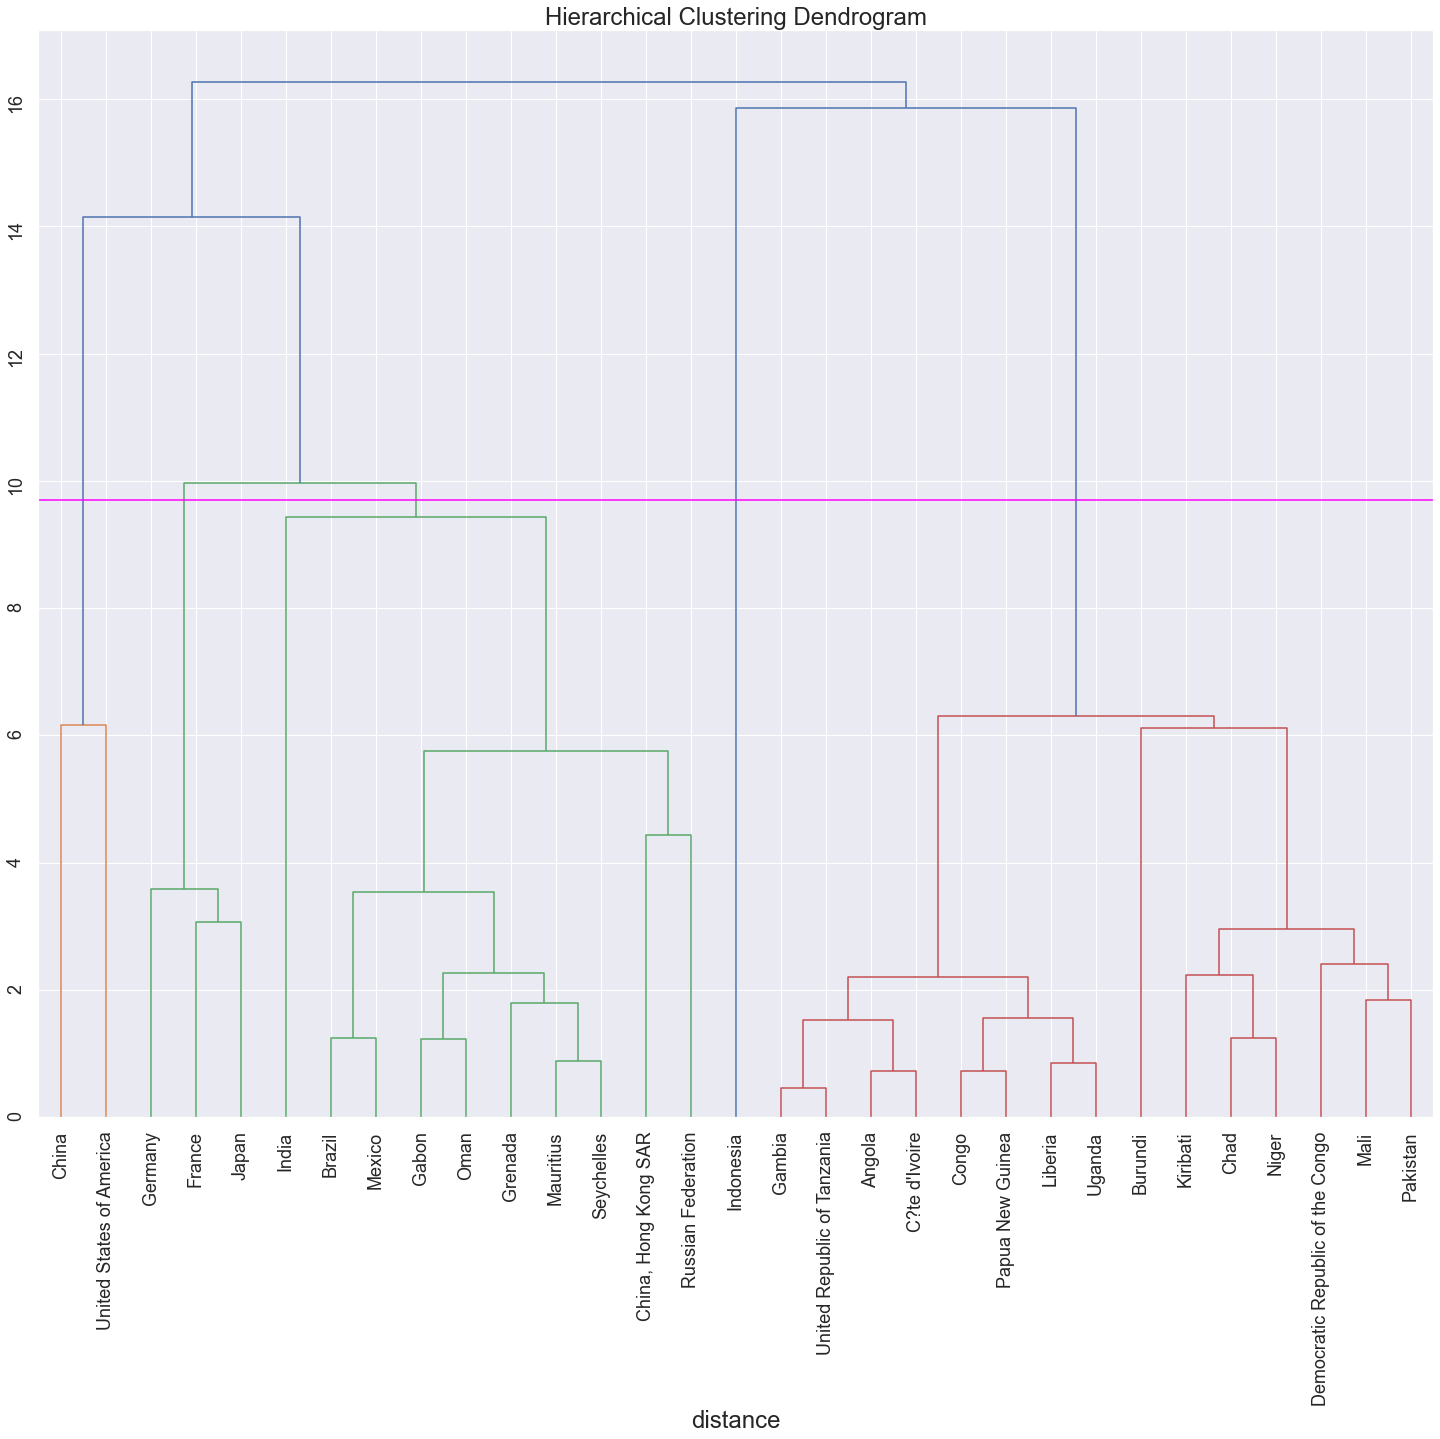

In [217]:
Z = linkage(x_clustered, method='ward', metric='euclidean')
names = df_perstl.iloc[x_clustered.index].country
plot_dendrogram(Z, names.values, figsize=(25, 20), orientation='top')
# adding a cut of 5 cluster.
plt.axhline(y = 9.7, color = 'magenta', linestyle = '-')

plt.tick_params(labelsize='18',labelrotation=90 )


**How much does the dendrogram Explain the kmeans clustering at this point of the Analysis?**

We can see that almost all countries clustered are in the same branches, and it is clearer now what variables have more influence on them from the Box plot, viz.

The dendrogram reflects the influence of the box plot cluster visualization.

On the right, we see less stable and legal countries like Indonesia, Gambia, Liberia, etc.

There is a clear distinction between countries with higher GDP and PPP per capita here on the right, the top 5 USA, China, Germany, France, and Japan.

Apart from Indonesia, all the most populated countries an on the right red and green branches.

## 3) A short list (5-10) of potential countries

In Summary, from the cluster analysis, these are the recommended countries that have been more influenced by the above variable on the cluster and grouped by the dendrogram visualization.


The clusters that most influence the PESTLE analysis variables, including import, export, and protein supply quantity, are the countries that can be selected from it.

### The final five countries from clusters 1-2 and 4.

In [229]:
#the selected countries are in cluster 1-3.
selected_data = df_perstl[df_perstl.cluster.isin([0])]
selected_data

country    pop_total  pop_trend_%  value_import_quantity  \
1                 Brazil  209680050.0     0.754766                3060.12   
5   China, Hong Kong SAR    7379436.0     0.868150                6910.30   
9                 France   66996130.0    -2.690831               14975.04   
12               Germany   83207517.0     0.472788               28773.42   
16                 Japan  127328860.0    -0.268864               16828.46   
20             Mauritius    1268270.0     0.236780                 507.42   
21                Mexico  126318576.0     1.097543                9051.96   
26    Russian Federation  145879872.0     0.094693                8411.06   
27            Seychelles      97098.0     1.030928                 177.42   

    value_domestic_supply_quantity  \
1                        127573.72   
5                          5118.44   
9                         66415.44   
12                        82743.00   
16                        51205.40   
20                          342.68   
21                        56441.36   
26                       103346.26   
27                           48.36   

    value_protein_supply_quantity_(g/capita/day)  value_instability  \
1                                         220.73                0.0   
5                                         380.55                0.0   
9                                         257.29                0.0   
12                                        254.14                0.0   
16                                        195.69                1.0   
20                                        164.42                0.0   
21                                        178.97                0.0   
26                                        222.09                0.0   
27                                        203.39                0.0   

    value_energy_adeguacy  value_gross_national_income  \
1                   134.0                 3.630951e+06   
5                   134.0                 7.635157e+05   
9                   141.0                 5.621343e+06   
12                  140.0                 8.037330e+06   
16                  112.0                 1.040179e+07   
20                  125.0                 2.881325e+04   
21                  133.0                 2.415295e+06   
26                  137.0                 3.272431e+06   
27                  128.0                 3.130126e+03   

    value_gross_domestic_product  value_ppp_capita  value_sanitation  \
1                   3.733265e+06           14668.0              46.0   
5                   7.274076e+05           61062.0              85.0   
9                   5.503382e+06           45251.0              78.0   
12                  7.824891e+06           53463.0              97.0   
16                  1.003727e+07           41182.0              80.0   
20                  2.836222e+04           22208.0               0.0   
21                  2.477138e+06           19928.0              52.0   
26                  3.361386e+06           26656.0              60.0   
27                  3.284918e+03           27342.0               0.0   

    value_automative_railway  value_manufacture  value_legal_rank  \
1                        0.0       3.851567e+05              72.0   
5                        0.0       0.000000e+00              68.5   
9                        5.0       0.000000e+00              89.0   
12                       9.0       0.000000e+00              90.5   
16                       5.0       0.000000e+00              56.0   
20                       0.0       4.421305e+04              70.0   
21                       0.0       0.000000e+00              58.5   
26                       0.0       4.001874e+06              82.0   
27                       0.0       0.000000e+00              59.5   

    value_environmental  value_eggs_hen_in_shell  value_eggs_primary  \
1          1.535041e+06             1.535041e+06        1.535041e+06   
5          7.3700

In [219]:
# export cluster county names:
pd.DataFrame(selected_data.country).to_csv('./P6_Kabuqueci/P6_03_country_list.csv')

FileNotFoundError: [Errno 2] No such file or directory: './P6_Kabuqueci/P6_03_country_list.csv'

### Do they come from the same population?

In [230]:
# Do they come from the same population?
stats.anderson_ksamp([df_perstl[df_perstl.cluster.isin([0])].value_legal_rank, df_perstl[df_perstl.cluster.isin([1])].value_legal_rank])

<ipython-input-230-cc11ed98656c>:2: UserWarning: p-value capped: true value larger than 0.25
  stats.anderson_ksamp([df_perstl[df_perstl.cluster.isin([0])].value_legal_rank, df_perstl[df_perstl.cluster.isin([1])].value_legal_rank])


Anderson_ksampResult(statistic=-0.9558516192424525, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)